<a href="https://colab.research.google.com/github/abdullatif14/Time-Series-Forecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA LOADING

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
IMR = pd.read_csv('/content/IMR.csv', parse_dates=['Year'])
cpi = pd.read_csv('/content/cpi2.csv')
crops = pd.read_csv('/content/Annual Maize production 1961-2019.csv', parse_dates=['Year'])
labor = pd.read_csv('/content/labor.csv', parse_dates=['Year'])
#pop_growth = pd.read_csv('/content/pop_growth.csv')
population = pd.read_csv('/content/population.csv', parse_dates=['Year'])

In [ ]:

pop_growth = pd.read_csv('/content/pop_growth.csv', encoding='Windows-1251', parse_dates=['Year'])


In [ ]:
pop_growth.head()

Year  Total_Fertility_Rate  ...  GrowthRate  Rate_of_natural_increase
0 1953-01-01                 7.481  ...       2.793                    27.889
1 1958-01-01                 7.785  ...       3.004                    29.983
2 1963-01-01                 8.065  ...       3.202                    32.410
3 1968-01-01                 8.110  ...       3.409                    34.386
4 1973-01-01                 7.990  ...       3.667                    36.859

[5 rows x 17 columns]

In [ ]:
IMR.head()

Indicator  ...       Year
0  MRY0: Infant mortality rate  ... 1952-01-01
1  MRY0: Infant mortality rate  ... 1952-01-01
2  MRY0: Infant mortality rate  ... 1953-01-01
3  MRY0: Infant mortality rate  ... 1953-01-01
4  MRY0: Infant mortality rate  ... 1954-01-01

[5 rows x 5 columns]

In [ ]:
population.head()

Variant       Year  ...  population_total  population_growth_rate
0  Medium 1951-01-01  ...           6242107                0.027210
1  Medium 1952-01-01  ...           6415955                0.027851
2  Medium 1953-01-01  ...           6598172                0.028401
3  Medium 1954-01-01  ...           6788705                0.028877
4  Medium 1955-01-01  ...           6987658                0.029306

[5 rows x 8 columns]

In [ ]:
population.tail()

Variant       Year  ...  population_total  population_growth_rate
64  Medium 2015-01-01  ...          47878339                0.025231
65  Medium 2016-01-01  ...          49051531                0.024504
66  Medium 2017-01-01  ...          50221146                0.023845
67  Medium 2018-01-01  ...          51392570                0.023325
68  Medium 2019-01-01  ...          52573967                0.022988

[5 rows x 8 columns]

In [ ]:
crops.head()

Year  Area harvested  Yield  Production
0 1961-01-01          750000  12533      940000
1 1962-01-01          900000  12222     1100000
2 1963-01-01         1000000  12500     1250000
3 1964-01-01         1050000  11714     1230000
4 1965-01-01         1214000  10713     1300530

In [ ]:
cpi.tail()

Year  ...  Foodpriceinflation
235     August 2020  ...            5.310391
236  September 2020  ...            5.891924
237    October 2020  ...            6.587472
238   November 2020  ...            7.562035
239   December 2020  ...            8.611575

[5 rows x 4 columns]

In [ ]:
labor.head()

Year  labour_income_share_in_GDP
0 1991-01-01                     2465.88
1 1992-01-01                     2354.25
2 1993-01-01                     2274.52
3 1994-01-01                     2248.34
4 1995-01-01                     2263.08

## EDA

### Labor Share of Income

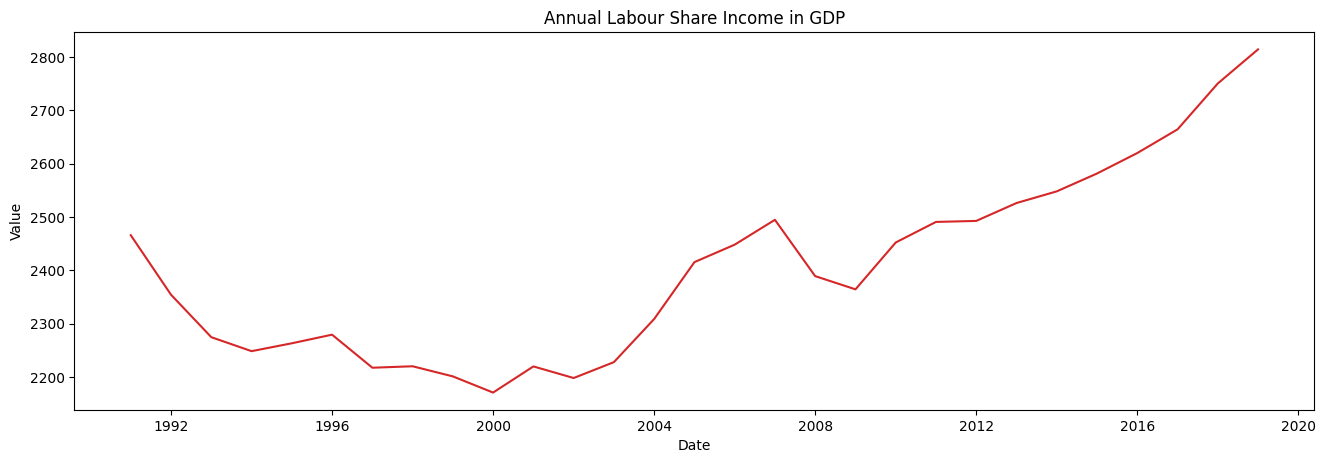

In [ ]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Annual labour share of income.png', bbox_inches = 'tight')
    plt.show()

plot_df(labor, x=labor.Year, y=labor.labour_income_share_in_GDP, title='Annual Labour Share Income in GDP')    

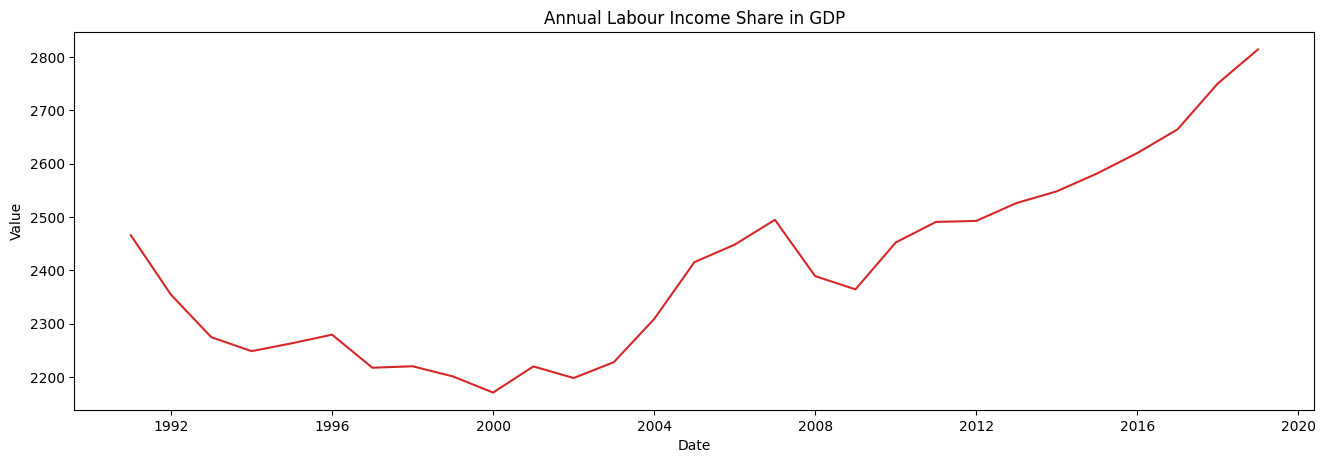

In [ ]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(labor, x=labor.Year, y=labor.labour_income_share_in_GDP, title='Annual Labour Income Share in GDP')  

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(labor.labour_income_share_in_GDP, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: 0.9297468467301228
p-value: 0.9934665066994304
Critial Values:
   1%, -3.6889256286443146
Critial Values:
   5%, -2.9719894897959187
Critial Values:
   10%, -2.6252957653061224


The time series possesses a unit root and is non-stationary.

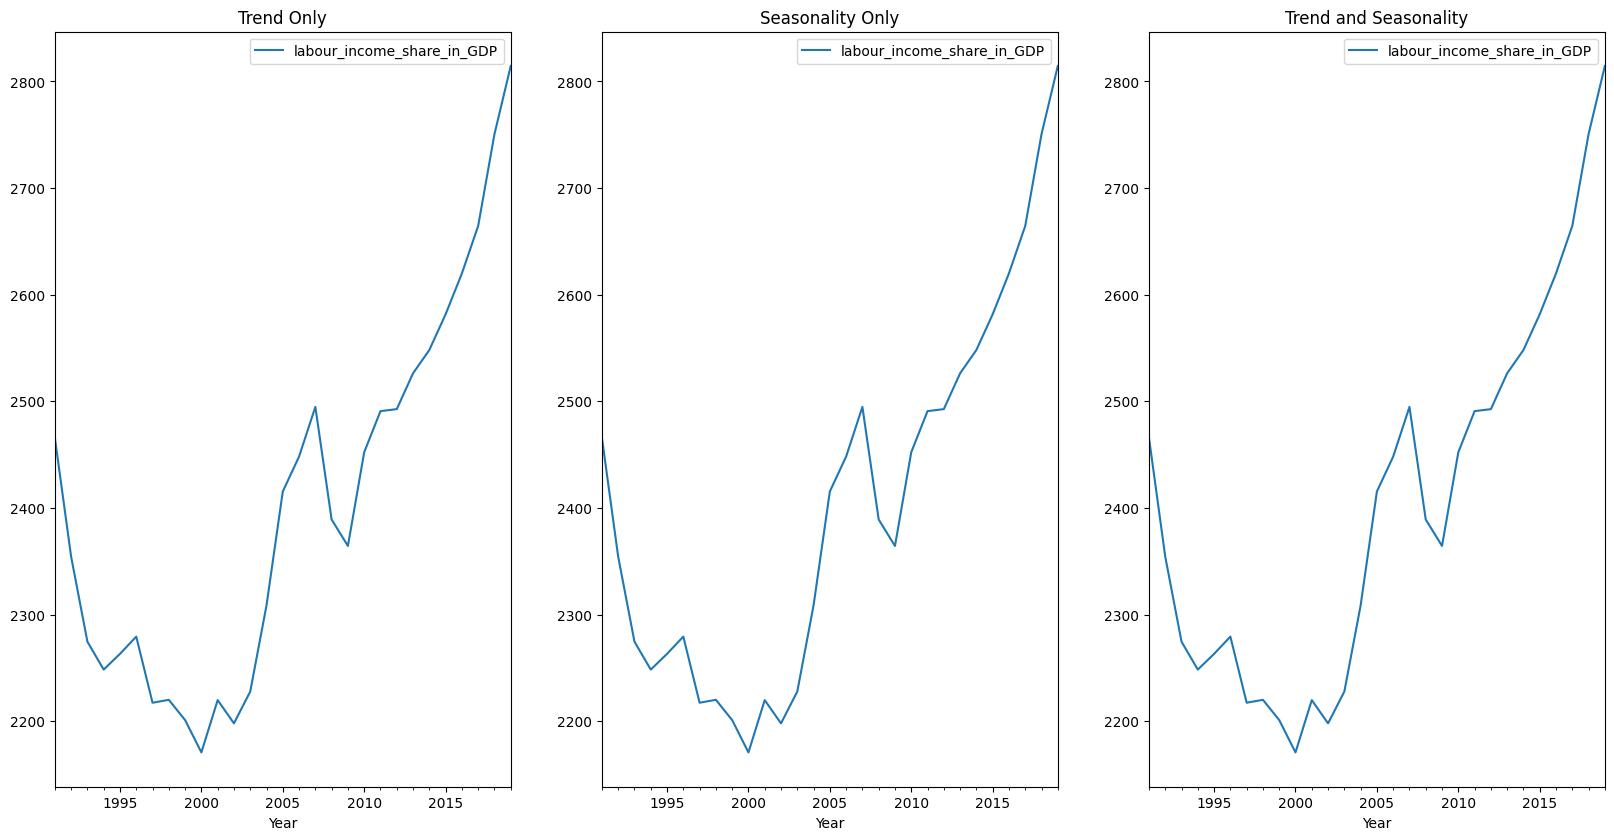

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('labor.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('labor.csv', parse_dates=['Year'], index_col='Year').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('labor.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

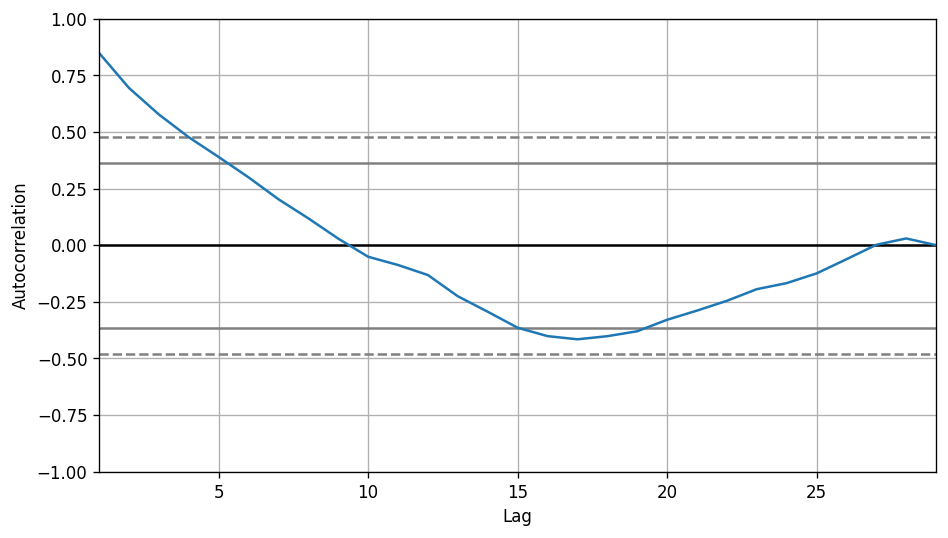

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(labor.labour_income_share_in_GDP.tolist())
plt.savefig('Annual labour share of income autocorre.png', bbox_inches = 'tight')

There is no seasonality detected

In [ ]:
dd = pd.read_csv('labor.csv', parse_dates=['Year'])

rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

# Estimating the forecastability of a time series
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(labor.labour_income_share_in_GDP, m=2, r=0.2*np.std(dd.labour_income_share_in_GDP)))    
   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big))) 

0.303704723615303
0.17345506740639394
0.6972967119482192


It has a low approximate entropy. It is easy to forecast.

### Consumer price index

In [ ]:
# Import Data
df = pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year')
df.reset_index(inplace=True)
df

Year  ...  Foodpriceinflation
0   2001-01-01  ...            3.193185
1   2001-02-01  ...            3.118768
2   2001-03-01  ...            3.044754
3   2001-04-01  ...            2.971138
4   2001-05-01  ...            2.897918
..         ...  ...                 ...
235 2020-08-01  ...            5.310391
236 2020-09-01  ...            5.891924
237 2020-10-01  ...            6.587472
238 2020-11-01  ...            7.562035
239 2020-12-01  ...            8.611575

[240 rows x 4 columns]

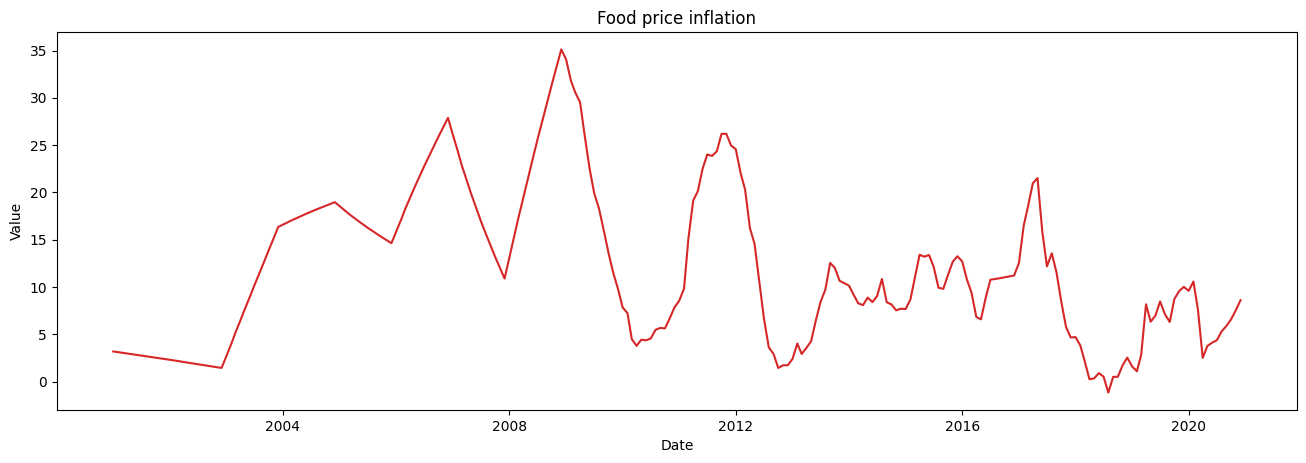

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Food prices inflation plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(df, x=df.Year, y=df.Foodpriceinflation, title='Food price inflation')  

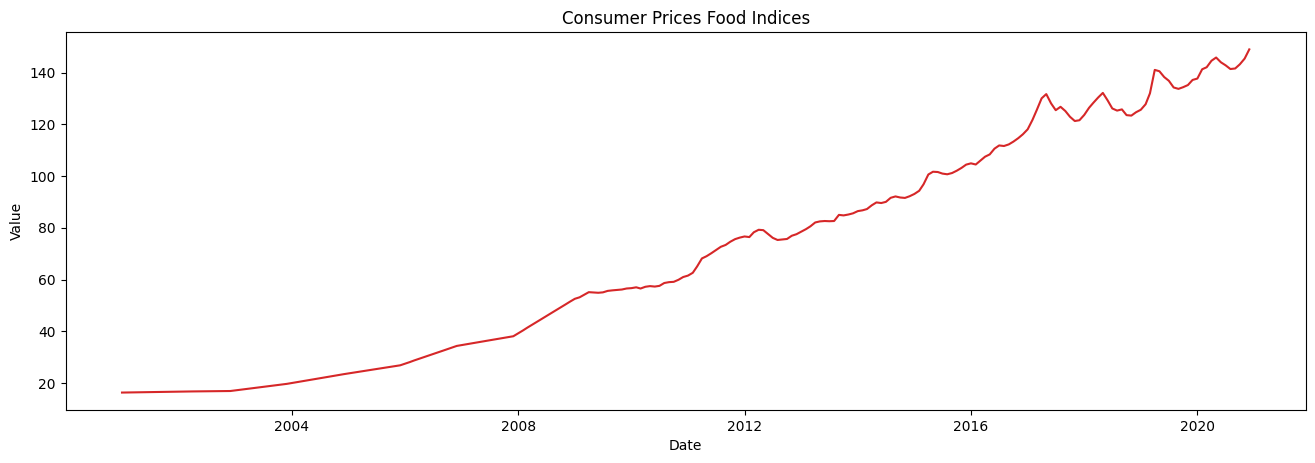

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('CPFI.png', bbox_inches = 'tight')   
    plt.show()

plot_df(df, x=df.Year, y=df.ConsumerPricesFoodIndices2015, title='Consumer Prices Food Indices')

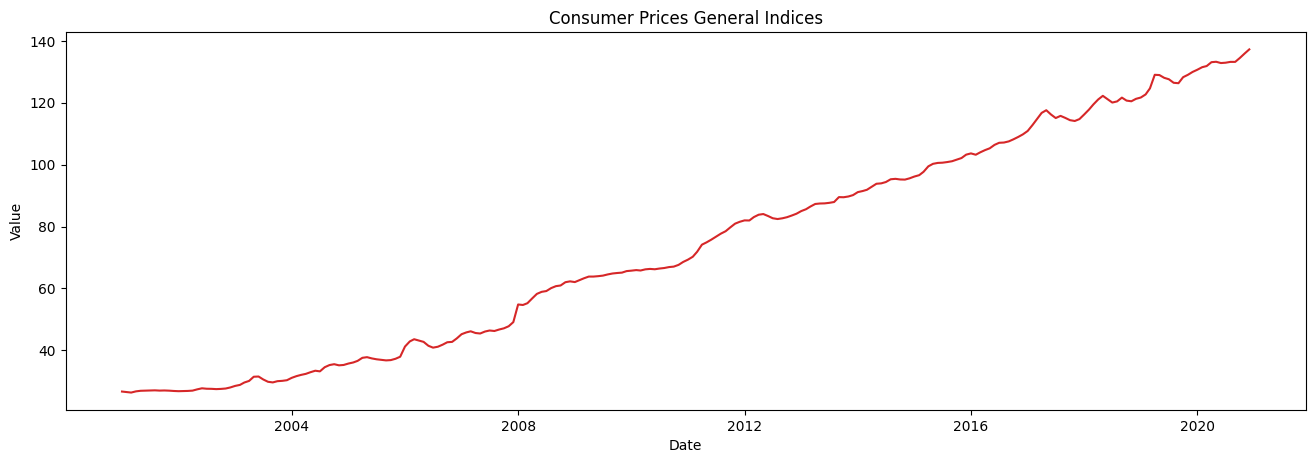

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('CPGI.png', bbox_inches = 'tight') 
    plt.show()

plot_df(df, x=df.Year, y=df.ConsumerPricesGeneralIndices2015, title='Consumer Prices General Indices') 

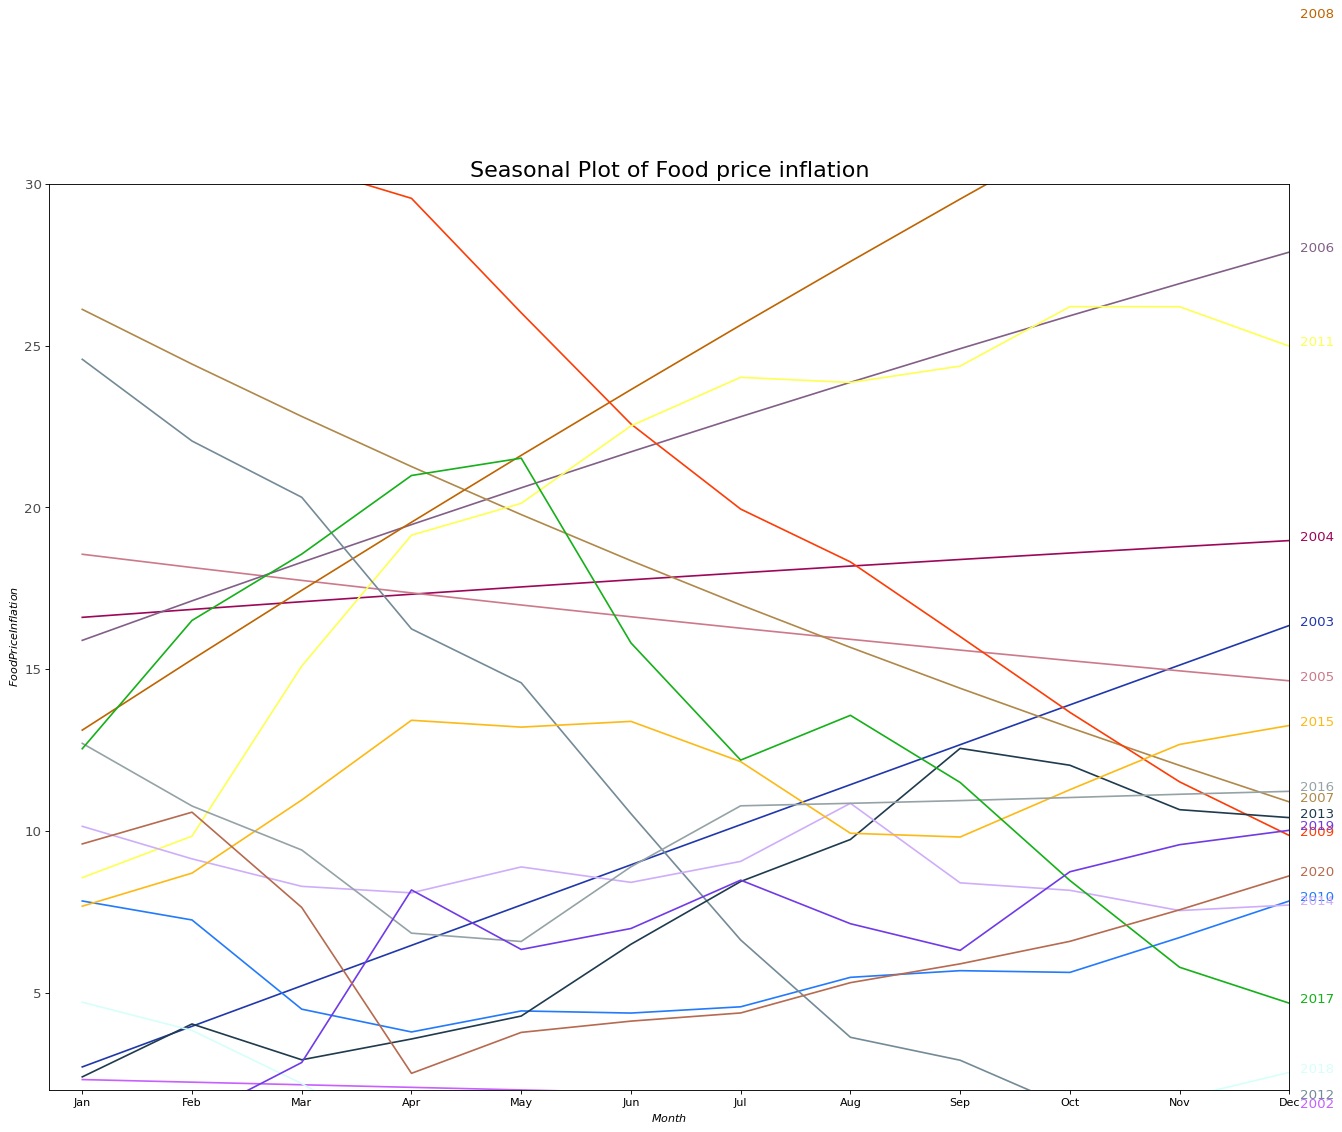

In [ ]:
# Import Data
df = pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Year]
df['month'] = [d.strftime('%b') for d in df.Year]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(20,15), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Foodpriceinflation', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Foodpriceinflation'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Food Price Inflation$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Food price inflation", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Seasonal Plot of Consumer Prices, Food Indices')

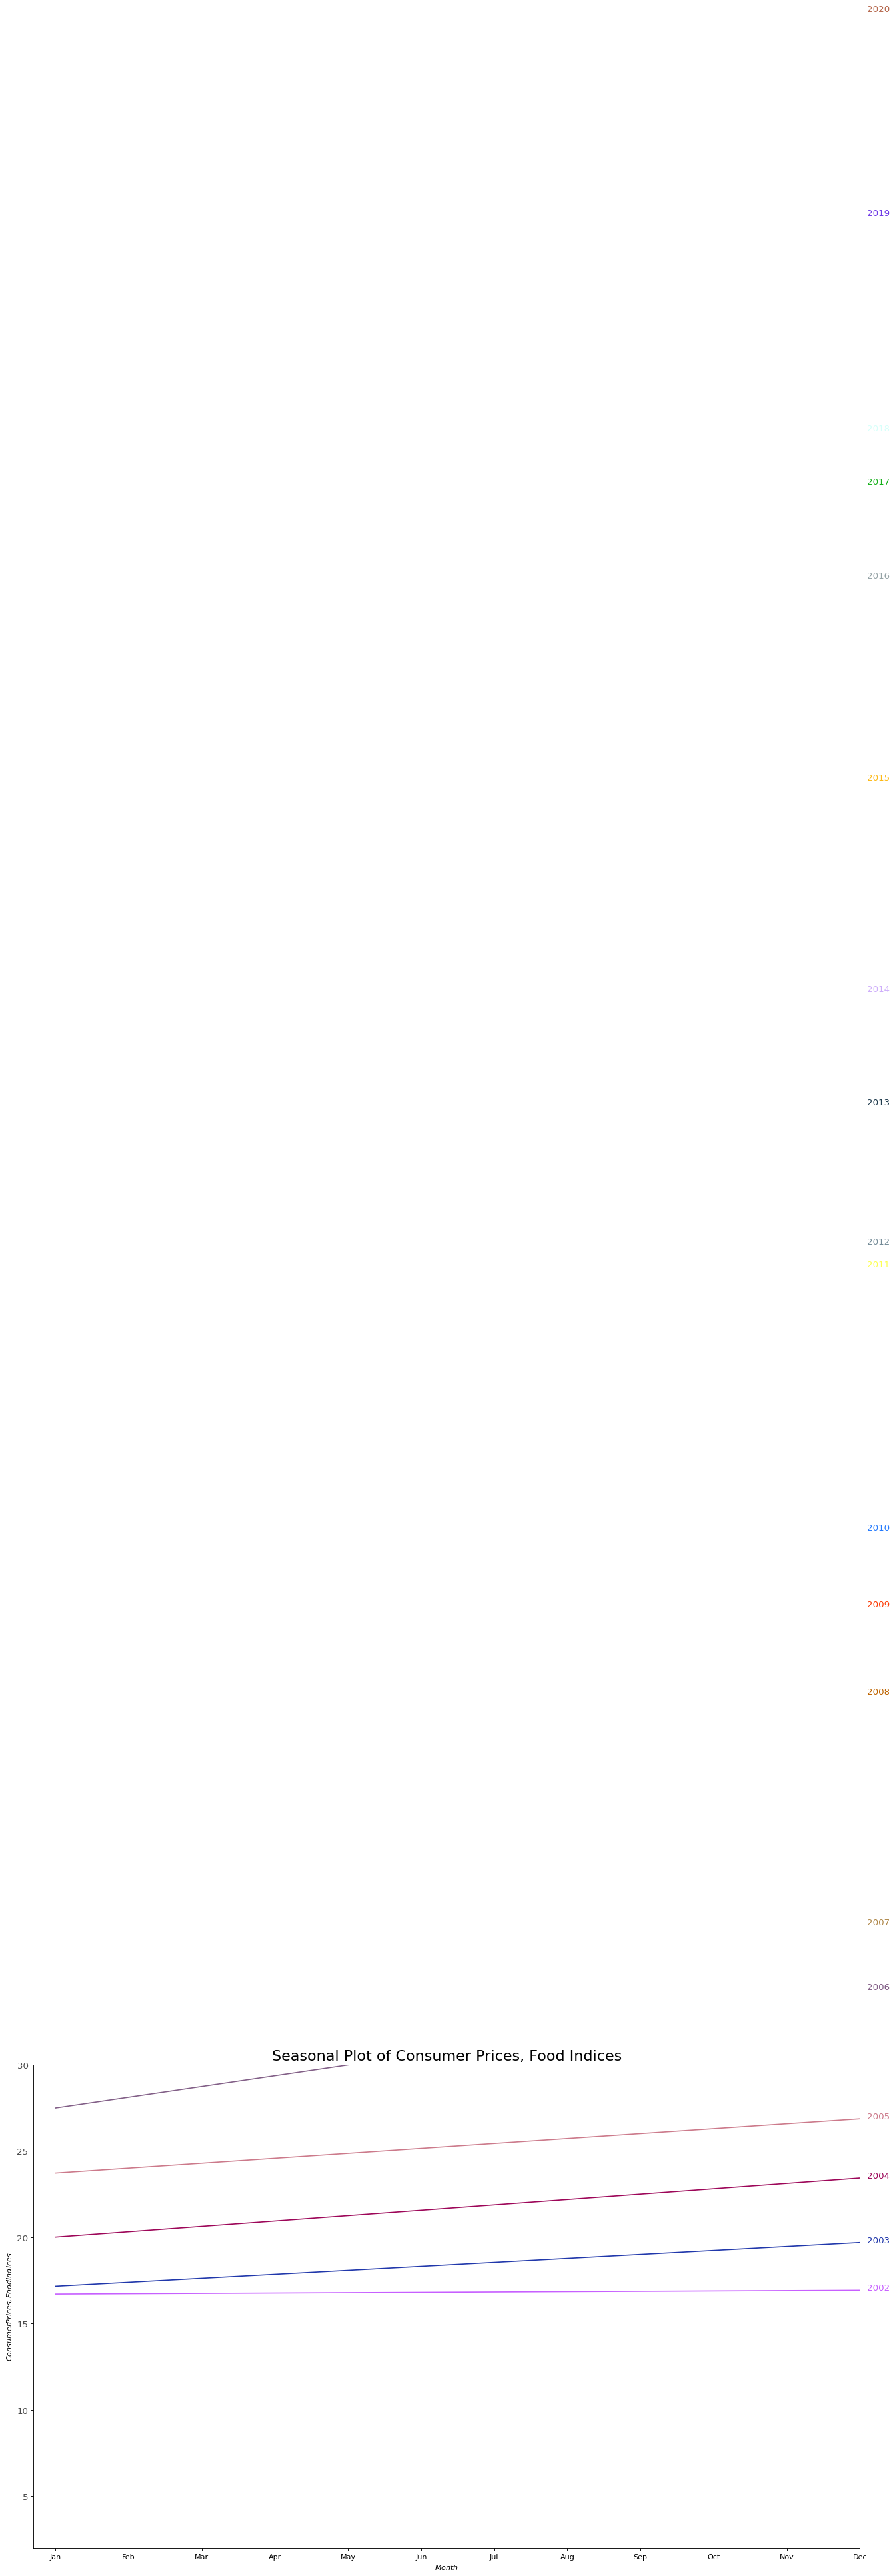

In [ ]:
# Import Data
df = pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Year]
df['month'] = [d.strftime('%b') for d in df.Year]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(20,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'ConsumerPricesFoodIndices2015', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'ConsumerPricesFoodIndices2015'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Consumer Prices, Food Indices$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Consumer Prices, Food Indices", fontsize=20)

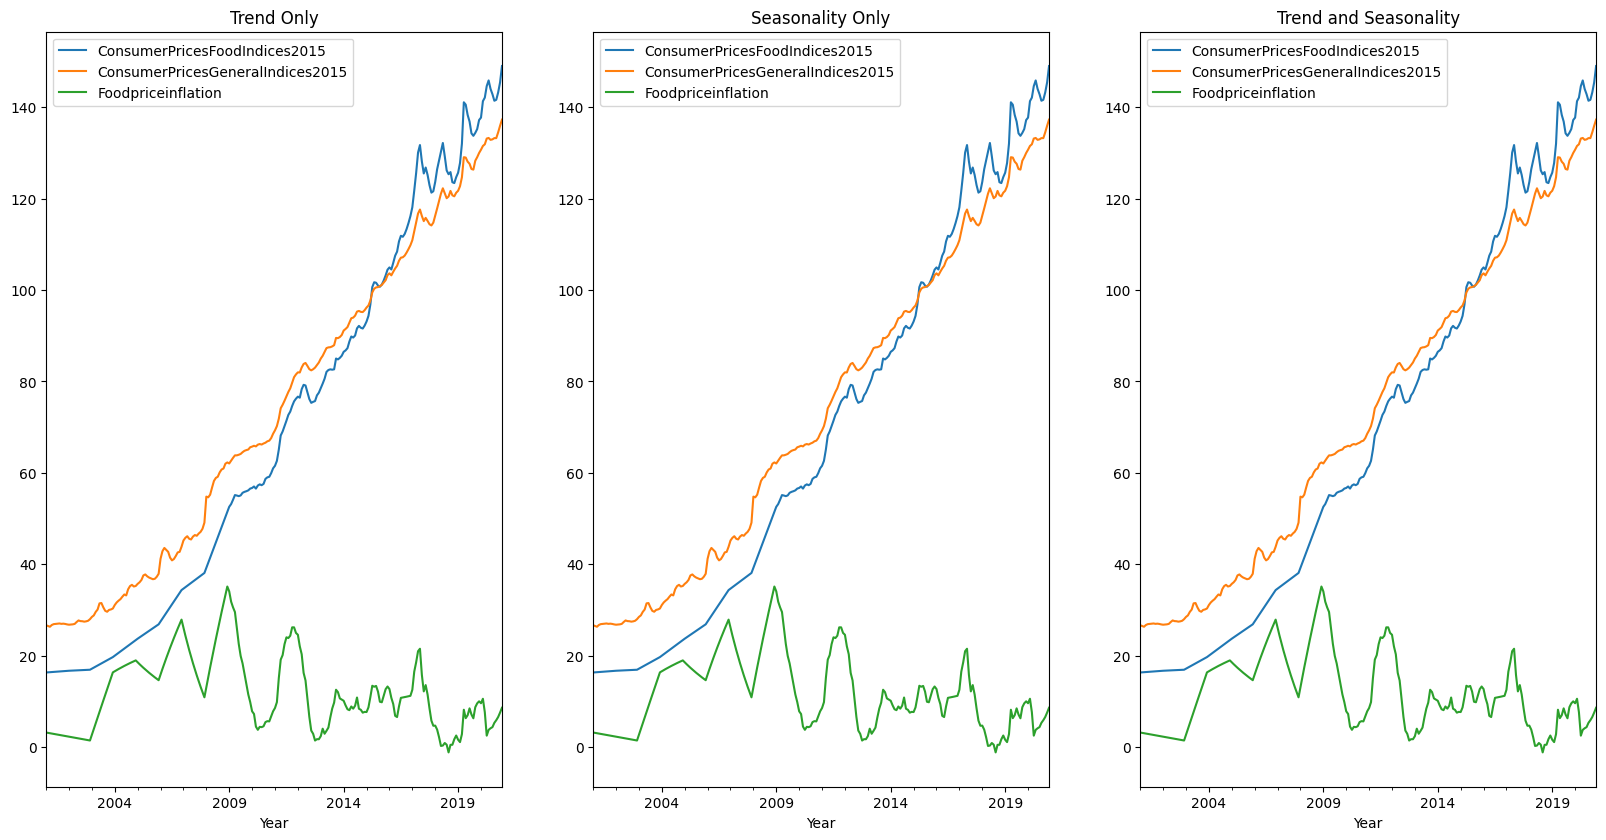

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('cpi2.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df.Foodpriceinflation, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.192761678583752
p-value: 0.2088830313107941
Critial Values:
   1%, -3.4596204846395824
Critial Values:
   5%, -2.8744153028455948
Critial Values:
   10%, -2.5736320761218576


The null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. In this case, we accept the null hypothesis.

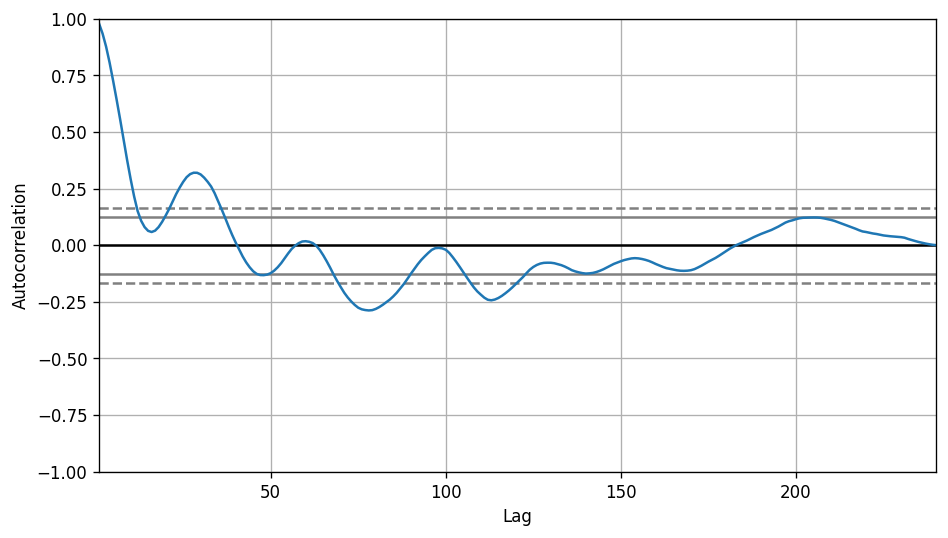

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.Foodpriceinflation.tolist())
plt.savefig('FPI Autocorre.png', bbox_inches = 'tight') 

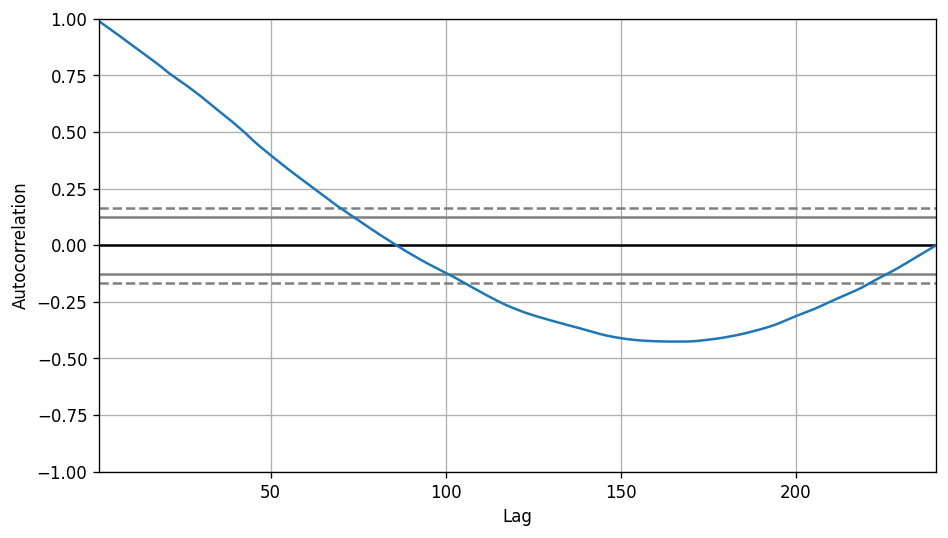

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.ConsumerPricesFoodIndices2015.tolist())
plt.savefig('CPFI Autocorre.png', bbox_inches = 'tight') 

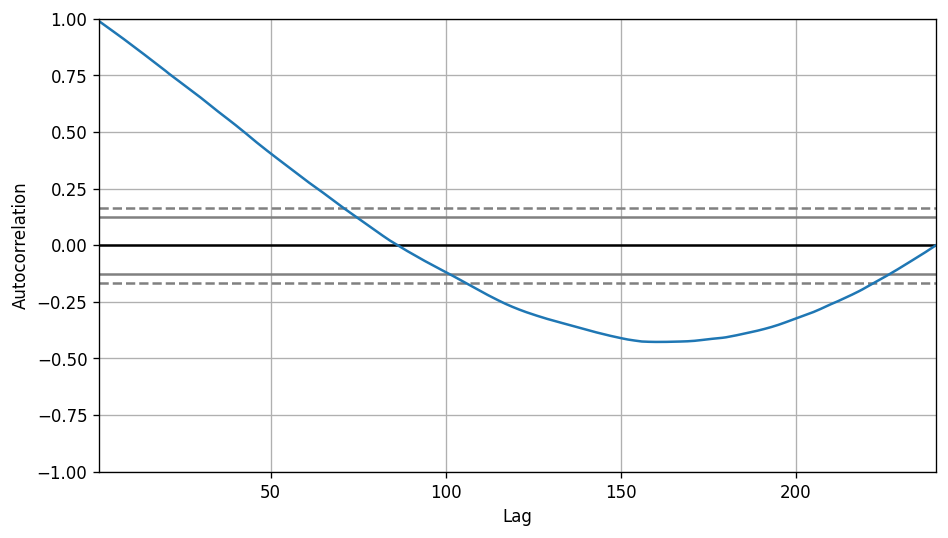

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.ConsumerPricesGeneralIndices2015.tolist())
plt.savefig('CPGI Autocorre.png', bbox_inches = 'tight') 

The autocorrelation plot of Food Price Inflation has spikes which shows seasonality. The rest have no seasonality

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot

In [ ]:
ff = pd.read_csv('cpi2.csv')
b10 = pd.read_csv('cpi2.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ff.ConsumerPricesGeneralIndices2015, m=2, r=0.2*np.std(ff.ConsumerPricesGeneralIndices2015)))    
print(ApEn(b10.Foodpriceinflation, m=2, r=0.2*np.std(b10.Foodpriceinflation)))   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big))) 

0.05276953289112685
0.5510773817400949
0.16083502693096996
0.5972926771842966


It has a low approximate entropy. It is easy to forecast.

### Population

In [ ]:
pop = pd.read_csv('population.csv', parse_dates=['Year'], index_col='Year')
pop.reset_index(inplace=True)
pop

Year Variant  ...  population_total  population_growth_rate
0  1951-01-01  Medium  ...           6242107                0.027210
1  1952-01-01  Medium  ...           6415955                0.027851
2  1953-01-01  Medium  ...           6598172                0.028401
3  1954-01-01  Medium  ...           6788705                0.028877
4  1955-01-01  Medium  ...           6987658                0.029306
..        ...     ...  ...               ...                     ...
64 2015-01-01  Medium  ...          47878339                0.025231
65 2016-01-01  Medium  ...          49051531                0.024504
66 2017-01-01  Medium  ...          50221146                0.023845
67 2018-01-01  Medium  ...          51392570                0.023325
68 2019-01-01  Medium  ...          52573967                0.022988

[69 rows x 8 columns]

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Variant                 69 non-null     object        
 1   Year                    69 non-null     datetime64[ns]
 2   PopMale                 69 non-null     float64       
 3   PopFemale               69 non-null     float64       
 4   PopTotal                69 non-null     float64       
 5   PopDensity              69 non-null     float64       
 6   population_total        69 non-null     int64         
 7   population_growth_rate  69 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 4.4+ KB


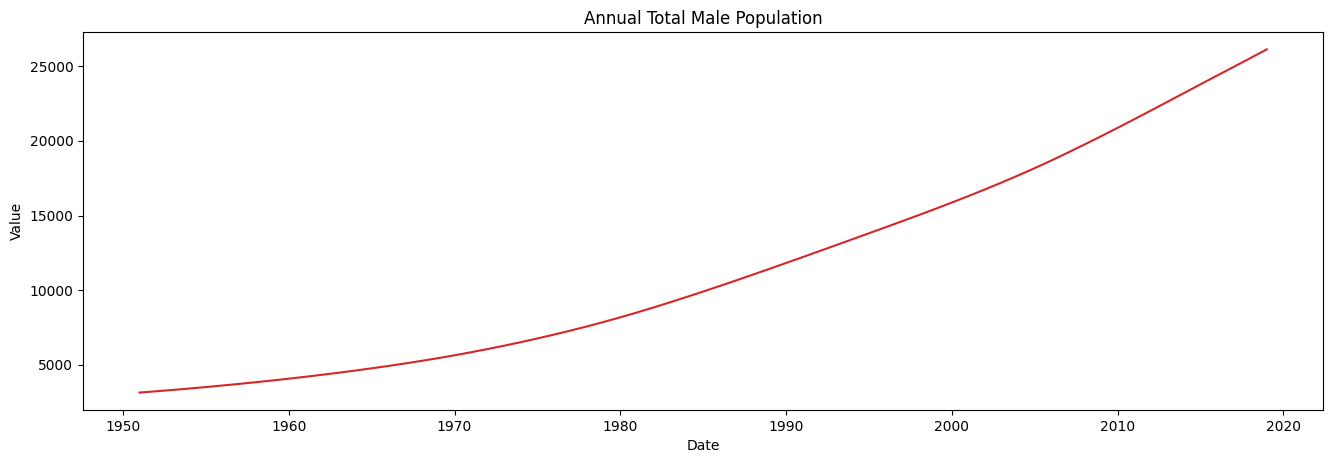

In [ ]:
# Draw Plot
def plot_df(pop, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Total male population plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(pop, x=pop.Year, y=pop.PopMale, title='Annual Total Male Population') 

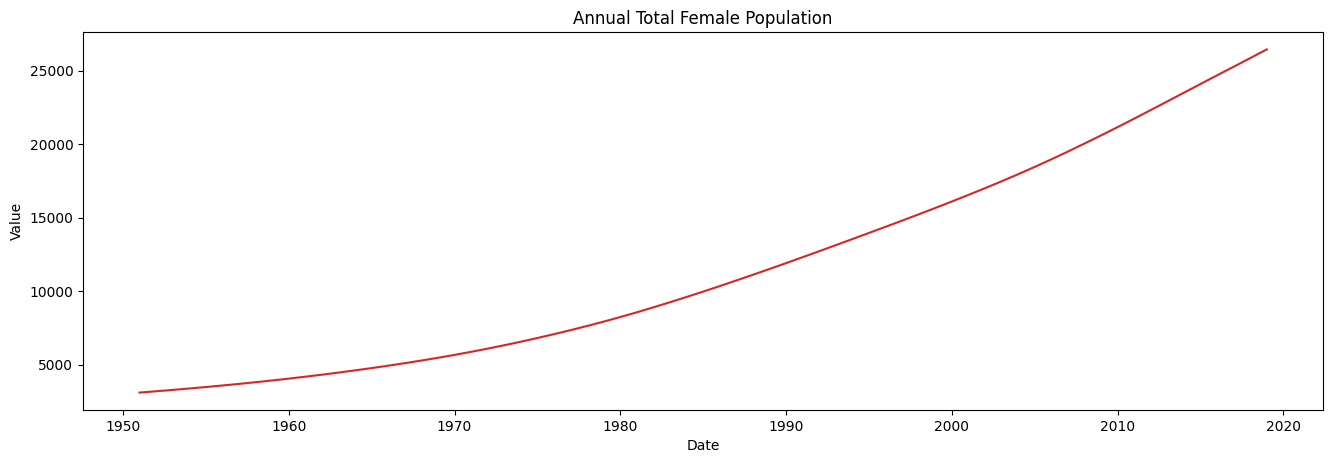

In [ ]:
# Draw Plot
def plot_df(pop, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Total Female population plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(pop, x=pop.Year, y=pop.PopFemale, title='Annual Total Female Population') 

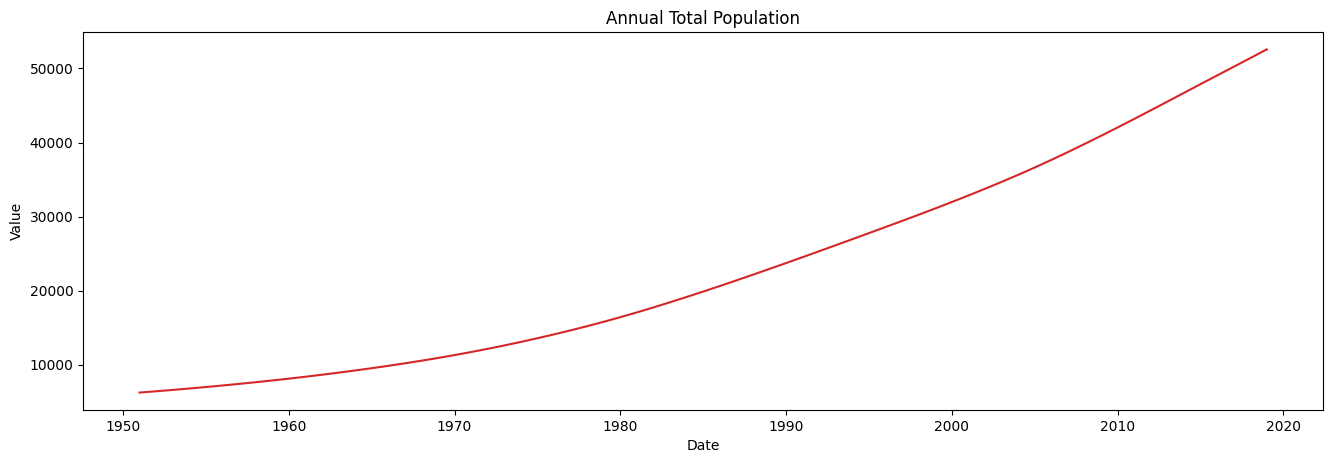

In [ ]:
# Draw Plot
def plot_df(pop, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Total population plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(pop, x=pop.Year, y=pop.PopTotal, title='Annual Total Population') 

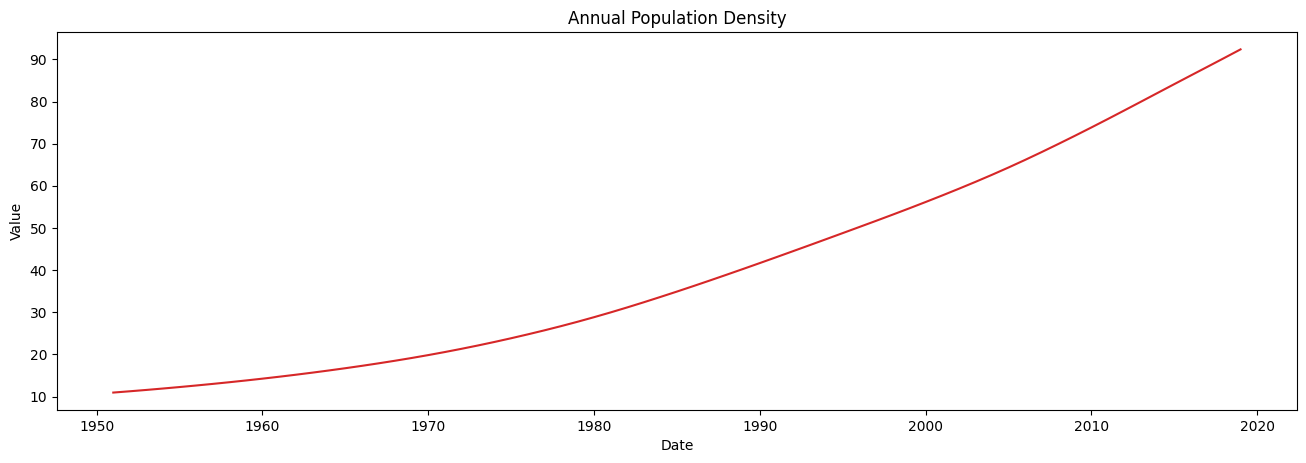

In [ ]:
# Draw Plot
def plot_df(pop, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('population density plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(pop, x=pop.Year, y=pop.PopDensity, title='Annual Population Density') 

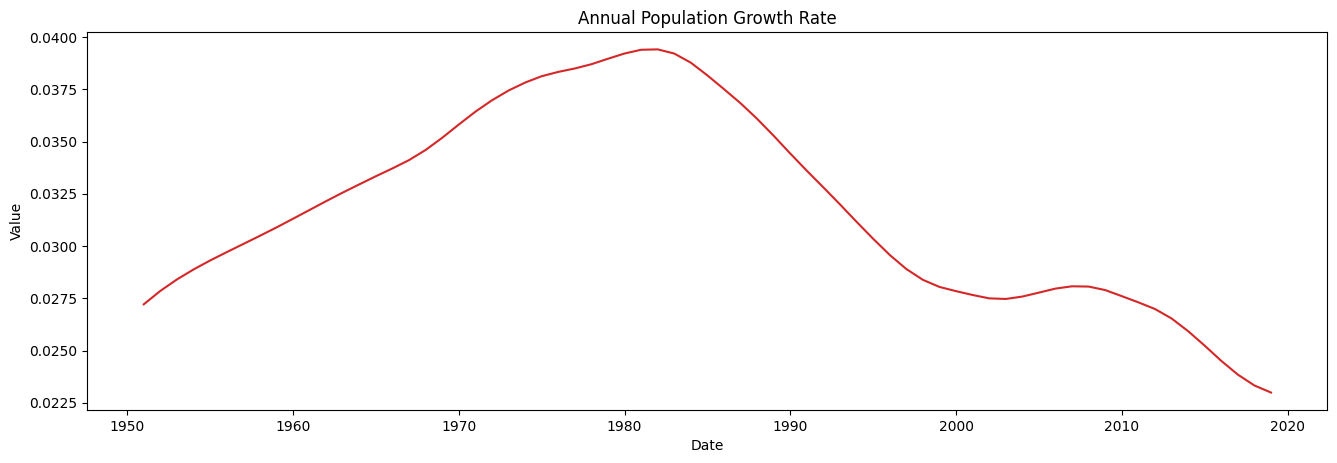

In [ ]:
# Draw Plot
def plot_df(pop, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Annual population growth rateplot.png', bbox_inches = 'tight')
    plt.show()

plot_df(pop, x=pop.Year, y=pop.population_growth_rate, title='Annual Population Growth Rate') 

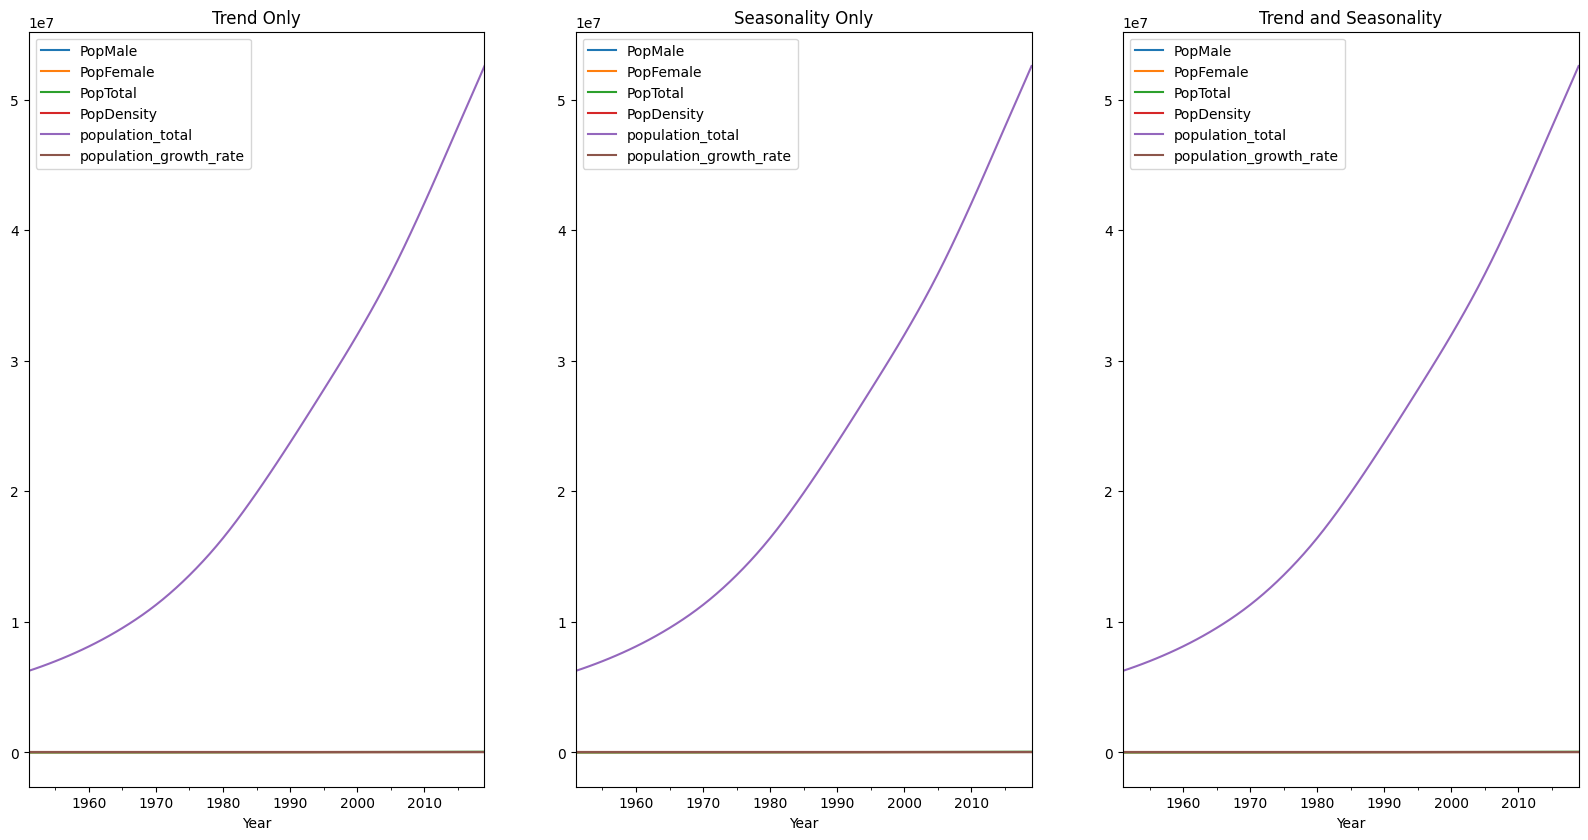

In [ ]:
# Checking for trend and seasonality
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('population.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('population.csv', parse_dates=['Year'], index_col='Year').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('population.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

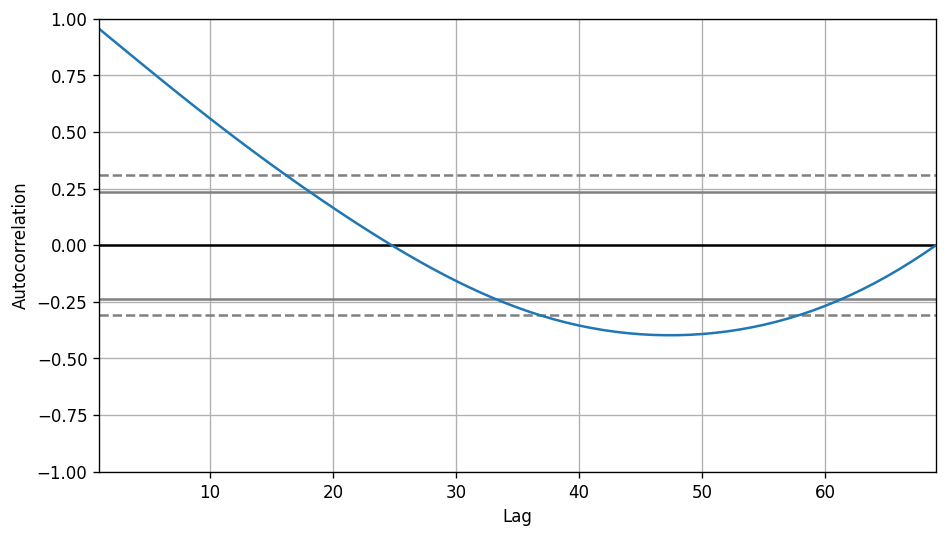

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(population.PopMale.tolist())
plt.savefig('male pop autocorre.png', bbox_inches = 'tight') 

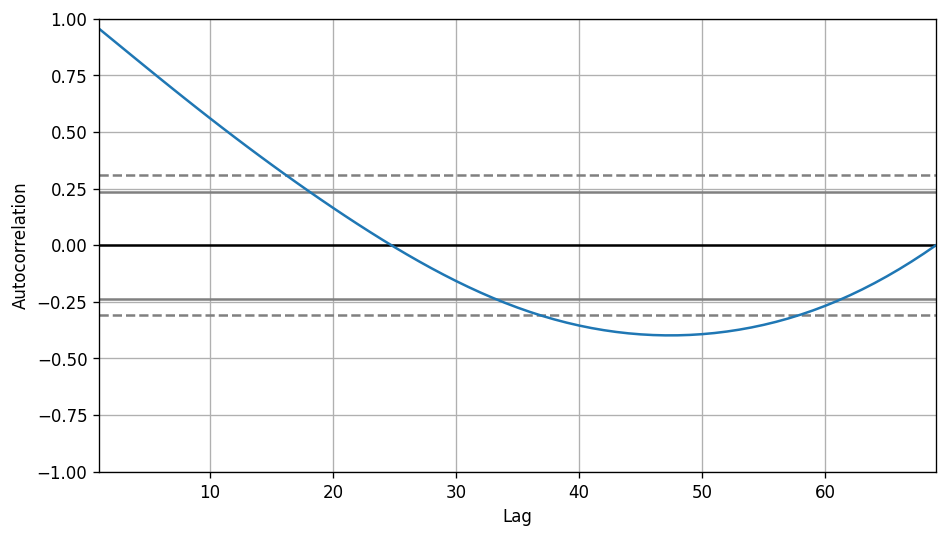

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(population.PopFemale.tolist())
plt.savefig('pop fem autocorre.png', bbox_inches = 'tight') 

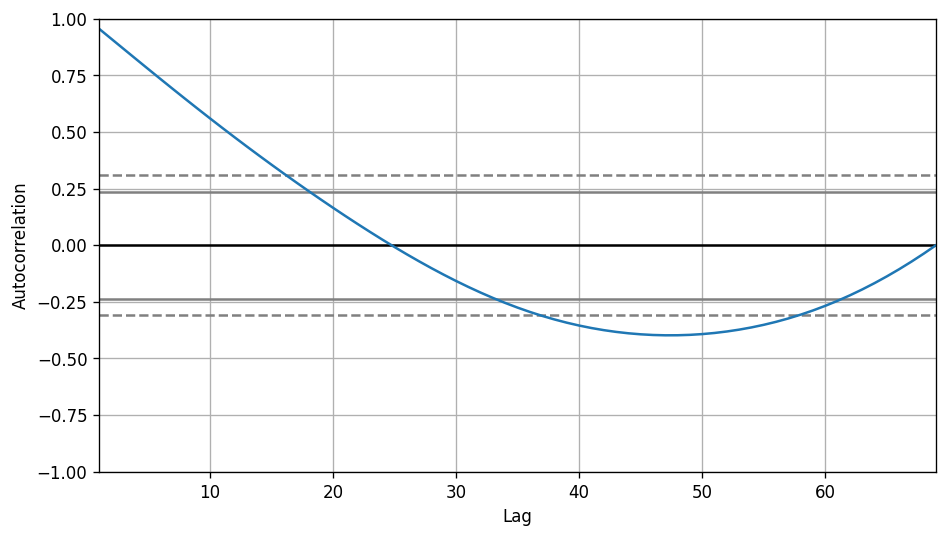

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(population.population_total.tolist())
plt.savefig('pop_tot_autocorre.png', bbox_inches = 'tight') 

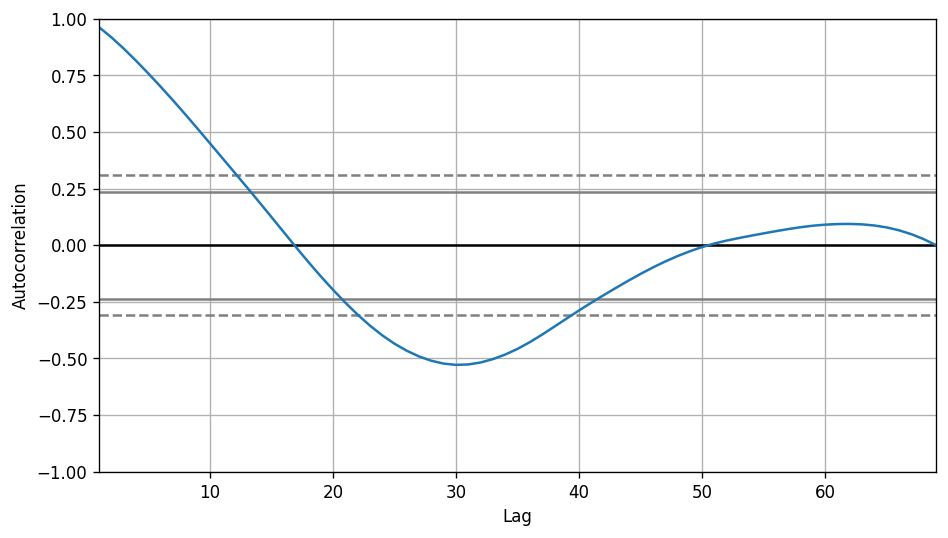

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(population.population_growth_rate.tolist())
plt.savefig('pop growth rate autocorre.png', bbox_inches = 'tight') 

The time series has no seasonality.

In [ ]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('population.csv')
a10 = pd.read_csv('population.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.population_growth_rate, m=2, r=0.2*np.std(ss.population_growth_rate)))    
print(ApEn(a10.population_total, m=2, r=0.2*np.std(a10.population_total)))   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     

0.2198694308518725
0.0007380231042208862
0.3192686682018149
0.7669020356057965


It has a low approximate entropy. It is easy to forecast.

### Infant mortality rate

In [ ]:
imr = pd.read_csv('IMR.csv', parse_dates=['Year'], index_col='Year')
imr.reset_index(inplace=True)
imr

Year  ...                              Unitofmeasure
0   1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
1   1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
2   1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
3   1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
4   1954-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
..         ...  ...                                        ...
225 2017-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
226 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
227 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
228 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
229 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births

[230 rows x 5 columns]

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(imr.IMR, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.422567934271989
p-value: 0.00027069270893362627
Critial Values:
   1%, -3.460154163751041
Critial Values:
   5%, -2.874648939216792
Critial Values:
   10%, -2.5737567259151044


The null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in Augmented Dickey Fuller test (ADH test) is less than the significance level (0.05), you reject the null hypothesis. Reject the null hypothesis

In [ ]:
IMR.head()

Indicator  ...       Year
0  MRY0: Infant mortality rate  ... 1952-01-01
1  MRY0: Infant mortality rate  ... 1952-01-01
2  MRY0: Infant mortality rate  ... 1953-01-01
3  MRY0: Infant mortality rate  ... 1953-01-01
4  MRY0: Infant mortality rate  ... 1954-01-01

[5 rows x 5 columns]

In [ ]:
ml_imr = pd.read_csv('male_imr.csv', parse_dates=['Year'], index_col='Year')
ml_imr.reset_index(inplace=True)
ml_imr

Year  ...                              Unitofmeasure
0  1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
1  1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
2  1954-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
3  1955-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
4  1956-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
..        ...  ...                                        ...
63 2015-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
64 2016-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
65 2017-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
66 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
67 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births

[68 rows x 5 columns]

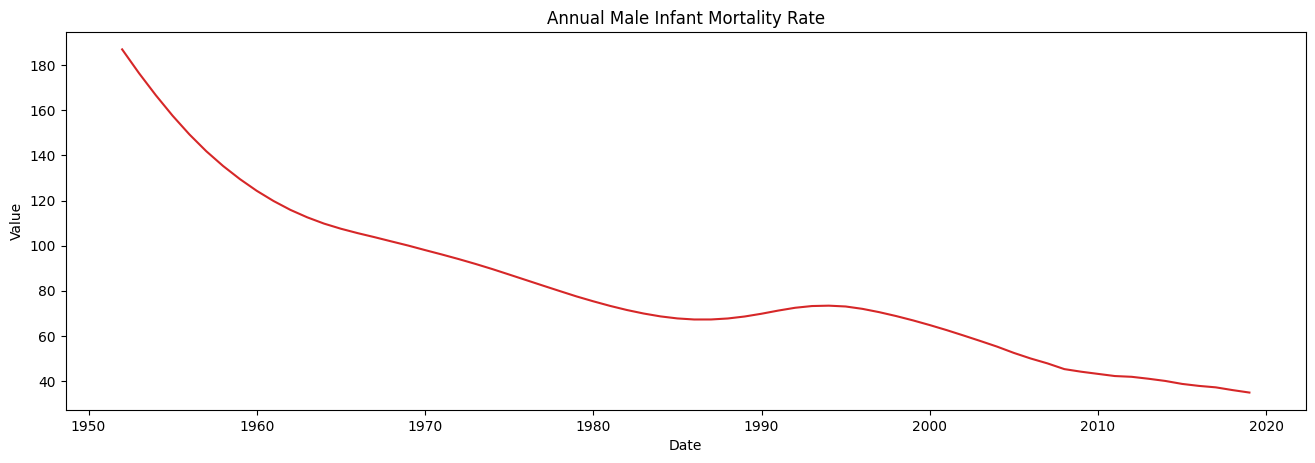

In [ ]:
# Draw Plot
def plot_df(ml_imr, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Annual Male Infant Mortality rate plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(ml_imr, x=ml_imr.Year, y=ml_imr.IMR, title='Annual Male Infant Mortality Rate') 

In [ ]:
fl_imr = pd.read_csv('fem_imr.csv', parse_dates=['Year'], index_col='Year')
fl_imr.reset_index(inplace=True)
fl_imr

Year  ...                              Unitofmeasure
0  1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
1  1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
2  1954-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
3  1955-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
4  1956-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
..        ...  ...                                        ...
63 2015-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
64 2016-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
65 2017-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
66 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
67 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births

[68 rows x 5 columns]

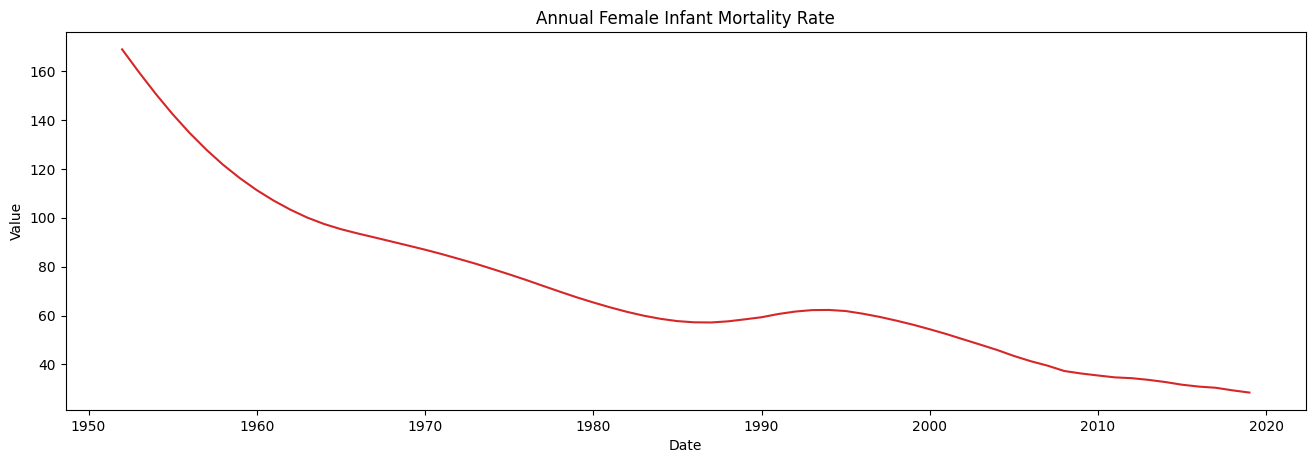

In [ ]:
# Draw Plot
def plot_df(fl_imr, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('Annual female Infant Mortality rate plot.png', bbox_inches = 'tight')
    plt.show()

plot_df(fl_imr, x=fl_imr.Year, y=fl_imr.IMR, title='Annual Female Infant Mortality Rate') 

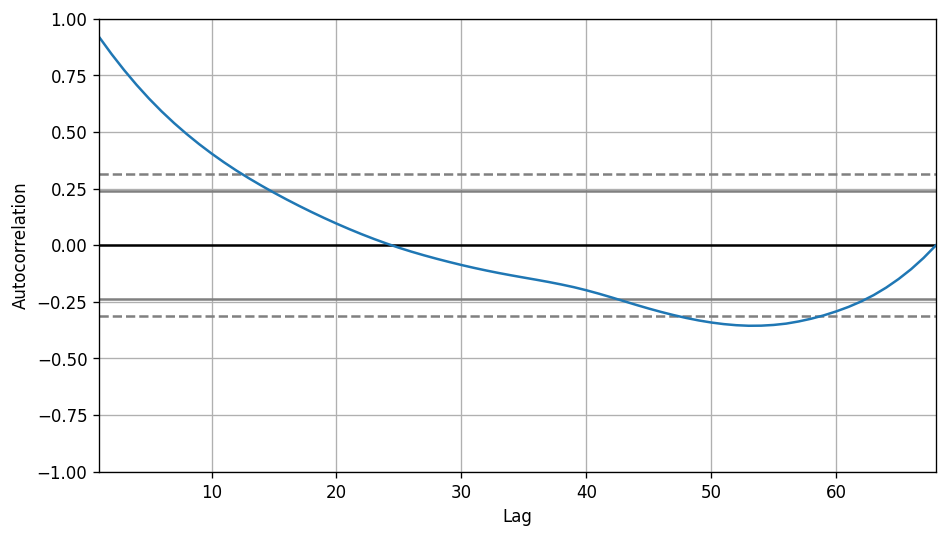

In [ ]:
# Creating an autocorrelation plot
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(fl_imr.IMR.tolist())
plt.savefig('Imr fem autocorre.png', bbox_inches = 'tight') 

The autocorrelation plot of Female Infant mortality rate has no spikes which shows no seasonality.

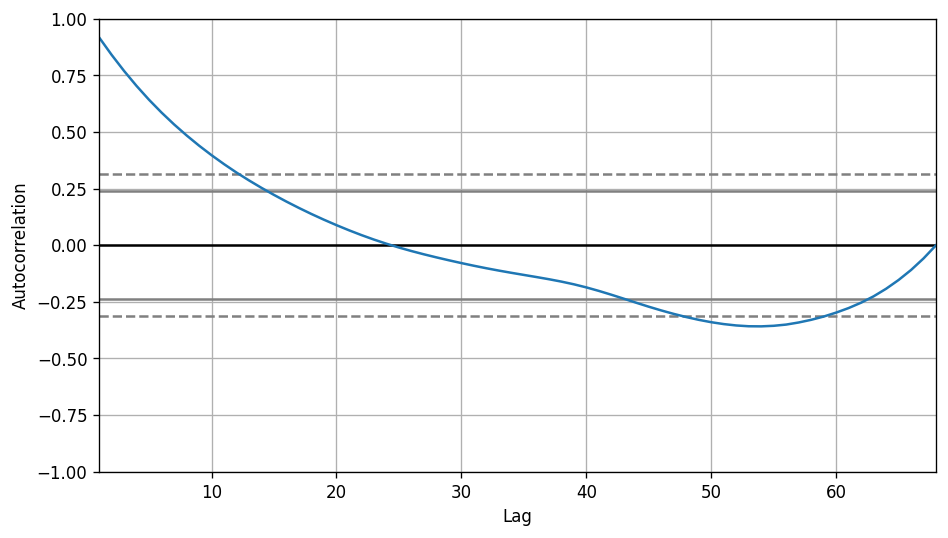

In [ ]:

from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(ml_imr.IMR.tolist())
plt.savefig('Imr Male autocorre.png', bbox_inches = 'tight') 

The autocorrelation plot of Male Infant mortality rate has no spikes which shows no seasonality.

In [ ]:
#imr_f.to_csv('fem_imr.csv')

#imr_m.to_csv('male_imr.csv')

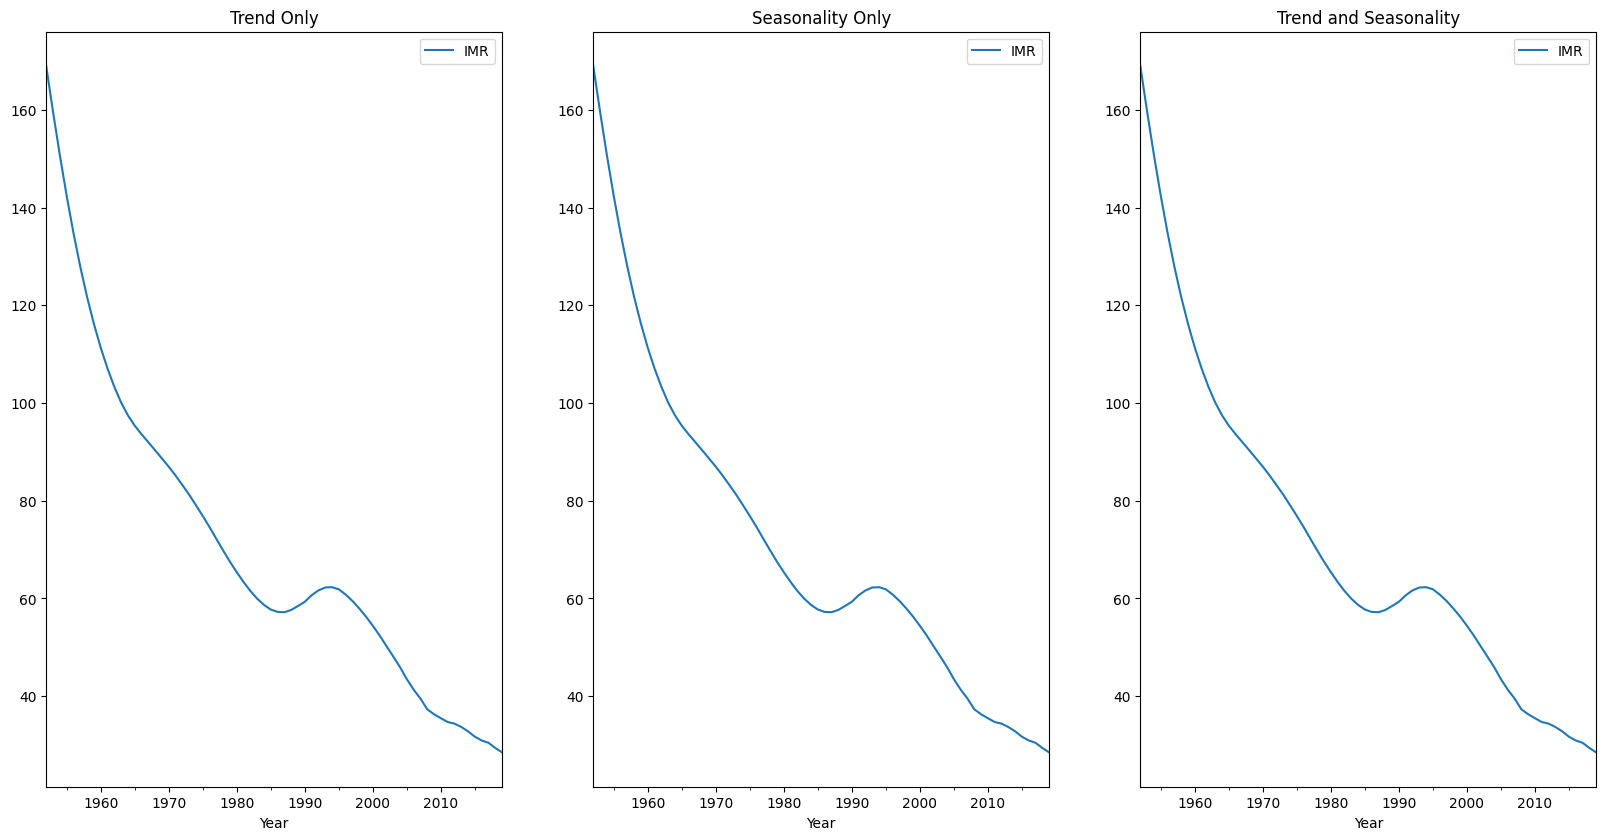

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('fem_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('fem_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('fem_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

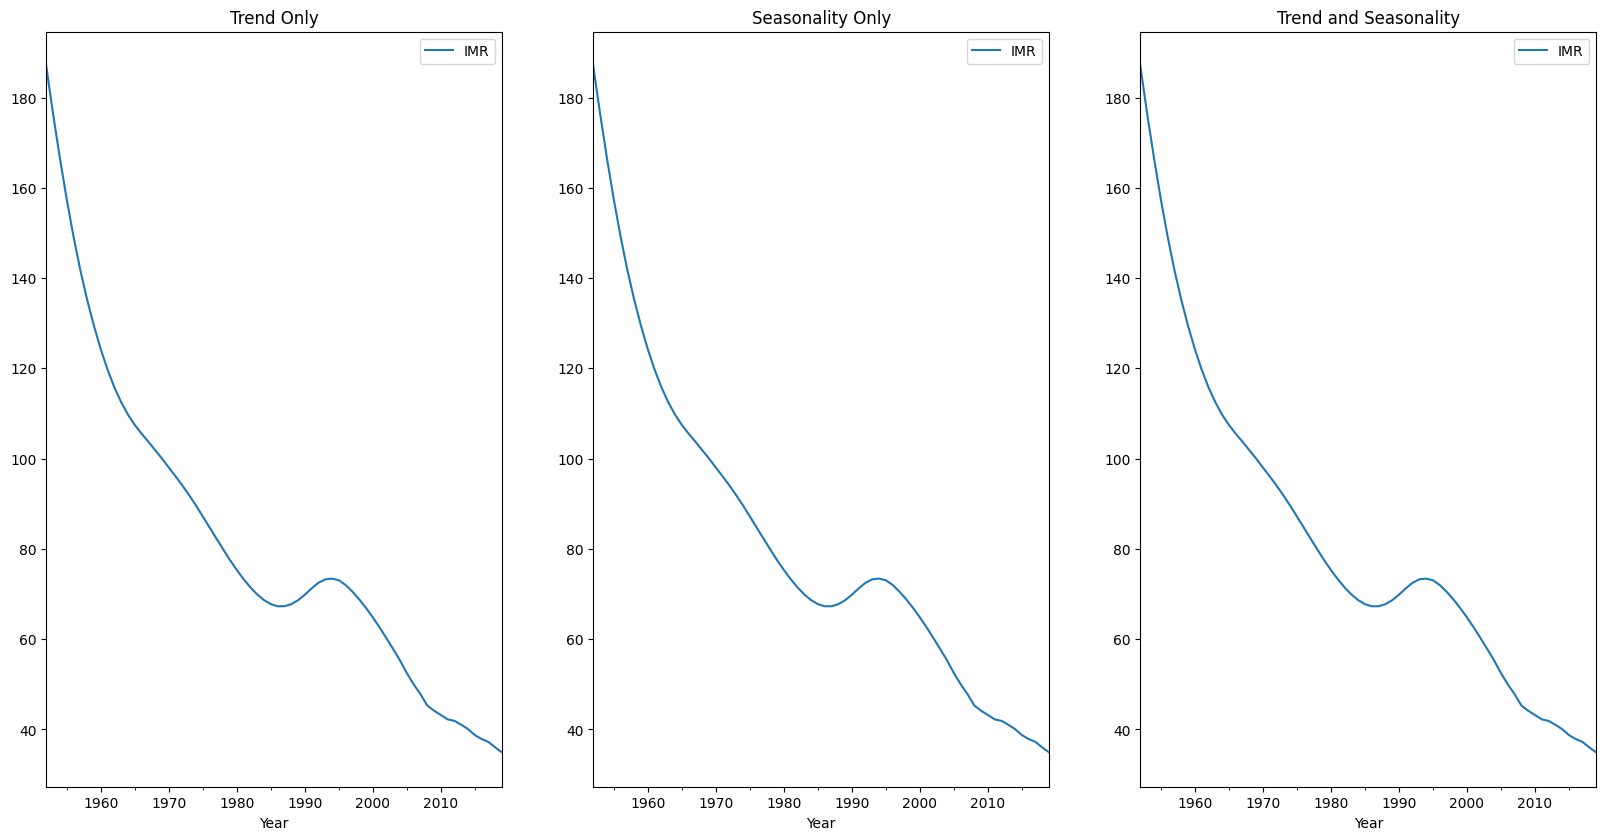

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('male_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('male_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('male_imr.csv', parse_dates=['Year'], index_col='Year').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

In [ ]:
fem_imr = pd.read_csv('fem_imr.csv')
male_imr = pd.read_csv('male_imr.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(fem_imr.IMR, m=2, r=0.2*np.std(fem_imr.IMR)))    
print(ApEn(male_imr.IMR, m=2, r=0.2*np.std(male_imr.IMR)))
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))

0.03557655739704879
0.034138144371003154
0.08867274083524546
0.7381644774490885


It has a high approximate entropy. It is hard to forecast.

### Population Growth

In [ ]:
pop_growth.head()

Year  Total_Fertility_Rate  ...  GrowthRate  Rate_of_natural_increase
0 1953-01-01                 7.481  ...       2.793                    27.889
1 1958-01-01                 7.785  ...       3.004                    29.983
2 1963-01-01                 8.065  ...       3.202                    32.410
3 1968-01-01                 8.110  ...       3.409                    34.386
4 1973-01-01                 7.990  ...       3.667                    36.859

[5 rows x 17 columns]

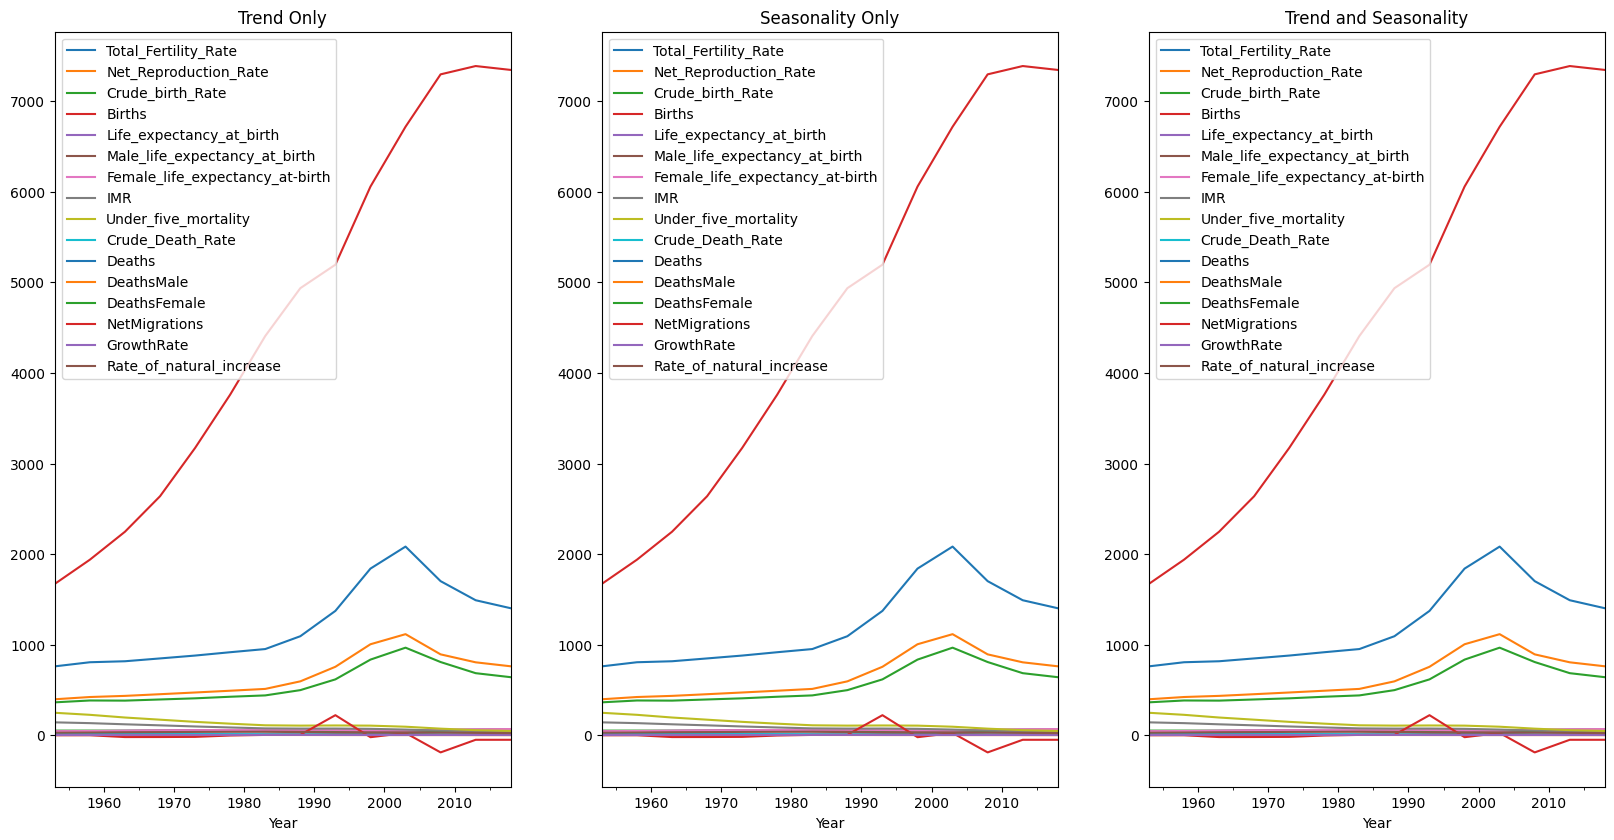

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10), dpi=100)
pd.read_csv('pop_growth.csv', parse_dates=['Year'], index_col='Year',encoding='Windows-1251').plot(title='Trend Only', legend=True, ax=axes[0])
pd.read_csv('pop_growth.csv', parse_dates=['Year'], index_col='Year',encoding='Windows-1251').plot(title='Seasonality Only', legend=True, ax=axes[1])

pd.read_csv('pop_growth.csv', parse_dates=['Year'], index_col='Year',encoding='Windows-1251').plot(title='Trend and Seasonality', legend=True, ax=axes[2])

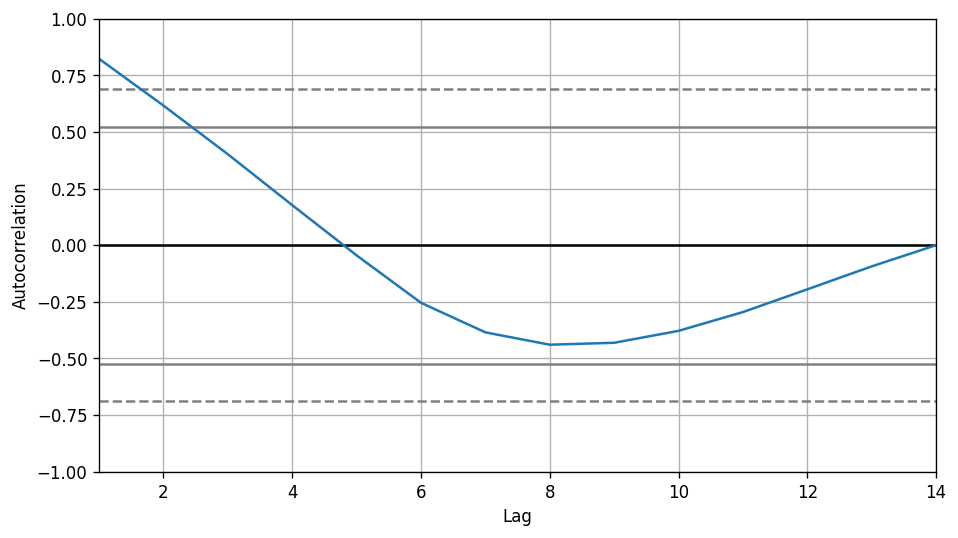

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Total_Fertility_Rate.tolist())

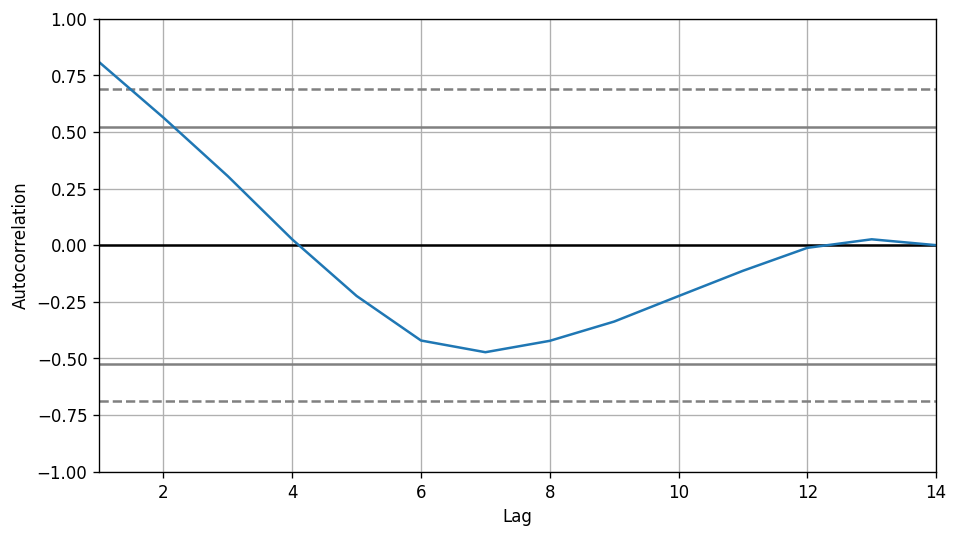

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Net_Reproduction_Rate.tolist())

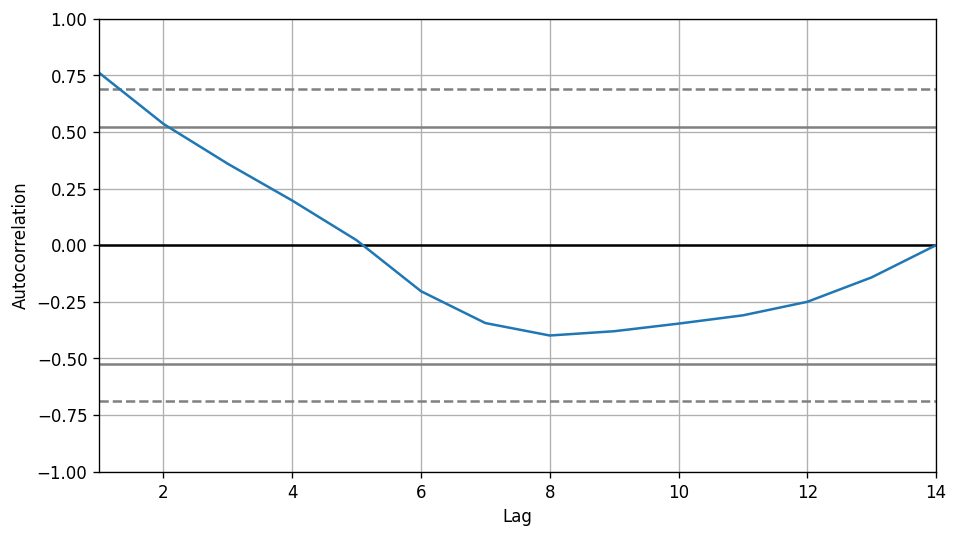

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Crude_birth_Rate.tolist())

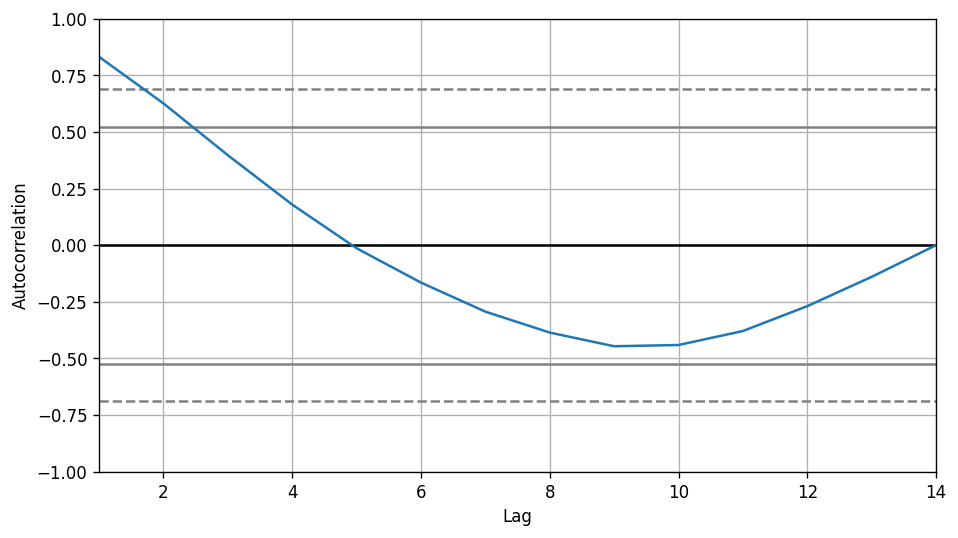

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Births.tolist())

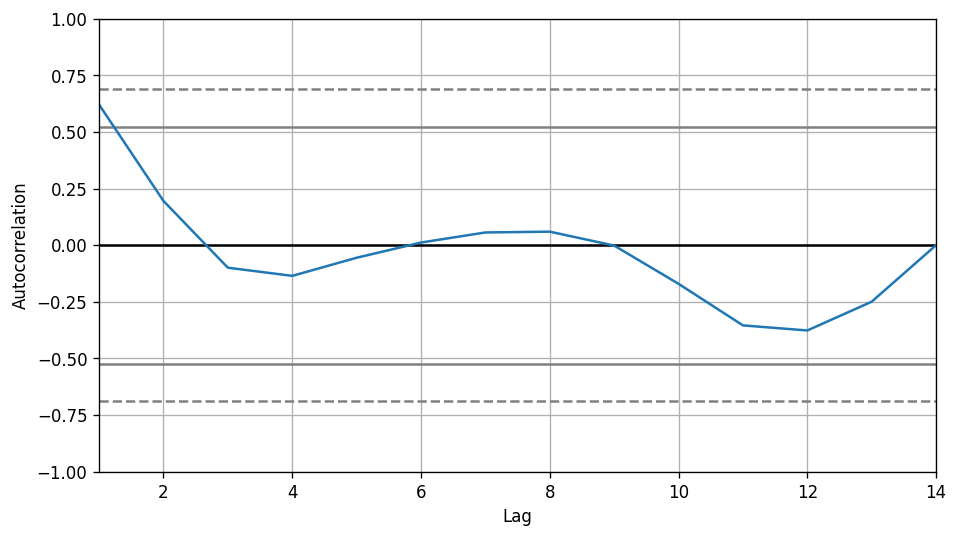

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Life_expectancy_at_birth.tolist())

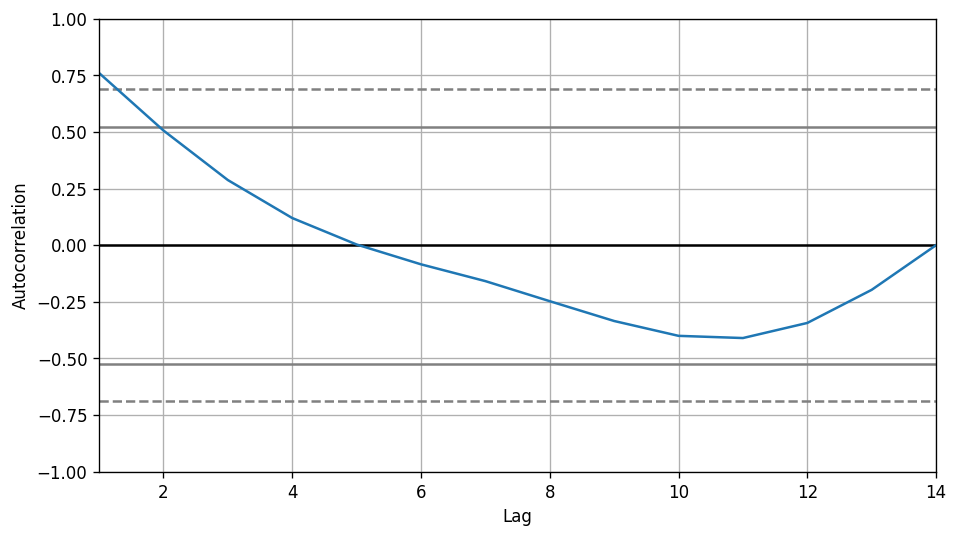

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.IMR.tolist())

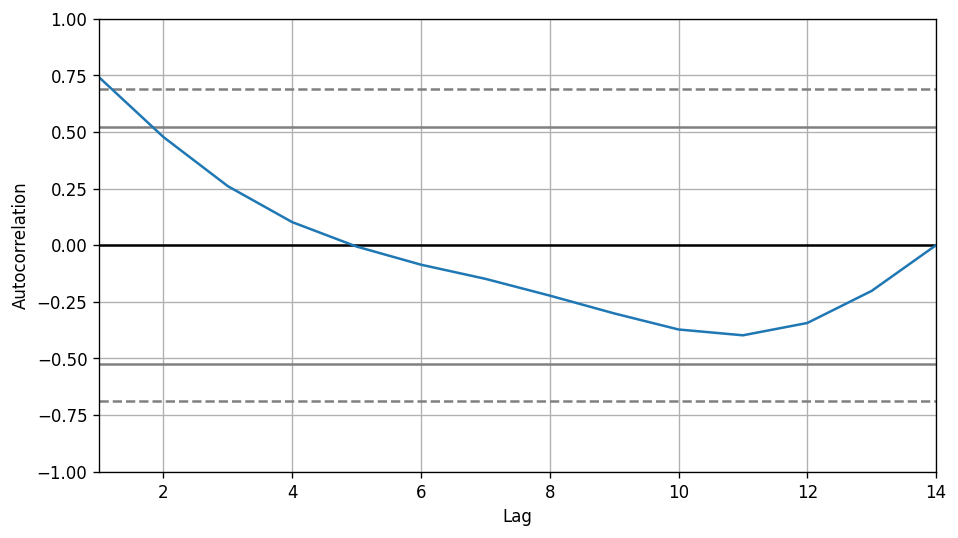

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Under_five_mortality.tolist())

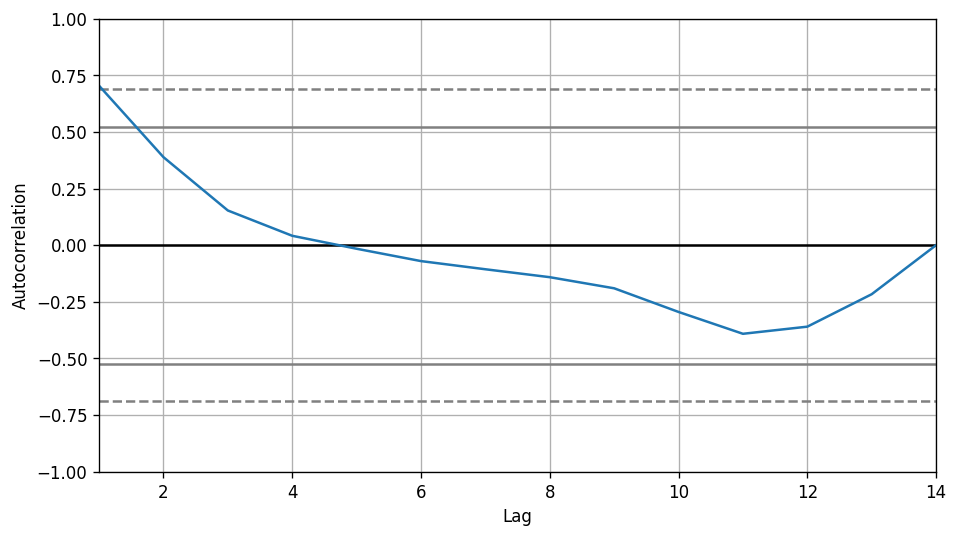

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Crude_Death_Rate.tolist())

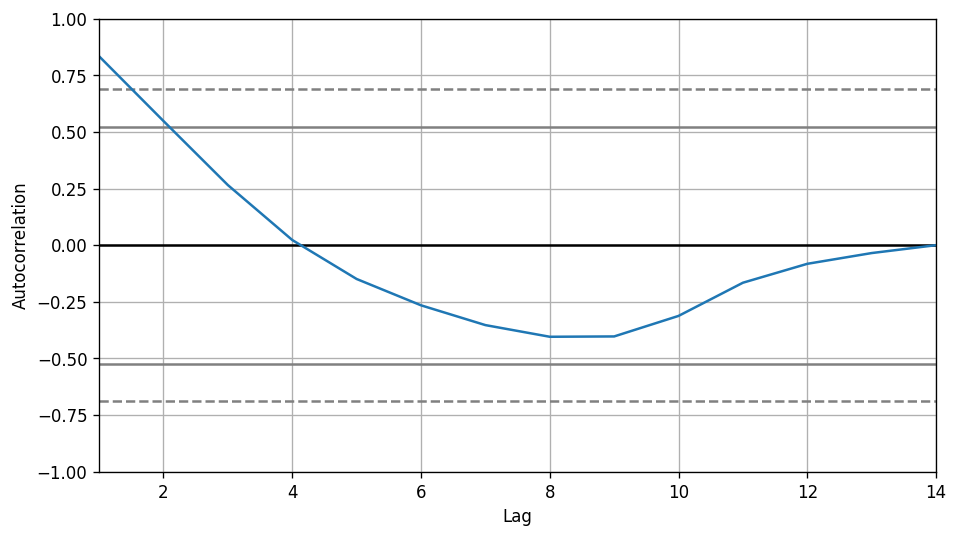

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Deaths.tolist())

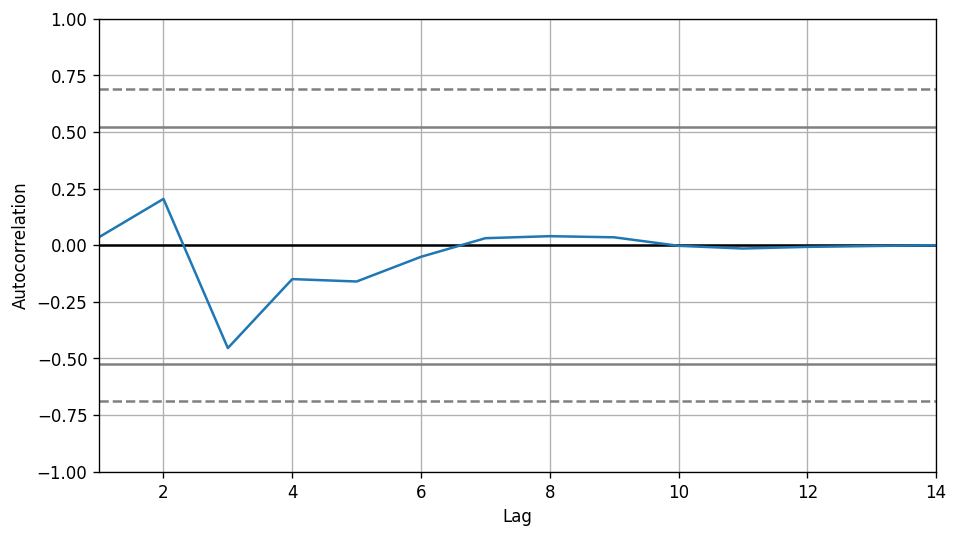

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.NetMigrations.tolist())

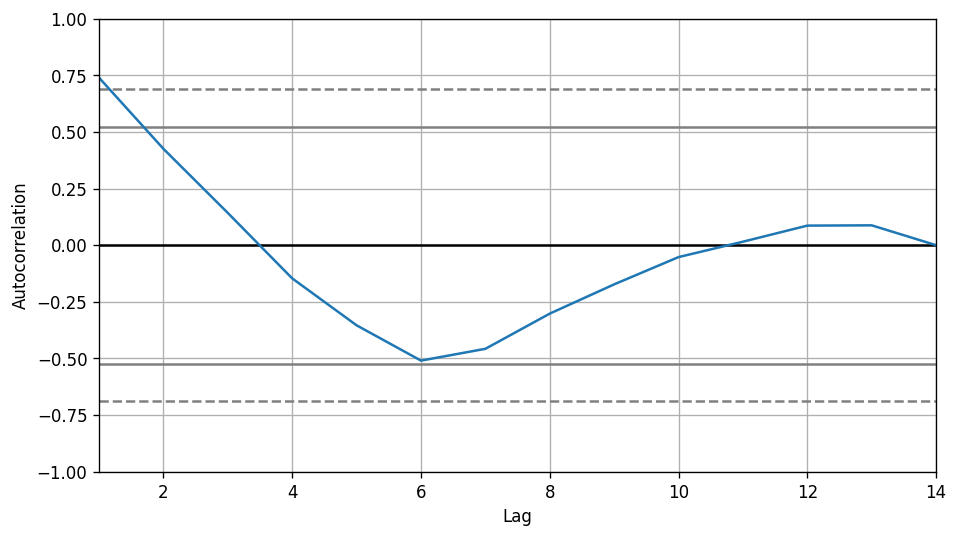

In [ ]:

from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pop_growth.Rate_of_natural_increase.tolist())

## ARIMA Model

### CPI

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#df=pd.read_csv('time_series_data.csv')
cpi.head()

# Updating the header
#df.columns=["Month","Sales"]
#df.head()
#cpi.describe()
#df.set_index('Month',inplace=True)

#from pylab import rcParams
#rcParams['figure.figsize'] = 15, 7
#f.plot()


Year  ...  Foodpriceinflation
0   January 2001  ...            3.193185
1  February 2001  ...            3.118768
2     March 2001  ...            3.044754
3     April 2001  ...            2.971138
4       May 2001  ...            2.897918

[5 rows x 4 columns]

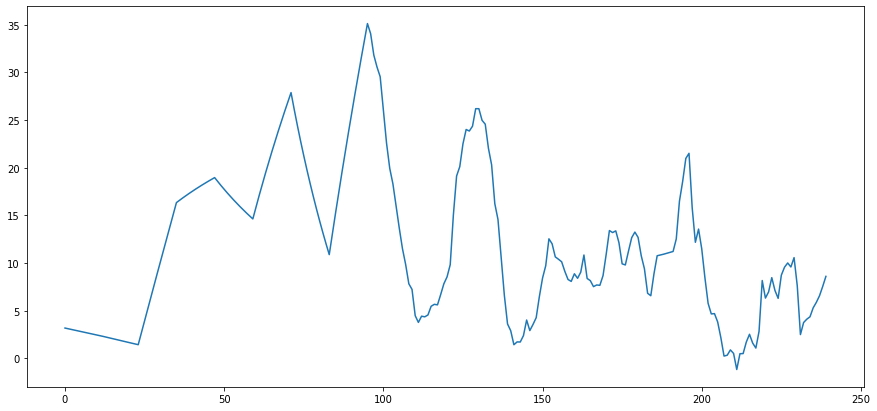

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
cpi['Foodpriceinflation'].plot()

the foood prices as seen keep on flactuating in prices. now we have to check if the model stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(cpi['Foodpriceinflation'])

Checking if the food price inflation is stationary

In [ ]:
def adfuller_test(Foodpriceinflation):
    result = adfuller(Foodpriceinflation)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(cpi['Foodpriceinflation'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -2.192761678583752
p-value : 0.2088830313107941
#Lags Used : 13
Number of Observations : 226


In [ ]:
cpi['food First Difference'] = cpi['Foodpriceinflation'] - cpi['Foodpriceinflation'].shift(1)
cpi['Seasonal First Difference'] = cpi['Foodpriceinflation']-cpi['Foodpriceinflation'].shift(12)
cpi.head()

Year  ...  Seasonal First Difference
0   January 2001  ...                        NaN
1  February 2001  ...                        NaN
2     March 2001  ...                        NaN
3     April 2001  ...                        NaN
4       May 2001  ...                        NaN

[5 rows x 6 columns]

In [ ]:
# Again testing if data is stationary
adfuller_test(cpi['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9301263685721026
p-value : 0.0018239872703641963
#Lags Used : 15
Number of Observations : 212


the p value here is 0.00182 which is less than 0.05 meaning that we fail to reject the null hypothesis. the data is stationary

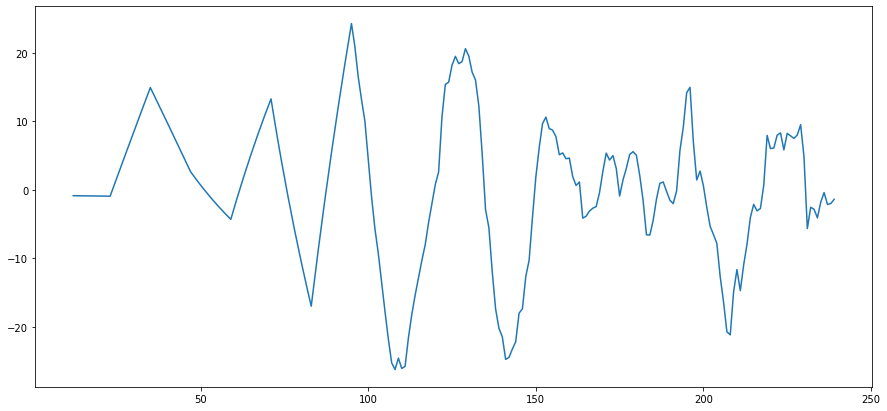

In [ ]:
cpi['Seasonal First Difference'].plot()

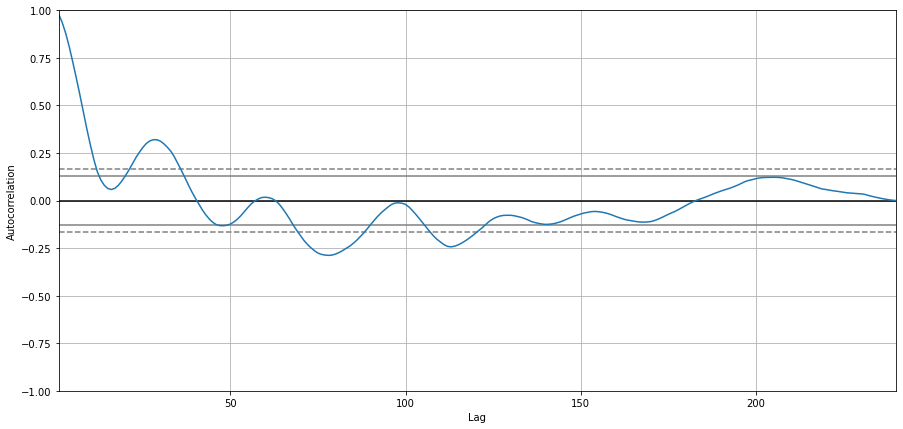

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(cpi['Foodpriceinflation'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


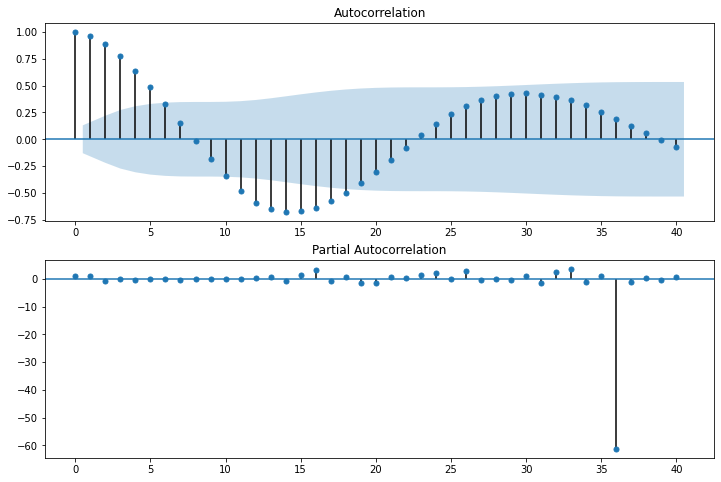

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(cpi['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(cpi['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(cpi['Foodpriceinflation'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.Foodpriceinflation   No. Observations:                  239
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -403.870
Method:                         css-mle   S.D. of innovations              1.310
Date:                  Mon, 28 Jun 2021   AIC                            815.740
Time:                          22:16:41   BIC                            829.646
Sample:                               1   HQIC                           821.344
                                                                                
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0291      0.209      0.139      0.889      -0.380       0.438
ar.L1.D.Foodpriceinflation     0.6482      0.118      5.489      0.000       0.417       0.880
ma.L1.D.Foodpriceinflation    -0.1271      0.171     -0.745      0.457      -0.462       0.207
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5427           +0.0000j            1.5427            0.0000
MA.1            7.8649           +0.0000j            7.8649            0.0000
-----------------------------------------------------------------------------
"""

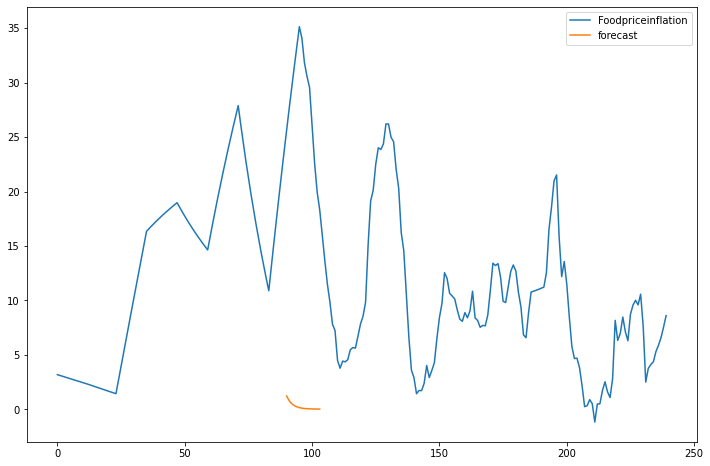

In [ ]:
cpi['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
cpi[['Foodpriceinflation','forecast']].plot(figsize=(12,8))

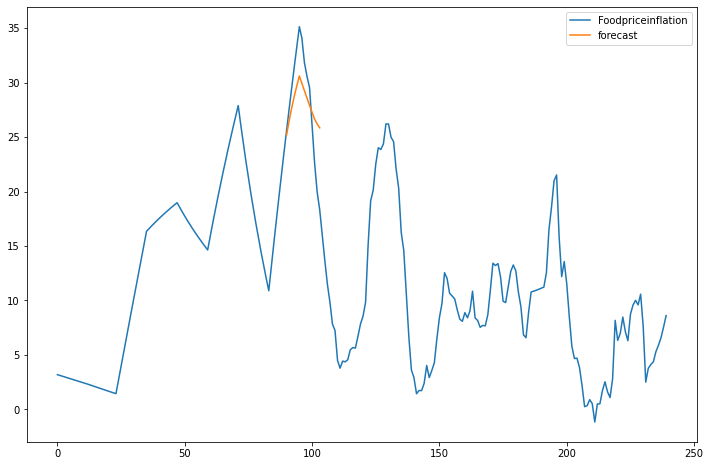

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(cpi['Foodpriceinflation'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
cpi['forecast']=results.predict(start=90,end=103,dynamic=True)
cpi[['Foodpriceinflation','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[cpi.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_cpi=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_cpi.tail()

future_cpi=pd.concat([cpi,future_datest_cpi])

future_cpi['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_cpi[['Foodpriceinflation', 'forecast']].plot(figsize=(12, 8))


TypeError: ignored

### **IMR**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
imr

Year  ...                              Unitofmeasure
0   1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
1   1952-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
2   1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
3   1953-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
4   1954-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
..         ...  ...                                        ...
225 2017-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
226 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
227 2018-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
228 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births
229 2019-01-01  ...  D_PER_1000_B: Deaths per 1000 live births

[230 rows x 5 columns]

In [ ]:
imr_final = imr.drop(['Indicator', 'Sex', 'Unitofmeasure'], axis=1, inplace=True)


In [ ]:
imr.head()

Year         IMR
0 1952-01-01  168.973466
1 1952-01-01  186.978254
2 1953-01-01  159.614436
3 1953-01-01  176.441928
4 1954-01-01  164.583600

In [ ]:
plt.xlabel('Year')
plt.ylabel('IMR')
plt.plot(imr)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe04bfccdd0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
rolling_mean = imr.rolling(window = 12).mean()
rolling_std = imr.rolling(window = 12).std()
plt.plot(imr, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


ValueError: ignored

As you can see, the rolling mean and rolling standard deviation decrease with time. Therefore, we can conclude that the time series is not stationary.


In [ ]:
result = adfuller(imr['IMR'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
df_log = np.log(imr)
plt.plot(df_log)


Let’s create a function to run the two tests which determine whether a given time series is stationary

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['IMR'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

As we can see, after subtracting the mean, the rolling mean and standard deviation are approximately horizontal. The p-value is below the threshold of 0.05 and the ADF Statistic is close to the critical values. Therefore, the time series is stationary.
Applying exponential decay is another way of transforming a time series such that it is stationary.

Applying exponential decay is another way of transforming a time series such that it is stationary.
r

In [ ]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)


Exponential decay performed worse than subtracting the rolling mean. However, it is still more stationary than the original.
Let’s try one more method to determine whether an even better solution exists. When applying time shifting, we subtract every the point by the one that preceded it.
null, (x1−x0), (x2−x1), (x3−x2), (x4−x3), …, (xn−xn−1)

In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

Time shifting performed worse than subtracting the rolling mean. However, it is still more stationary than the original.

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['IMR'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(imr)
plt.plot(predictions_ARIMA)

In [ ]:
results.plot_predict(1,264)


### **Labor**

In [ ]:
labor.head()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  

In [ ]:
labor['labour_income_share_in_GDP'].plot(figsize=(12,5))

In [ ]:
# Checking for Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     labortest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",labortest[0])
     print("2. P-Value : ", labortest[1])
     print("3. Num Of Lags : ", labortest[2])
     print("4. Num Of Observations Used For ADF Regression:",      labortest[3])
     print("5. Critical Values :")
     for key, val in labortest[4].items():
         print("\t",key, ": ", val)
ad_test(labor['labour_income_share_in_GDP'])

the p-value 0.9934 is greater than 0.05 hence the time series is not stationary hence seasonal

In [ ]:
pip install numpy

In [ ]:
pip install pmdarima

In [ ]:
# determining the best ARIMA nodel to use
from pmdarima import auto_arima
#from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(labor['labour_income_share_in_GDP'], trace=True,
suppress_warnings=True)

The best ARIMA model to use is  ARIMA(0,2,1)

In [ ]:
#

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(labor['labour_income_share_in_GDP'],order=(0,2,1))
model=model.fit()
model.summary()

Checking how good the model is

In [ ]:
labor['forecast']=model.predict(start=2,end=20,dynamic=True)
labor[['labour_income_share_in_GDP','forecast']].plot(figsize=(12,8))

Checking the Model Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
labor['labour_income_share_in_GDP'].mean()
rmse=sqrt(mean_squared_error(labor['forecast']) 
print("rmse")

### **Crops**

In [ ]:
crops2.head()

### **Population**

In [ ]:
pop2

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
pop2['GrowthRate'].plot()


In [ ]:
# visualizing the annual increase in population throughut the years
rcParams['figure.figsize'] = 15, 7
pop2['Rate_of_natural_increase'].plot()

Checking for stationarity on the growth rate

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     pop2test = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",pop2test[0])
     print("2. P-Value : ", pop2test[1])
     print("3. Num Of Lags : ", pop2test[2])
     print("4. Num Of Observations Used For ADF Regression:",      pop2test[3])
     print("5. Critical Values :")
     for key, val in pop2test[4].items():
         print("\t",key, ": ", val)
ad_test(pop2['GrowthRate'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(pop2['GrowthRate'])

**Seeing the first difference and seasonal Difference**

In [ ]:
pop2['Sales First Difference'] = pop2['GrowthRate'] - pop2['GrowthRate'].shift(1)
pop2['Seasonal First Difference']=pop2['GrowthRate']-pop2['GrowthRate'].shift(12)
pop2.head()

In [ ]:
# Again testing if data is stationary
adfuller_test(pop2['GrowthRate'].dropna())

the p-value is 0.0. we fail to reject null hypothesis data is stationary

In [ ]:
pop2['Seasonal First Difference'].plot()

Creating an autocorrelation

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pop2['GrowthRate'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pop2['Seasonal First Difference'].dropna(),lags=5,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pop2['Seasonal First Difference'].dropna(),lags=5,ax=ax2)

In [ ]:
pip install pmdarima

In [ ]:
# Determining the best ARIMA model to use
from pmdarima import auto_arima
stepwise_fit = auto_arima(pop2['GrowthRate'], trace=True,
suppress_warnings=True)

In [ ]:
pop2.shape

In [ ]:
print(pop2.shape)
train=pop2.iloc[:-19]
test=pop2.iloc[-19:]
print(train.shape,test.shape)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['GrowthRate'],order=(1,1,1))
model=model.fit()
model.summary()

## SARIMA

### CPI2

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
df.head()

Year  ConsumerPricesFoodIndices2015  ...  year  month
0 2001-01-01                      16.328080  ...  2001    Jan
1 2001-02-01                      16.360620  ...  2001    Feb
2 2001-03-01                      16.393159  ...  2001    Mar
3 2001-04-01                      16.425699  ...  2001    Apr
4 2001-05-01                      16.458238  ...  2001    May

[5 rows x 6 columns]

In [ ]:
y = df.set_index(['Year'])
y.head(5)

ConsumerPricesFoodIndices2015  ...  month
Year                                       ...       
2001-01-01                      16.328080  ...    Jan
2001-02-01                      16.360620  ...    Feb
2001-03-01                      16.393159  ...    Mar
2001-04-01                      16.425699  ...    Apr
2001-05-01                      16.458238  ...    May

[5 rows x 5 columns]

In [ ]:
y = y.drop(['year'], axis = 1)
y = y.drop(['month'], axis = 1)

In [ ]:
cfi = y[[ 'ConsumerPricesFoodIndices2015']]
cfi

ConsumerPricesFoodIndices2015
Year                                     
2001-01-01                      16.328080
2001-02-01                      16.360620
2001-03-01                      16.393159
2001-04-01                      16.425699
2001-05-01                      16.458238
...                                   ...
2020-08-01                     141.387407
2020-09-01                     141.599488
2020-10-01                     143.213722
2020-11-01                     145.419214
2020-12-01                     148.981984

[240 rows x 1 columns]

In [ ]:
cgi = y[[ 'ConsumerPricesGeneralIndices2015']]
cgi

ConsumerPricesGeneralIndices2015
Year                                        
2001-01-01                         26.658800
2001-02-01                         26.494998
2001-03-01                         26.331195
2001-04-01                         26.720226
2001-05-01                         26.904503
...                                      ...
2020-08-01                        133.215787
2020-09-01                        133.213333
2020-10-01                        134.480792
2020-11-01                        135.922482
2020-12-01                        137.256198

[240 rows x 1 columns]

In [ ]:
fpi = y[[ 'Foodpriceinflation']]
fpi

Foodpriceinflation
Year                          
2001-01-01            3.193185
2001-02-01            3.118768
2001-03-01            3.044754
2001-04-01            2.971138
2001-05-01            2.897918
...                        ...
2020-08-01            5.310391
2020-09-01            5.891924
2020-10-01            6.587472
2020-11-01            7.562035
2020-12-01            8.611575

[240 rows x 1 columns]

#### CPI Food indices

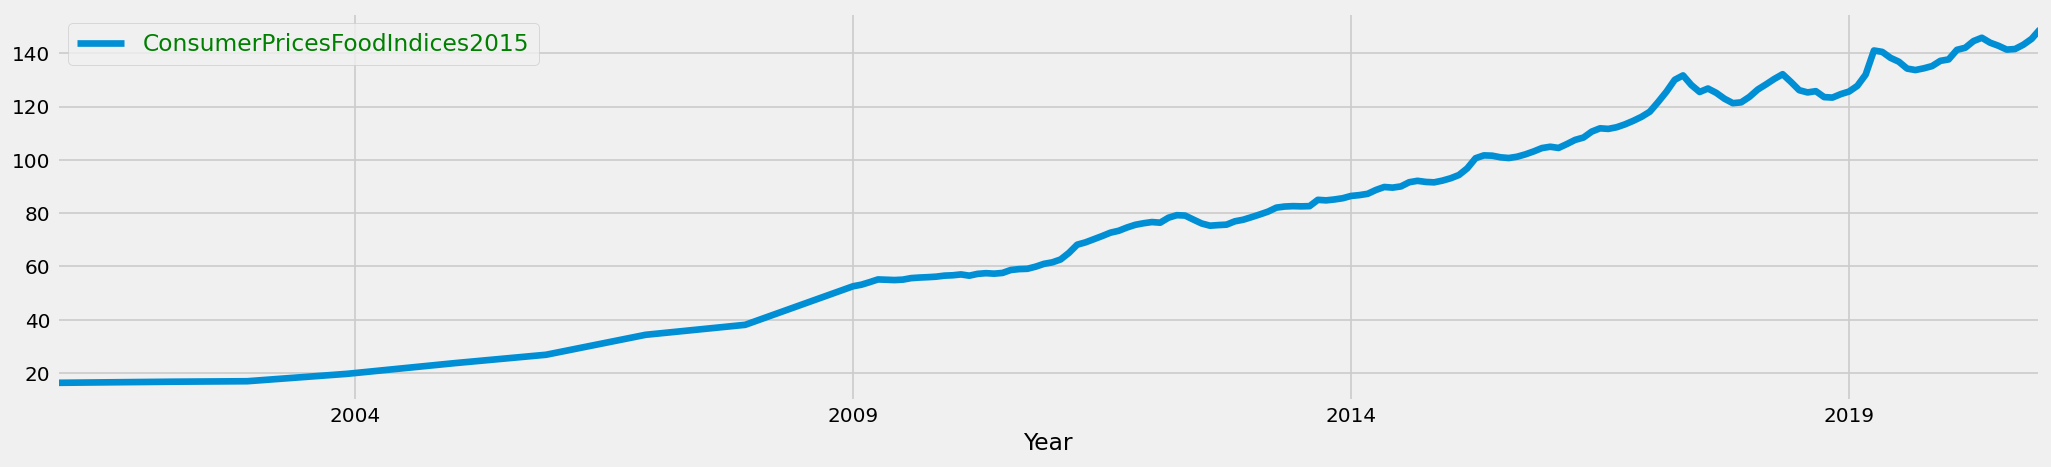

In [ ]:
cfi.plot(figsize=(19, 4))
plt.show()

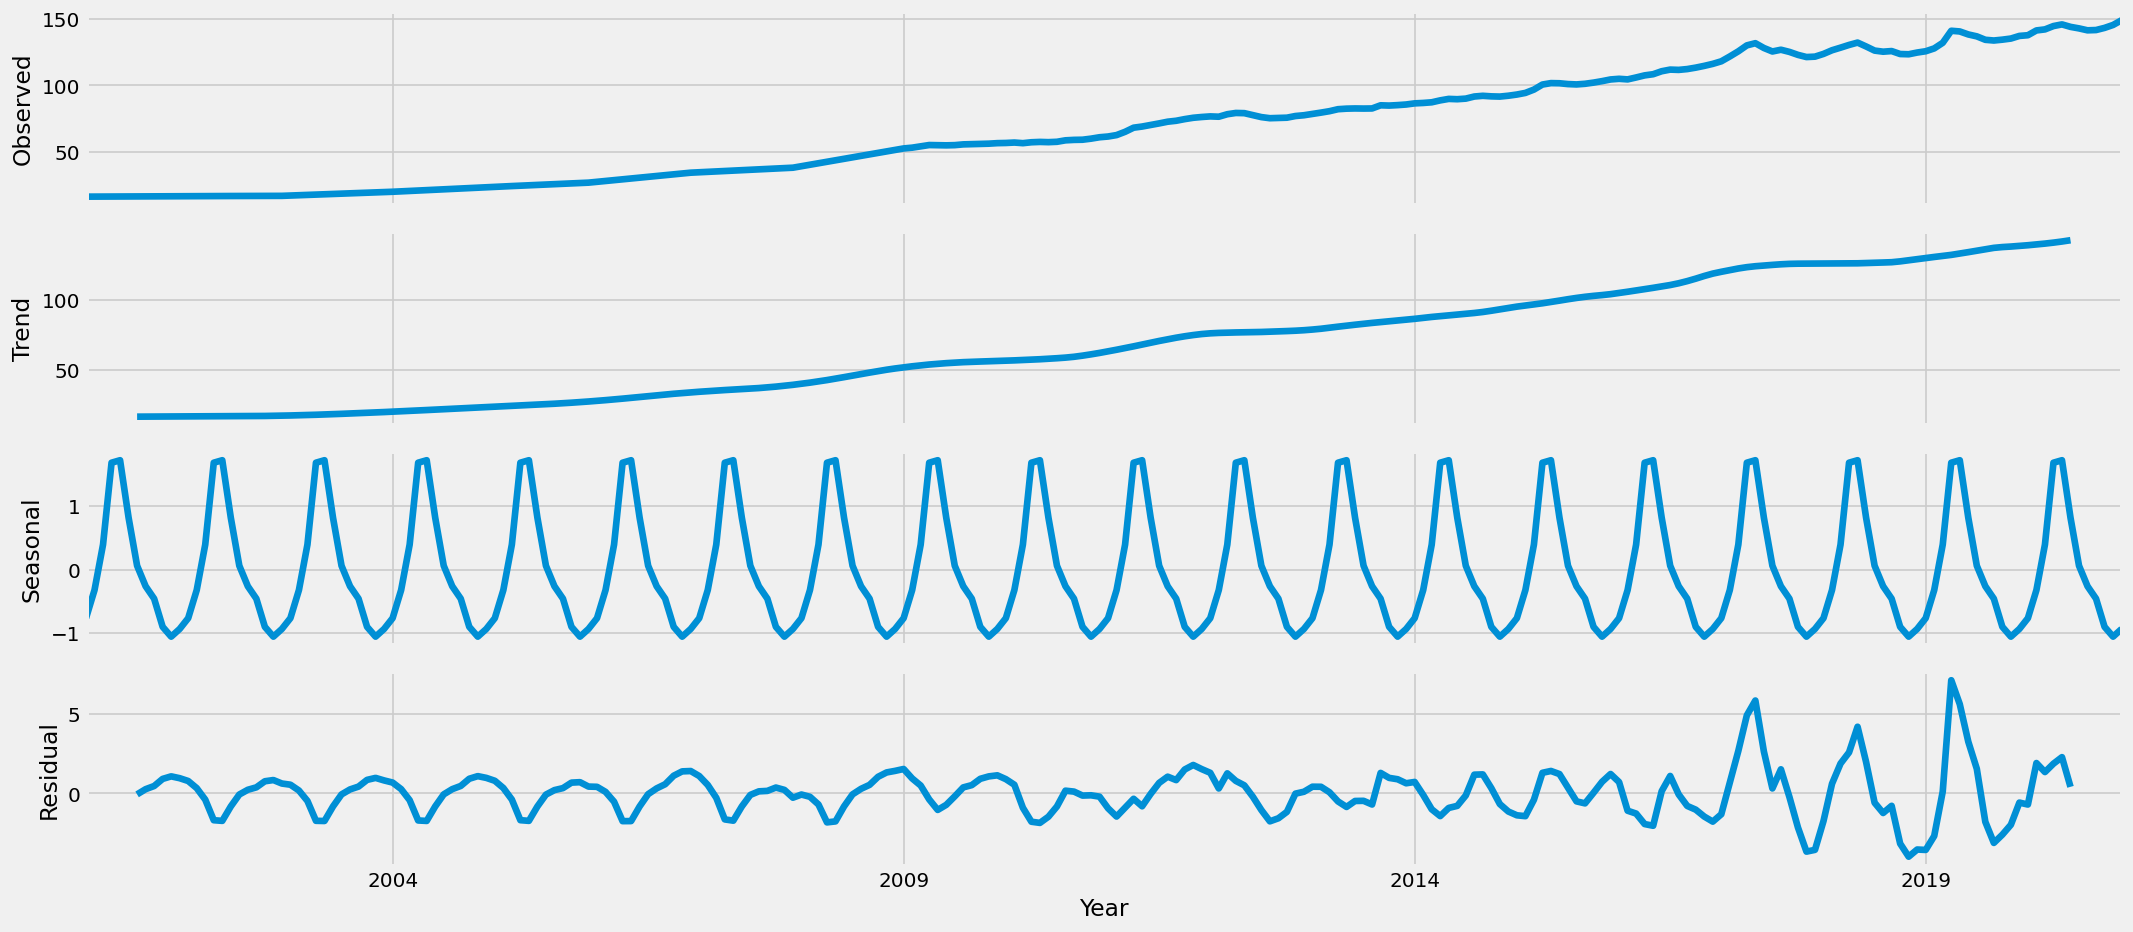

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cfi, model='additive')
fig = decomposition.plot()
plt.savefig('CPFI Trend.png', bbox_inches = 'tight')
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(cfi,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2781.4551537352336
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2394.138484928341
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1595.5284026526433
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1463.836100830905
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1357.592302895025
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1354.1775012868925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1402.8125553203938
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1284.8892042722941
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2450.3590005420965
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2079.612916403477
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1296.9721607026281
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1185.7766940528986
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1084.5751793888398
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1078.2955266130607
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1140.5023582122374
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1029.1379789794833
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:825.4246673334967
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:759.204862293287

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:618.0141803765766

In [ ]:
mod = sm.tsa.statespace.SARIMAX(cfi,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4323      0.036     11.846      0.000       0.361       0.504
ma.S.L12      -0.7167      0.049    -14.597      0.000      -0.813      -0.620
sigma2         1.0191      0.046     22.061      0.000       0.929       1.110


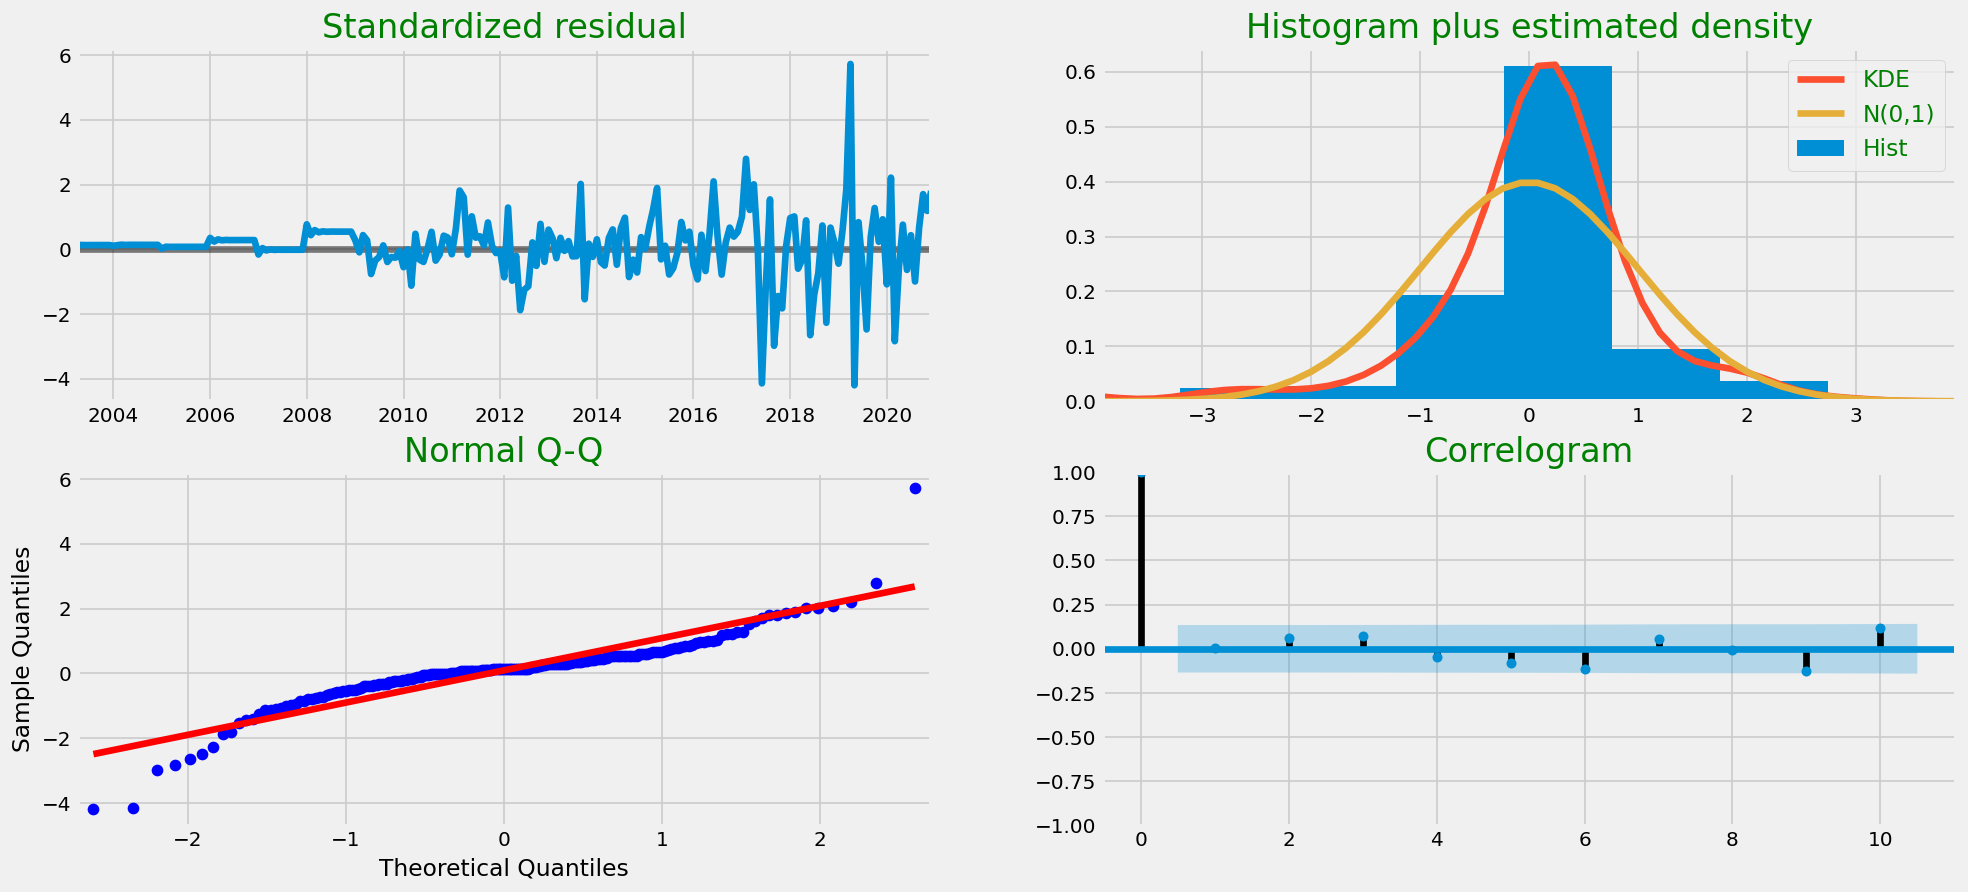

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

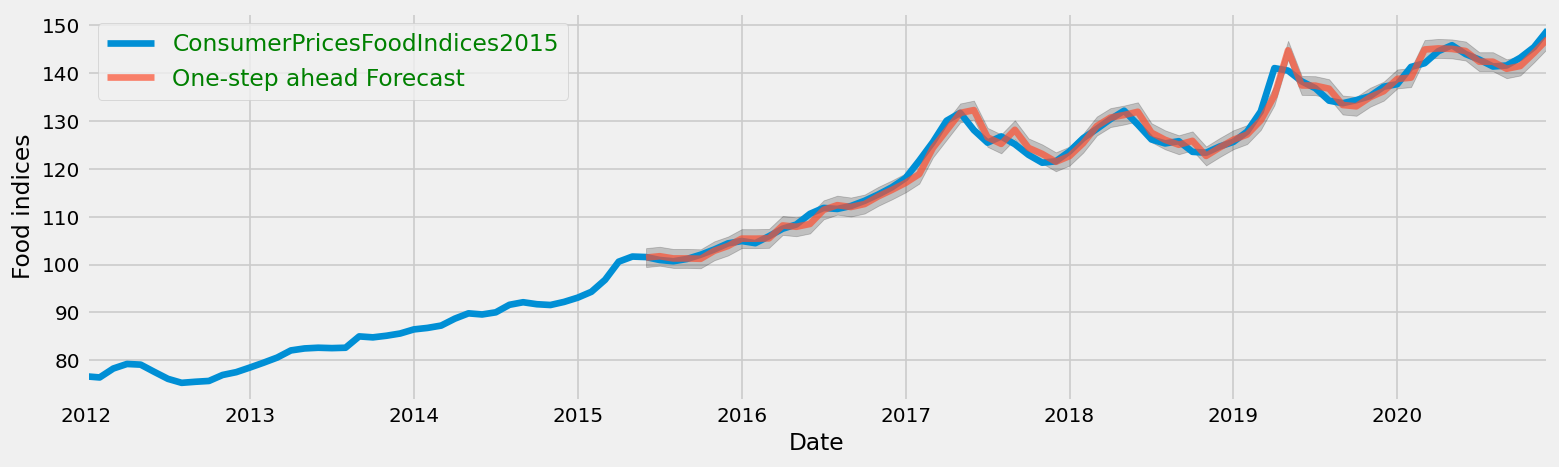

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2015-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = cfi['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Food indices')
plt.legend()
plt.show()

In [ ]:
cfi_forecasted = pred.predicted_mean
cfi_truth = cfi['2018-06-01':]
mse = ((cfi_forecasted - cfi_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2015-06-01 00:00:00             NaN
2015-07-01 00:00:00             NaN
2015-08-01 00:00:00             NaN
2015-09-01 00:00:00             NaN
2015-10-01 00:00:00             NaN
                                 ..
2020-09-01 00:00:00             NaN
2020-10-01 00:00:00             NaN
2020-11-01 00:00:00             NaN
2020-12-01 00:00:00             NaN
ConsumerPricesFoodIndices2015   NaN
Length: 68, dtype: float64
The Root Mean Squared Error is 2015-06-01 00:00:00             NaN
2015-07-01 00:00:00             NaN
2015-08-01 00:00:00             NaN
2015-09-01 00:00:00             NaN
2015-10-01 00:00:00             NaN
                                 ..
2020-09-01 00:00:00             NaN
2020-10-01 00:00:00             NaN
2020-11-01 00:00:00             NaN
2020-12-01 00:00:00             NaN
ConsumerPricesFoodIndices2015   NaN
Length: 68, dtype: float64


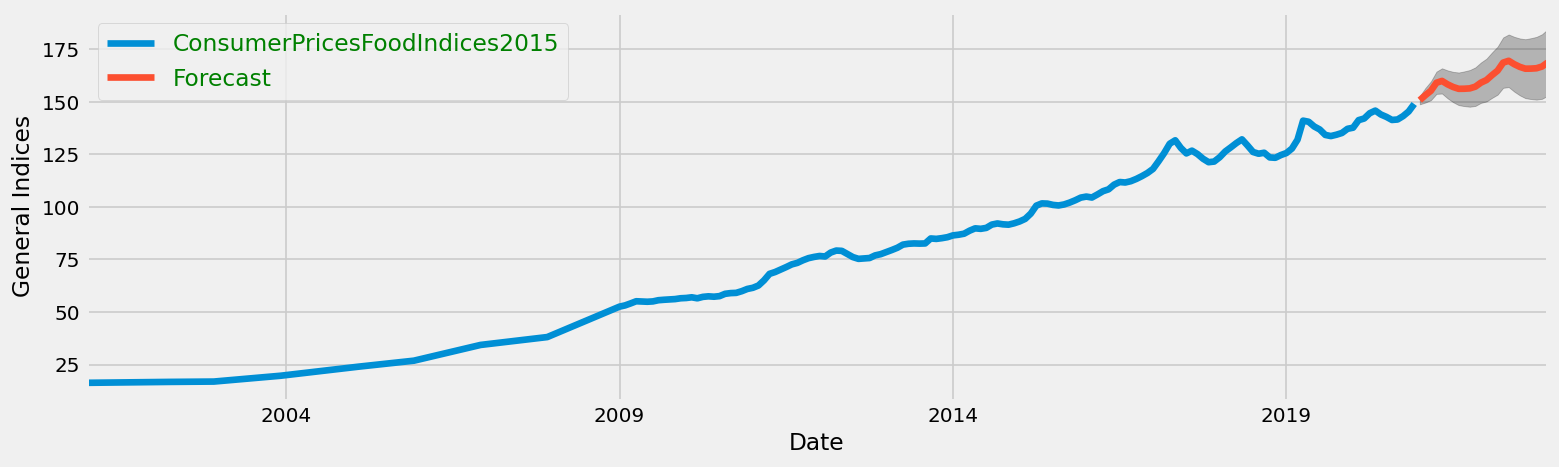

In [ ]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = cfi.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('General Indices')
plt.legend()
plt.show()

In [ ]:
cfi_forecasted = pred.predicted_mean
cfi_forecasted.head(60)

cfi_truth.tail(12)

pred_ci.head(24)

lower ConsumerPricesFoodIndices2015  upper ConsumerPricesFoodIndices2015
2021-01-01                           148.816215                           152.773323
2021-02-01                           149.670654                           156.583277
2021-03-01                           150.795754                           159.734992
2021-04-01                           153.790301                           164.374988
2021-05-01                           153.952200                           165.958915
2021-06-01                           151.687804                           164.965108
2021-07-01                           149.841357                           164.277854
2021-08-01                           148.445764                           163.955053
2021-09-01                           147.980493                           164.493024
2021-10-01                           147.680136                           165.138351
2021-11-01                           148.047108                           166.402350
2021-12-01                           149.511337                           168.721764
2022-01-01                           150.179840                           170.554602
2022-02-01                           151.882334                           173.516501
2022-03-01                           153.425732                           176.249918
2022-04-01                           156.677517                           180.632676
2022-05-01                           157.010463                           182.045556
2022-06-01                           154.863743                           180.934073
2022-07-01                           153.099058                           180.165057
2022-08-01                           151.759701                           179.786020
2022-09-01                           151.331808                           180.286613
2022-10-01                           151.054481                           180.908910
2022-11-01                           151.433318                           182.161045
2022-12-01                           152.900562                           184.477443

In [ ]:
cfi_forecasted = pred.predicted_mean
cfi_forecasted.head(60)

2015-06-01    101.469776
2015-07-01    101.754742
2015-08-01    101.289921
2015-09-01    101.299243
2015-10-01    101.221658
2015-11-01    102.893405
2015-12-01    103.889575
2016-01-01    105.432985
2016-02-01    105.423337
2016-03-01    105.486263
2016-04-01    108.179116
2016-05-01    107.909893
2016-06-01    108.496256
2016-07-01    111.444610
2016-08-01    112.422297
2016-09-01    112.036724
2016-10-01    112.657374
2016-11-01    114.260946
2016-12-01    115.616447
2017-01-01    117.077893
2017-02-01    118.909774
2017-03-01    124.369473
2017-04-01    128.035618
2017-05-01    131.686877
2017-06-01    132.280834
2017-07-01    126.585064
2017-08-01    125.229393
2017-09-01    128.165703
2017-10-01    124.388064
2017-11-01    123.131426
2017-12-01    121.486541
2018-01-01    122.672413
2018-02-01    125.373957
2018-03-01    128.953717
2018-04-01    130.719129
2018-05-01    131.255331
2018-06-01    131.932604
2018-07-01    127.562900
2018-08-01    126.067258
2018-09-01    125.044203


In [ ]:
cfi_truth.tail(12)

ConsumerPricesFoodIndices2015
Year                                     
2020-01-01                     137.704488
2020-02-01                     141.298575
2020-03-01                     142.075718
2020-04-01                     144.590458
2020-05-01                     145.833936
2020-06-01                     143.981845
2020-07-01                     142.829990
2020-08-01                     141.387407
2020-09-01                     141.599488
2020-10-01                     143.213722
2020-11-01                     145.419214
2020-12-01                     148.981984

In [ ]:
pred_ci.head(24)

lower ConsumerPricesFoodIndices2015  upper ConsumerPricesFoodIndices2015
2021-01-01                           148.816215                           152.773323
2021-02-01                           149.670654                           156.583277
2021-03-01                           150.795754                           159.734992
2021-04-01                           153.790301                           164.374988
2021-05-01                           153.952200                           165.958915
2021-06-01                           151.687804                           164.965108
2021-07-01                           149.841357                           164.277854
2021-08-01                           148.445764                           163.955053
2021-09-01                           147.980493                           164.493024
2021-10-01                           147.680136                           165.138351
2021-11-01                           148.047108                           166.402350
2021-12-01                           149.511337                           168.721764
2022-01-01                           150.179840                           170.554602
2022-02-01                           151.882334                           173.516501
2022-03-01                           153.425732                           176.249918
2022-04-01                           156.677517                           180.632676
2022-05-01                           157.010463                           182.045556
2022-06-01                           154.863743                           180.934073
2022-07-01                           153.099058                           180.165057
2022-08-01                           151.759701                           179.786020
2022-09-01                           151.331808                           180.286613
2022-10-01                           151.054481                           180.908910
2022-11-01                           151.433318                           182.161045
2022-12-01                           152.900562                           184.477443

#### CPI General Indices

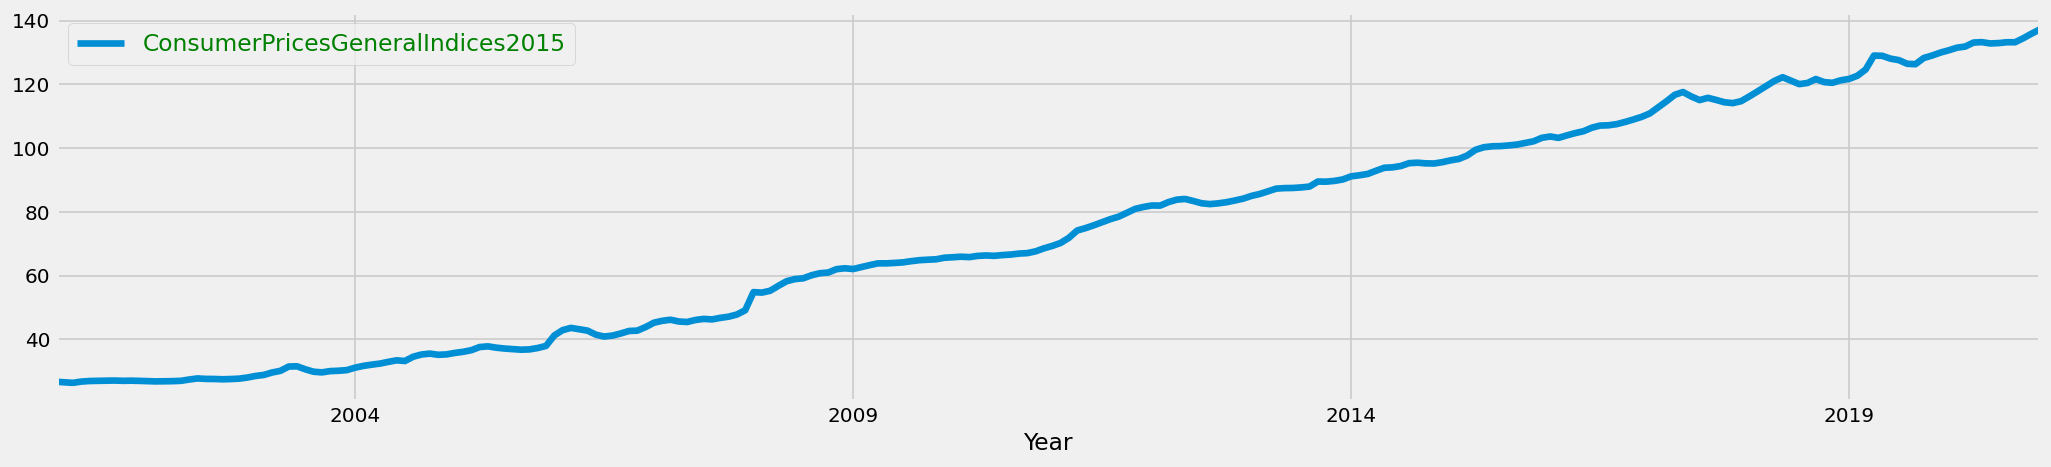

In [ ]:
cgi.plot(figsize=(19, 4))
plt.show()

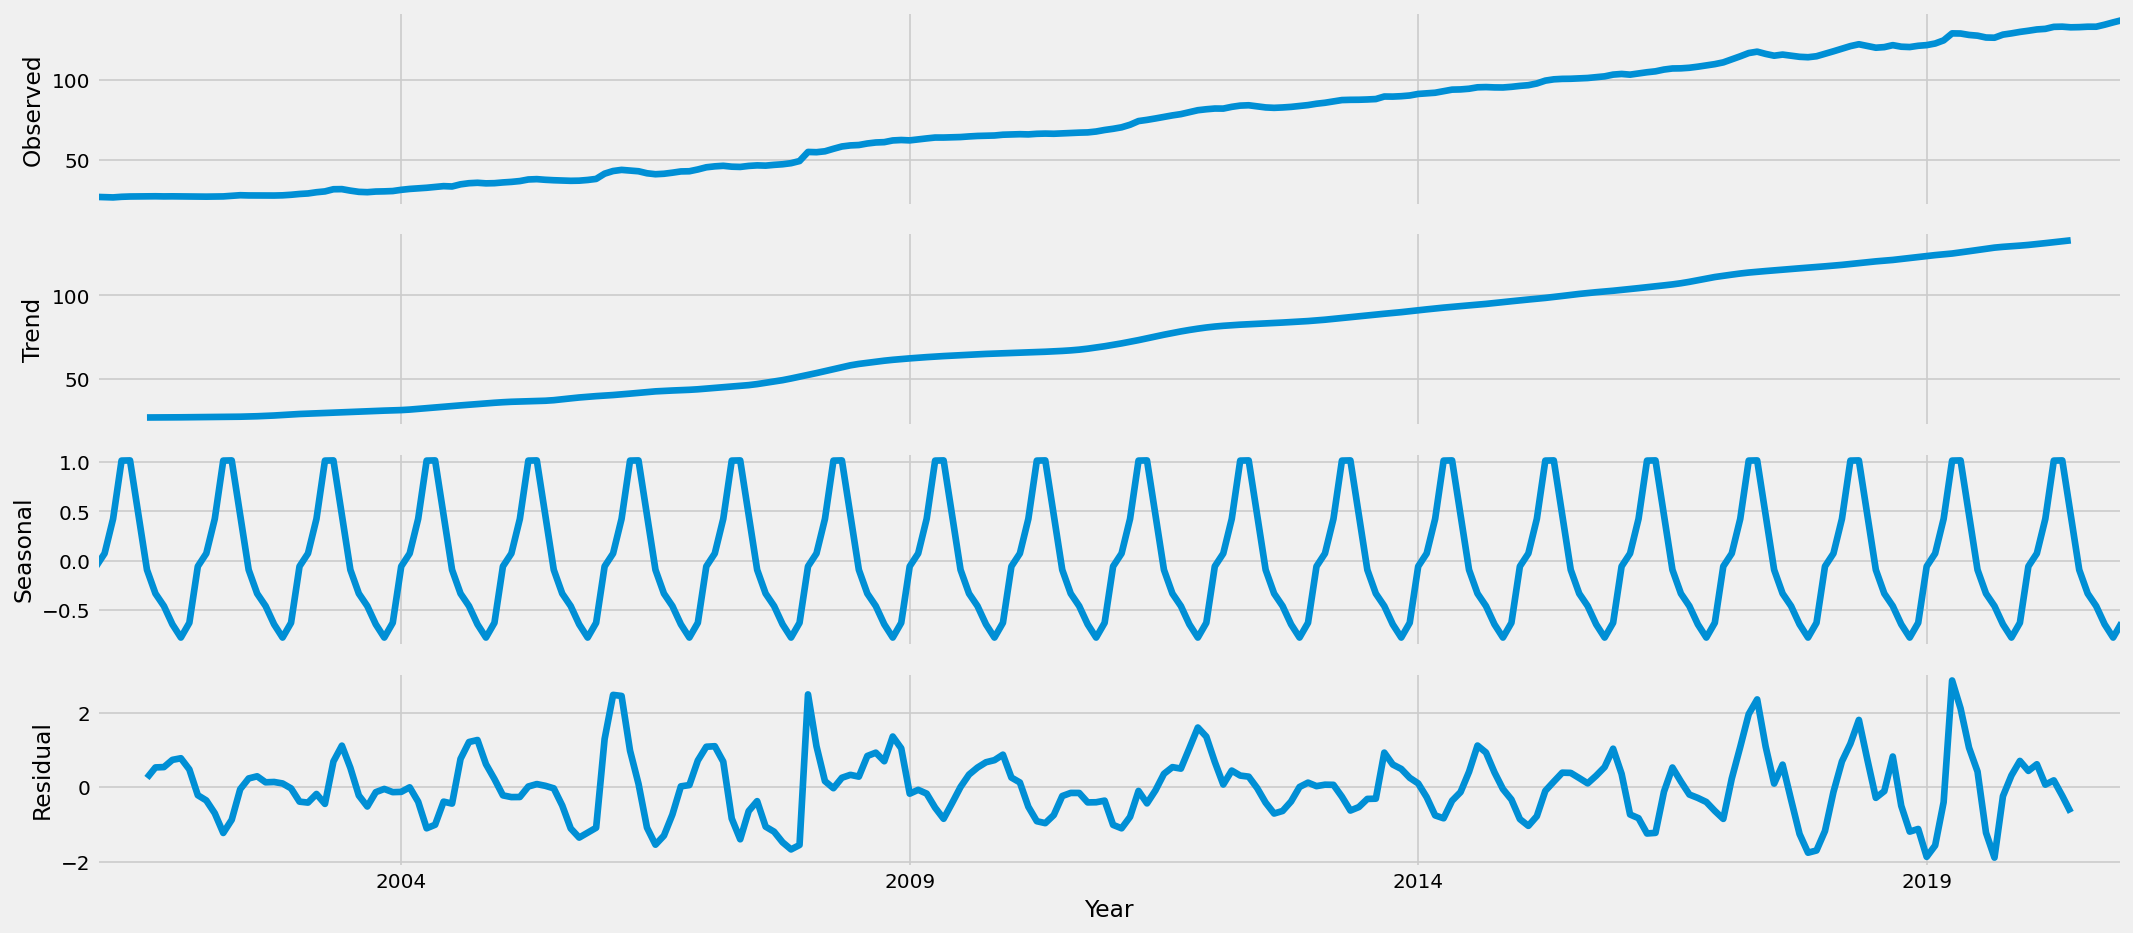

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(cgi, model='additive')
fig = decomposition.plot()
plt.savefig('CPGI Trend.png', bbox_inches = 'tight')
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(cgi,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2784.6618488094755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2394.9132284469165
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1488.5936989480874
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1320.8655679959713
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1184.002740334306
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1181.4466853856895
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1236.8916454616415
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1117.2957008608323
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2453.3053749713463
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2080.2832628077977
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1193.8730117792925
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1065.2363363130955
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:933.6549678194393
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:928.5310042504268
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1003.8007581914108
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:885.5026322394176
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:635.4158561309907
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:588.432911712470

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:480.5832182102545

In [ ]:
mod = sm.tsa.statespace.SARIMAX(cgi,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3342      0.044      7.638      0.000       0.248       0.420
ma.S.L12      -0.8534      0.044    -19.271      0.000      -0.940      -0.767
sigma2         0.5215      0.024     21.653      0.000       0.474       0.569


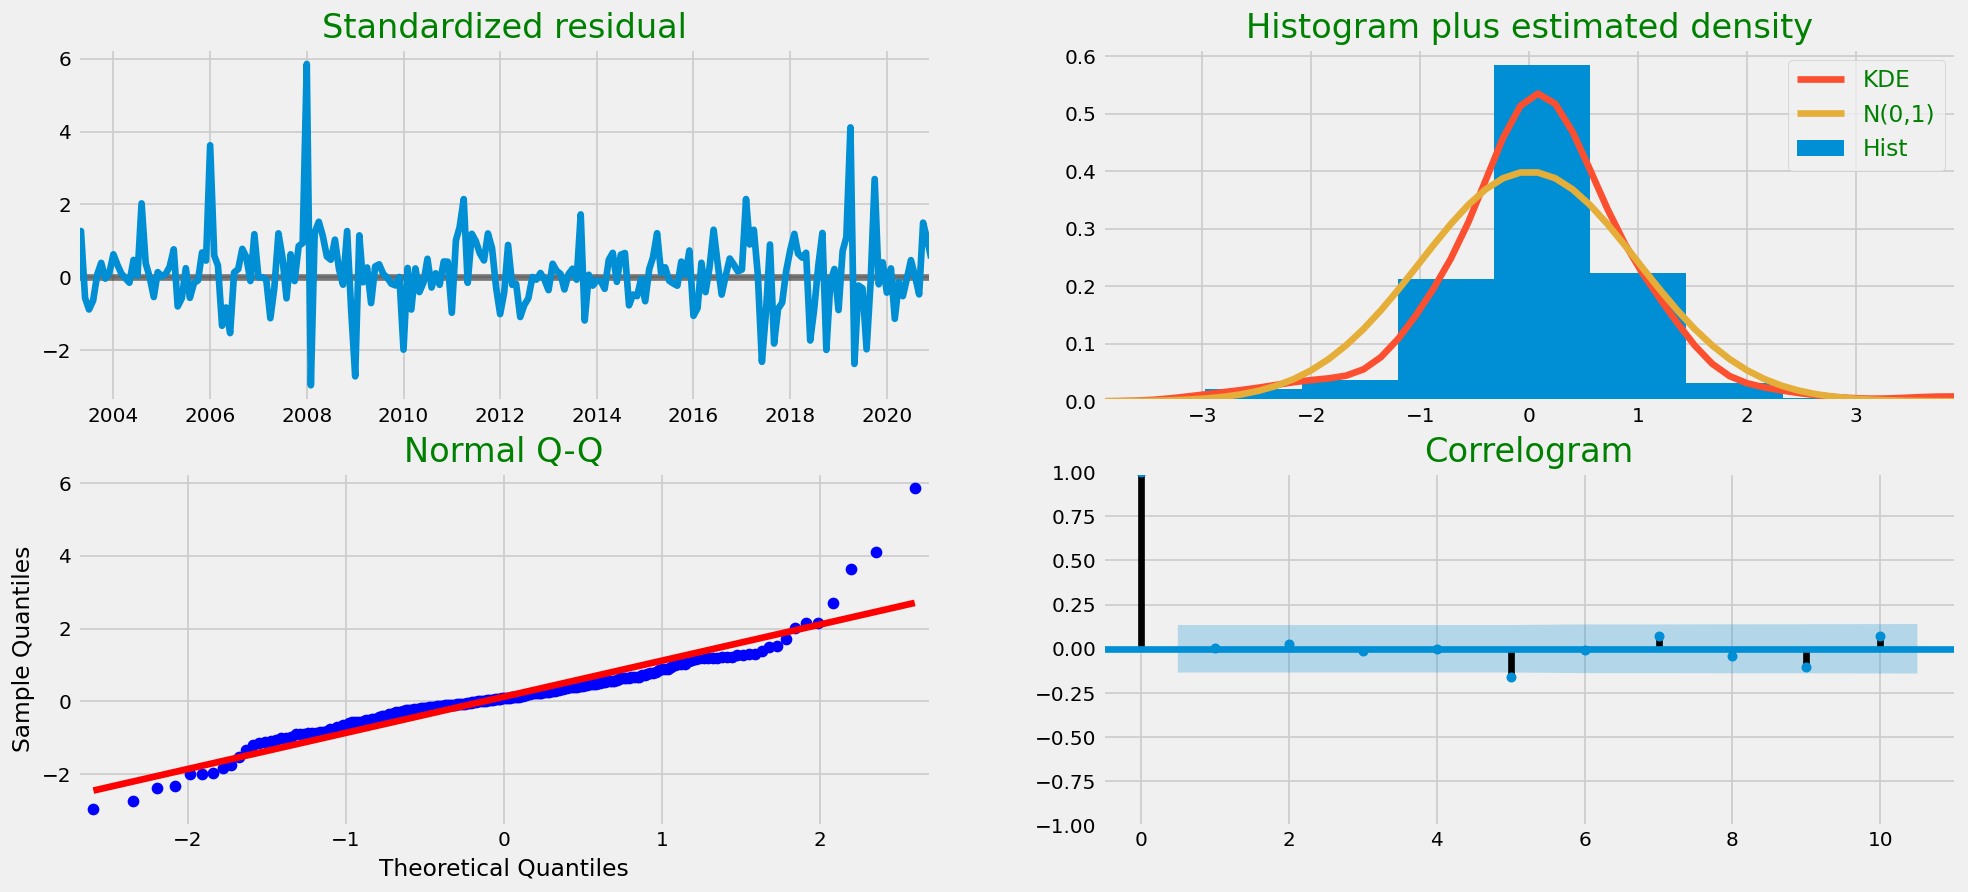

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

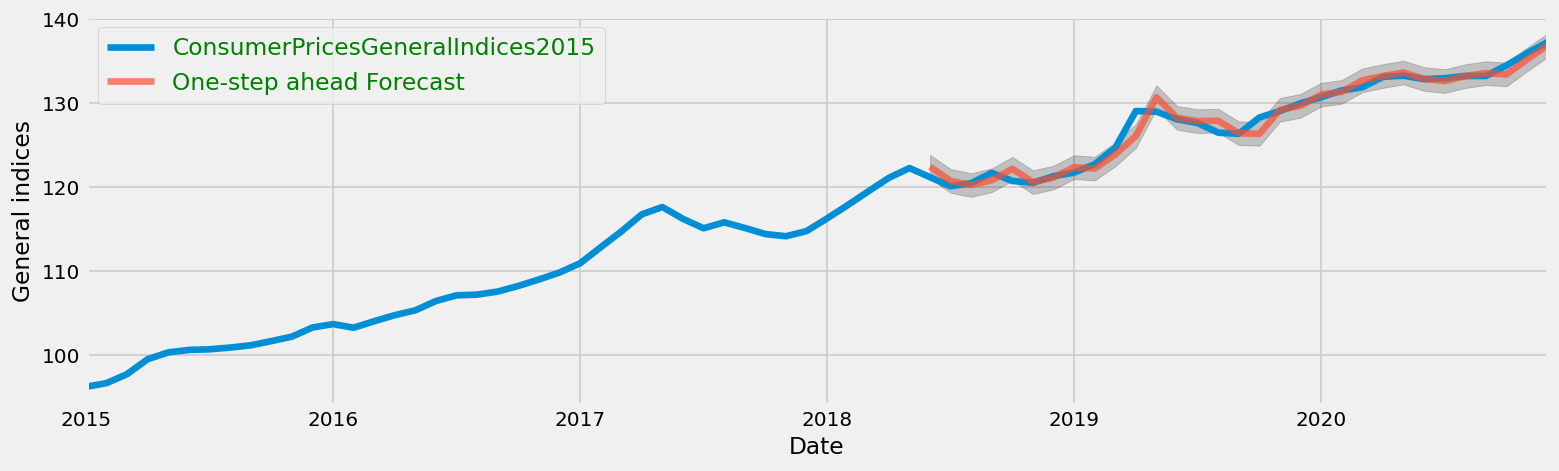

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = cgi['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('General indices')
plt.legend()
plt.show()

In [ ]:
cgi_forecasted = pred.predicted_mean
cgi_truth = cgi['2018-06-01':]
mse = ((cgi_forecasted - cgi_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2018-06-01 00:00:00                NaN
2018-07-01 00:00:00                NaN
2018-08-01 00:00:00                NaN
2018-09-01 00:00:00                NaN
2018-10-01 00:00:00                NaN
2018-11-01 00:00:00                NaN
2018-12-01 00:00:00                NaN
2019-01-01 00:00:00                NaN
2019-02-01 00:00:00                NaN
2019-03-01 00:00:00                NaN
2019-04-01 00:00:00                NaN
2019-05-01 00:00:00                NaN
2019-06-01 00:00:00                NaN
2019-07-01 00:00:00                NaN
2019-08-01 00:00:00                NaN
2019-09-01 00:00:00                NaN
2019-10-01 00:00:00                NaN
2019-11-01 00:00:00                NaN
2019-12-01 00:00:00                NaN
2020-01-01 00:00:00                NaN
2020-02-01 00:00:00                NaN
2020-03-01 00:00:00                NaN
2020-04-01 00:00:00                NaN
2020-05-01 00:00:00                NaN
2020-06-01 00:00:00                NaN

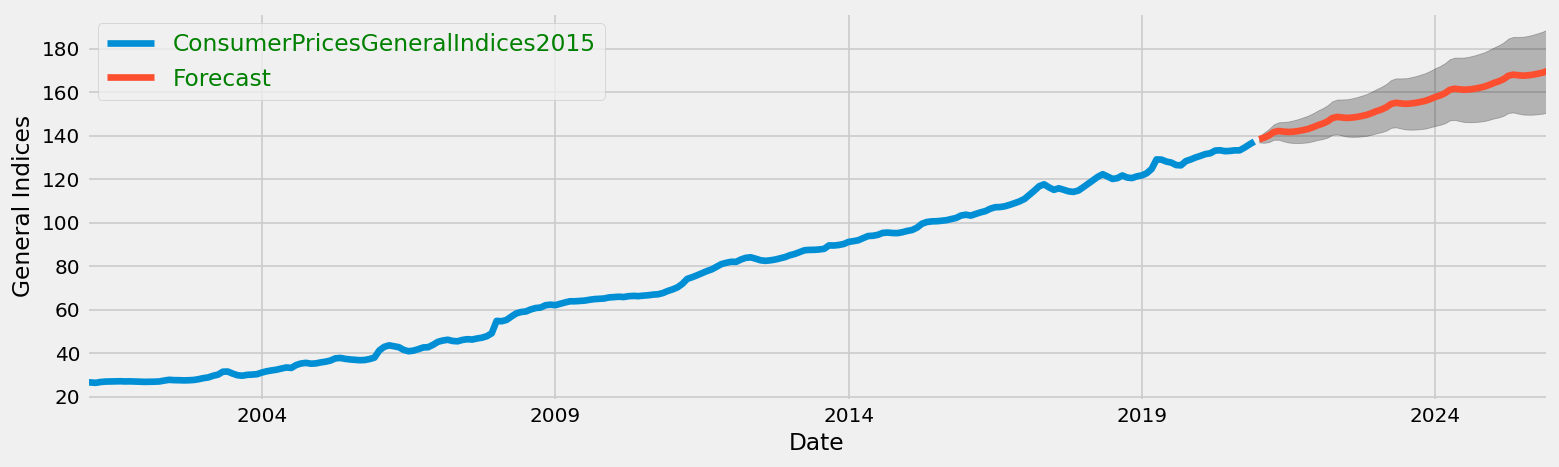

In [ ]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = cgi.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('General Indices')
plt.legend()
plt.show()

In [ ]:
cgi_forecasted = pred.predicted_mean
cgi_forecasted.head(12)

2018-06-01    122.409759
2018-07-01    120.705963
2018-08-01    120.214072
2018-09-01    120.789610
2018-10-01    122.146511
2018-11-01    120.565339
2018-12-01    121.110909
2019-01-01    122.349253
2019-02-01    122.176860
2019-03-01    123.867300
2019-04-01    126.066466
2019-05-01    130.680495
Freq: MS, dtype: float64

In [ ]:
cgi_truth.tail(12)

ConsumerPricesGeneralIndices2015
Year                                        
2020-01-01                        130.684548
2020-02-01                        131.499256
2020-03-01                        131.868574
2020-04-01                        133.120083
2020-05-01                        133.251369
2020-06-01                        132.839107
2020-07-01                        132.947080
2020-08-01                        133.215787
2020-09-01                        133.213333
2020-10-01                        134.480792
2020-11-01                        135.922482
2020-12-01                        137.256198

In [ ]:
pred_ci.head(24)

lower ConsumerPricesGeneralIndices2015  upper ConsumerPricesGeneralIndices2015
2021-01-01                              136.868656                              139.700379
2021-02-01                              136.678622                              141.400178
2021-03-01                              137.041474                              143.088384
2021-04-01                              138.066143                              145.196161
2021-05-01                              138.076644                              146.145670
2021-06-01                              137.371253                              146.280867
2021-07-01                              136.813930                              146.491390
2021-08-01                              136.614793                              147.003502
2021-09-01                              136.566194                              147.620483
2021-10-01                              136.694784                              148.376793
2021-11-01                              136.898312                              149.175990
2021-12-01                              137.416514                              150.262268
2022-01-01                              138.004044                              151.517300
2022-02-01                              138.419969                              152.611139
2022-03-01                              139.122115                              153.960050
2022-04-01                              140.378475                              155.836137
2022-05-01                              140.560570                              156.614052
2022-06-01                              139.988231                              156.616197
2022-07-01                              139.537186                              156.720442
2022-08-01                              139.424725                              157.145878
2022-09-01                              139.447894                              157.691091
2022-10-01                              139.636585                              158.387299
2022-11-01                              139.890880                              159.135730
2022-12-01                              140.452239                              160.178851

#### Food price inflation

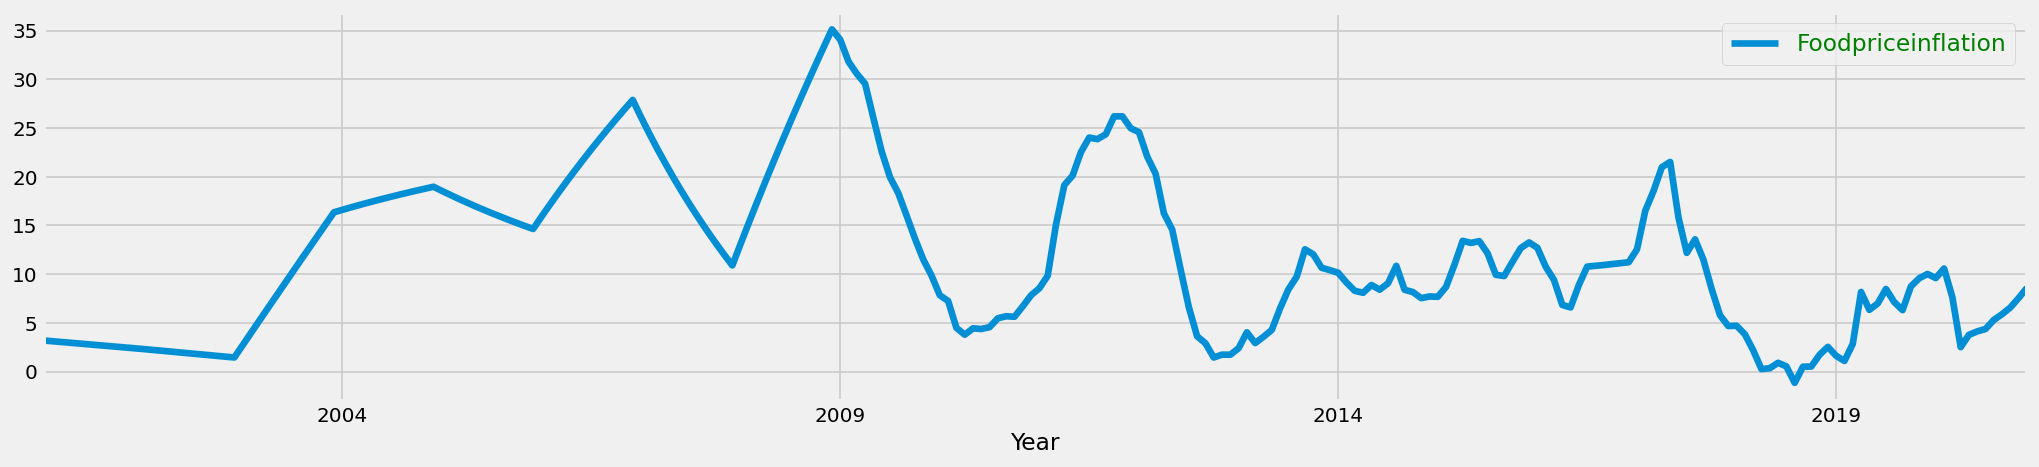

In [ ]:
fpi.plot(figsize=(19, 4))
plt.show()

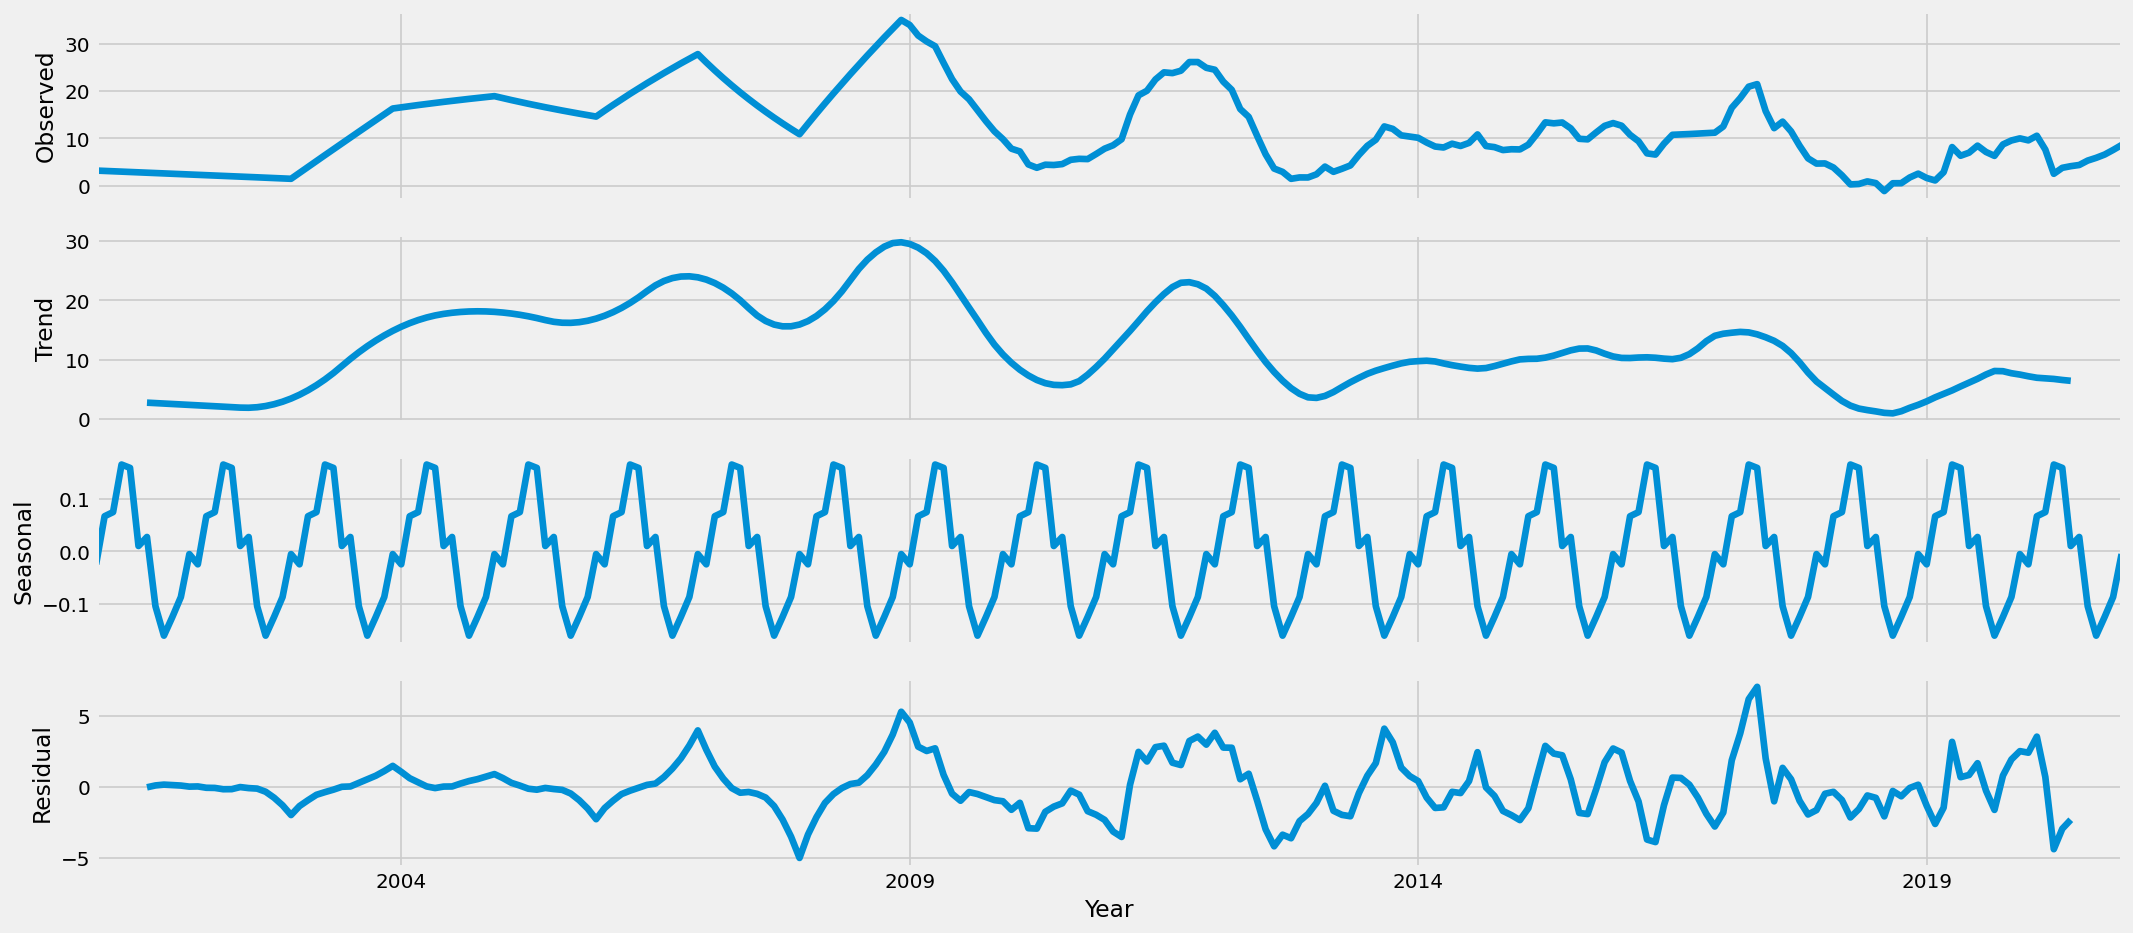

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fpi, model='additive')
fig = decomposition.plot()
plt.savefig('FPI Trend.png', bbox_inches = 'tight')
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))




Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(fpi,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
          continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1954.164094294103
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1785.367779572359
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1715.3299379400091
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1545.824436391431
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1693.58584081137
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1692.0591259442758
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1550.7895767361529
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1532.8572200403755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1630.0847716176522
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1480.8434545324917
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1418.5961644763754
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1266.1061294549174
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1400.4223839132526
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1328.592103385929
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1278.7765251285887
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1256.822119028667
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:899.2745600755761
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:757.6314112853099
A

ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:671.6733238387856

The AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. The low AIC value the better.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(fpi,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6388      0.090      7.063      0.000       0.462       0.816
ma.L1         -0.1232      0.105     -1.168      0.243      -0.330       0.084
ar.S.L12      -0.1805      0.078     -2.303      0.021      -0.334      -0.027
ma.S.L12      -0.6652      0.090     -7.382      0.000      -0.842      -0.489
sigma2         1.0761      0.072     14.961      0.000       0.935       1.217


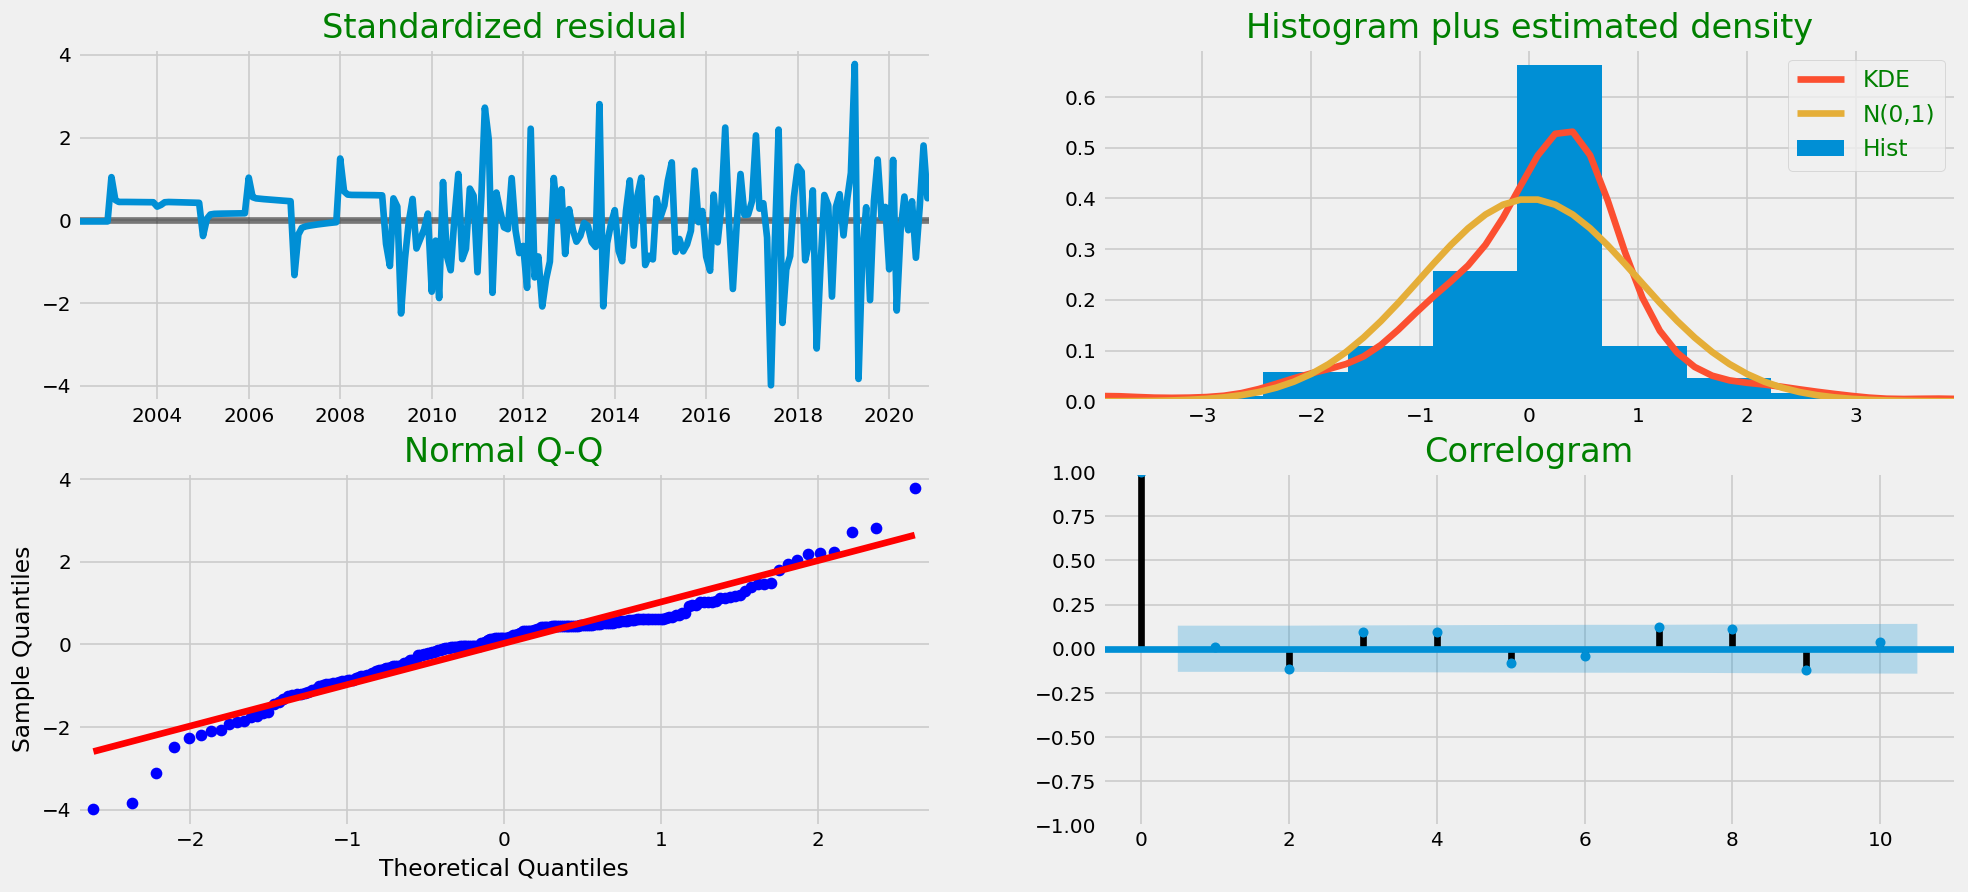

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

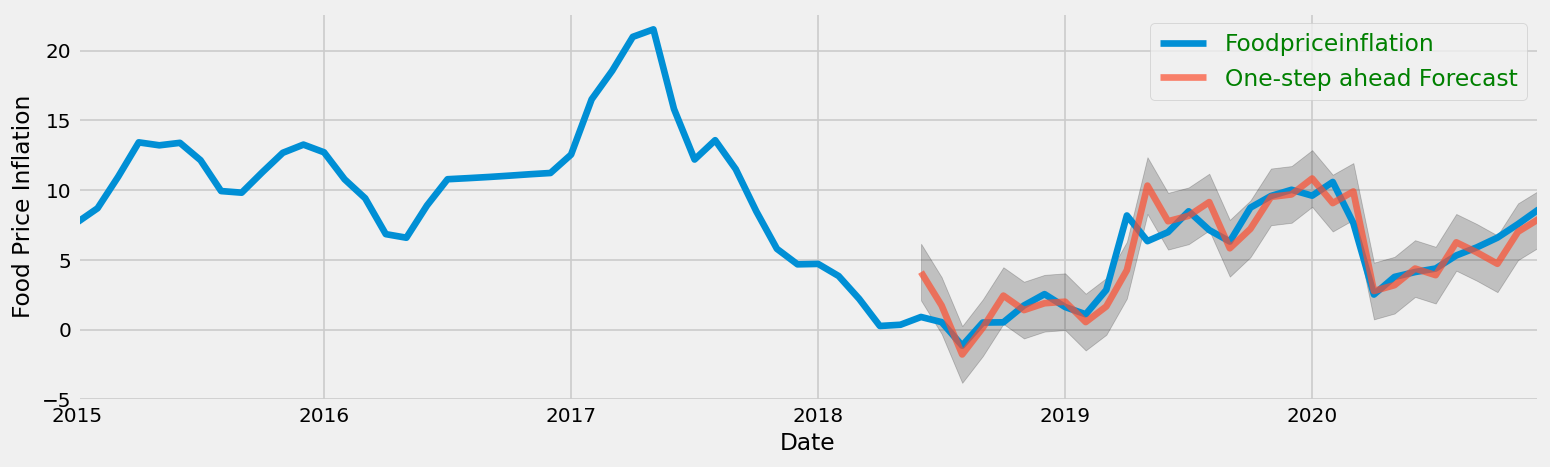

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = fpi['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Food Price Inflation')
plt.legend()
plt.show()

In [ ]:
fpi_forecasted = pred.predicted_mean
fpi_truth = fpi['2018-06-01':]
mse = ((fpi_forecasted - fpi_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-08-01 00:00:00   NaN
2019-09-01 00:00:00   NaN
2019-10-01 00:00:00   NaN
2019-11-01 00:00:00   NaN
2019-12-01 00:00:00   NaN
2020-01-01 00:00:00   NaN
2020-02-01 00:00:00   NaN
2020-03-01 00:00:00   NaN
2020-04-01 00:00:00   NaN
2020-05-01 00:00:00   NaN
2020-06-01 00:00:00   NaN
2020-07-01 00:00:00   NaN
2020-08-01 00:00:00   NaN
2020-09-01 00:00:00   NaN
2020-10-01 00:00:00   NaN
2020-11-01 00:00:00   NaN
2020-12-01 00:00:00   NaN
Foodpriceinflation    NaN
dtype: float64
The Root Mean Squared Error is 2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:0

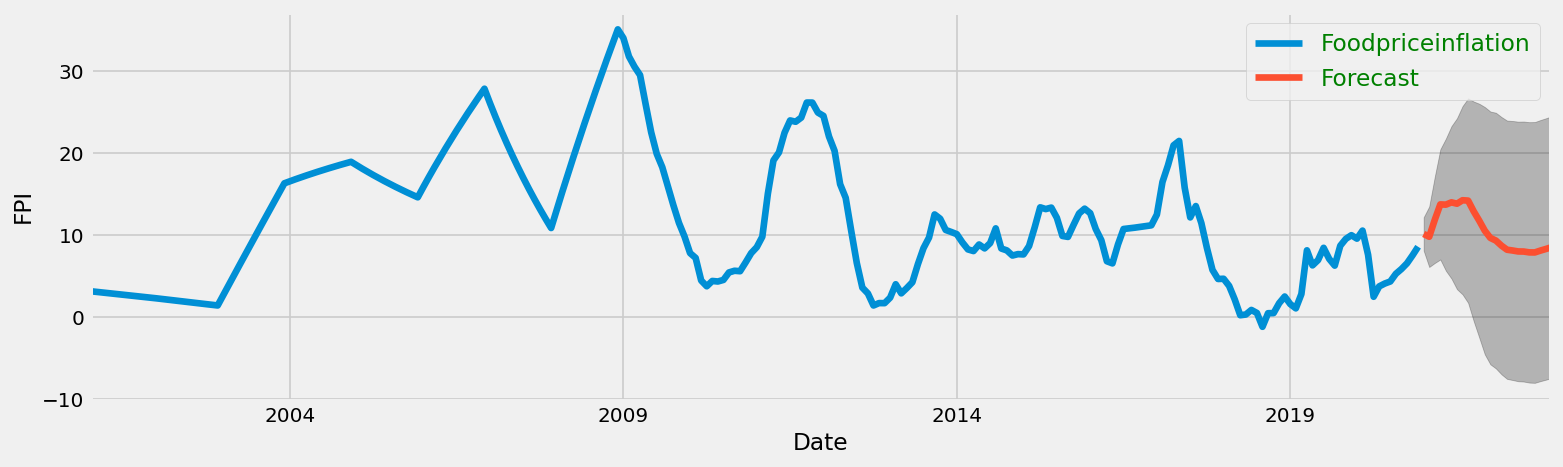

In [ ]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = fpi.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('FPI')
plt.legend()
plt.show()

In [ ]:
fpi_forecasted = pred.predicted_mean
fpi_forecasted.head(12)

2018-06-01     4.117882
2018-07-01     1.722826
2018-08-01    -1.787142
2018-09-01     0.124051
2018-10-01     2.432833
2018-11-01     1.393990
2018-12-01     1.886147
2019-01-01     1.995861
2019-02-01     0.535444
2019-03-01     1.657656
2019-04-01     4.256470
2019-05-01    10.318338
Freq: MS, dtype: float64

In [ ]:
fpi_truth.tail(12)

Foodpriceinflation
Year                          
2020-01-01            9.598151
2020-02-01           10.578822
2020-03-01            7.635049
2020-04-01            2.508132
2020-05-01            3.773664
2020-06-01            4.121686
2020-07-01            4.374204
2020-08-01            5.310391
2020-09-01            5.891924
2020-10-01            6.587472
2020-11-01            7.562035
2020-12-01            8.611575

In [ ]:
pred_ci.head(24)

lower Foodpriceinflation  upper Foodpriceinflation
2021-01-01                  8.136590                 12.202946
2021-02-01                  6.140226                 13.523726
2021-03-01                  6.628545                 17.154596
2021-04-01                  7.056550                 20.497080
2021-05-01                  5.685277                 21.807674
2021-06-01                  4.731097                 23.320194
2021-07-01                  3.429804                 24.294951
2021-08-01                  2.796009                 25.771531
2021-09-01                  1.768276                 26.711287
2021-10-01                 -0.457631                 26.329779
2021-11-01                 -2.468217                 26.057276
2021-12-01                 -4.513988                 25.657323
2022-01-01                 -5.734637                 25.109051
2022-02-01                 -6.232723                 24.958292
2022-03-01                 -6.949304                 24.439191
2022-04-01                 -7.508899                 24.003868
2022-05-01                 -7.647124                 23.952123
2022-06-01                 -7.794649                 23.870546
2022-07-01                 -7.833327                 23.886158
2022-08-01                 -7.959269                 23.807642
2022-09-01                 -7.989697                 23.820488
2022-10-01                 -7.785478                 24.065412
2022-11-01                 -7.605856                 24.284126
2022-12-01                 -7.408581                 24.519466

### Labour

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
labor.head()

Year  labour_income_share_in_GDP
0 1991-01-01                     2465.88
1 1992-01-01                     2354.25
2 1993-01-01                     2274.52
3 1994-01-01                     2248.34
4 1995-01-01                     2263.08

In [ ]:
lbr = labor.set_index(['Year'])
lbr.head(5)

labour_income_share_in_GDP
Year                                  
1991-01-01                     2465.88
1992-01-01                     2354.25
1993-01-01                     2274.52
1994-01-01                     2248.34
1995-01-01                     2263.08

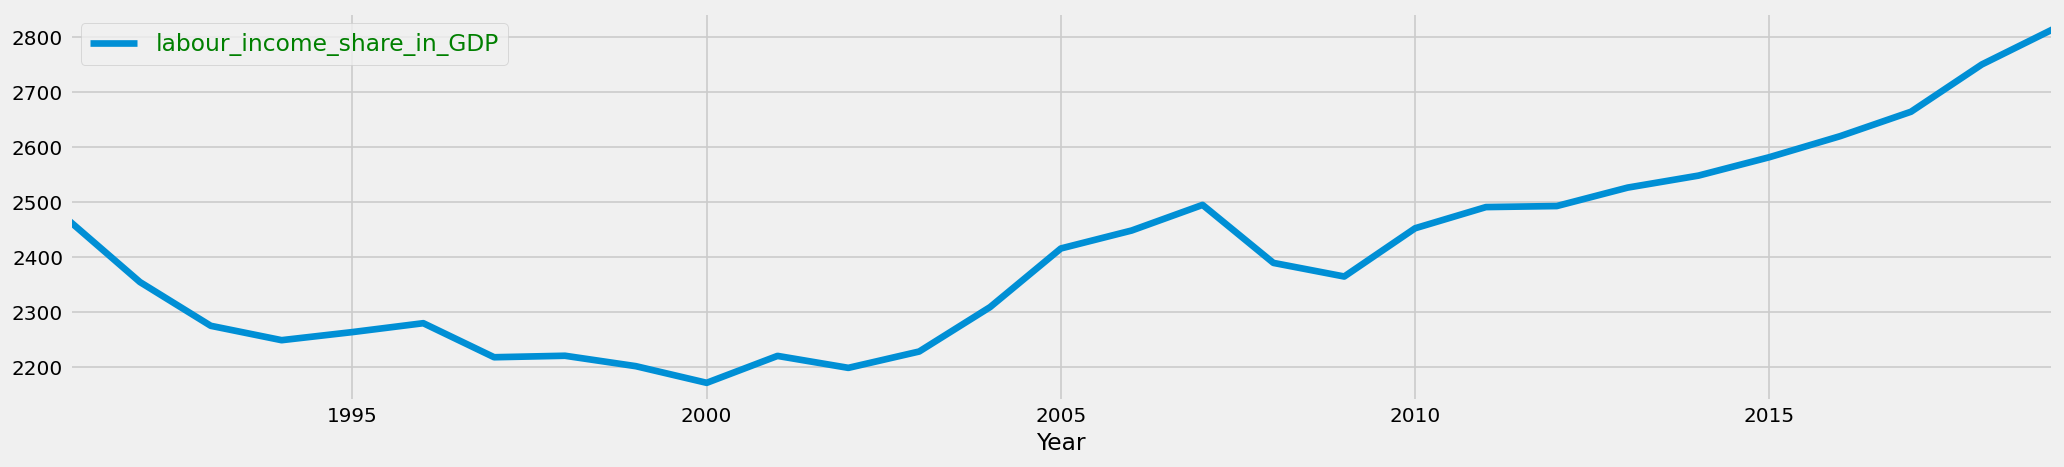

In [ ]:
lbr.plot(figsize=(19, 4))
plt.show()

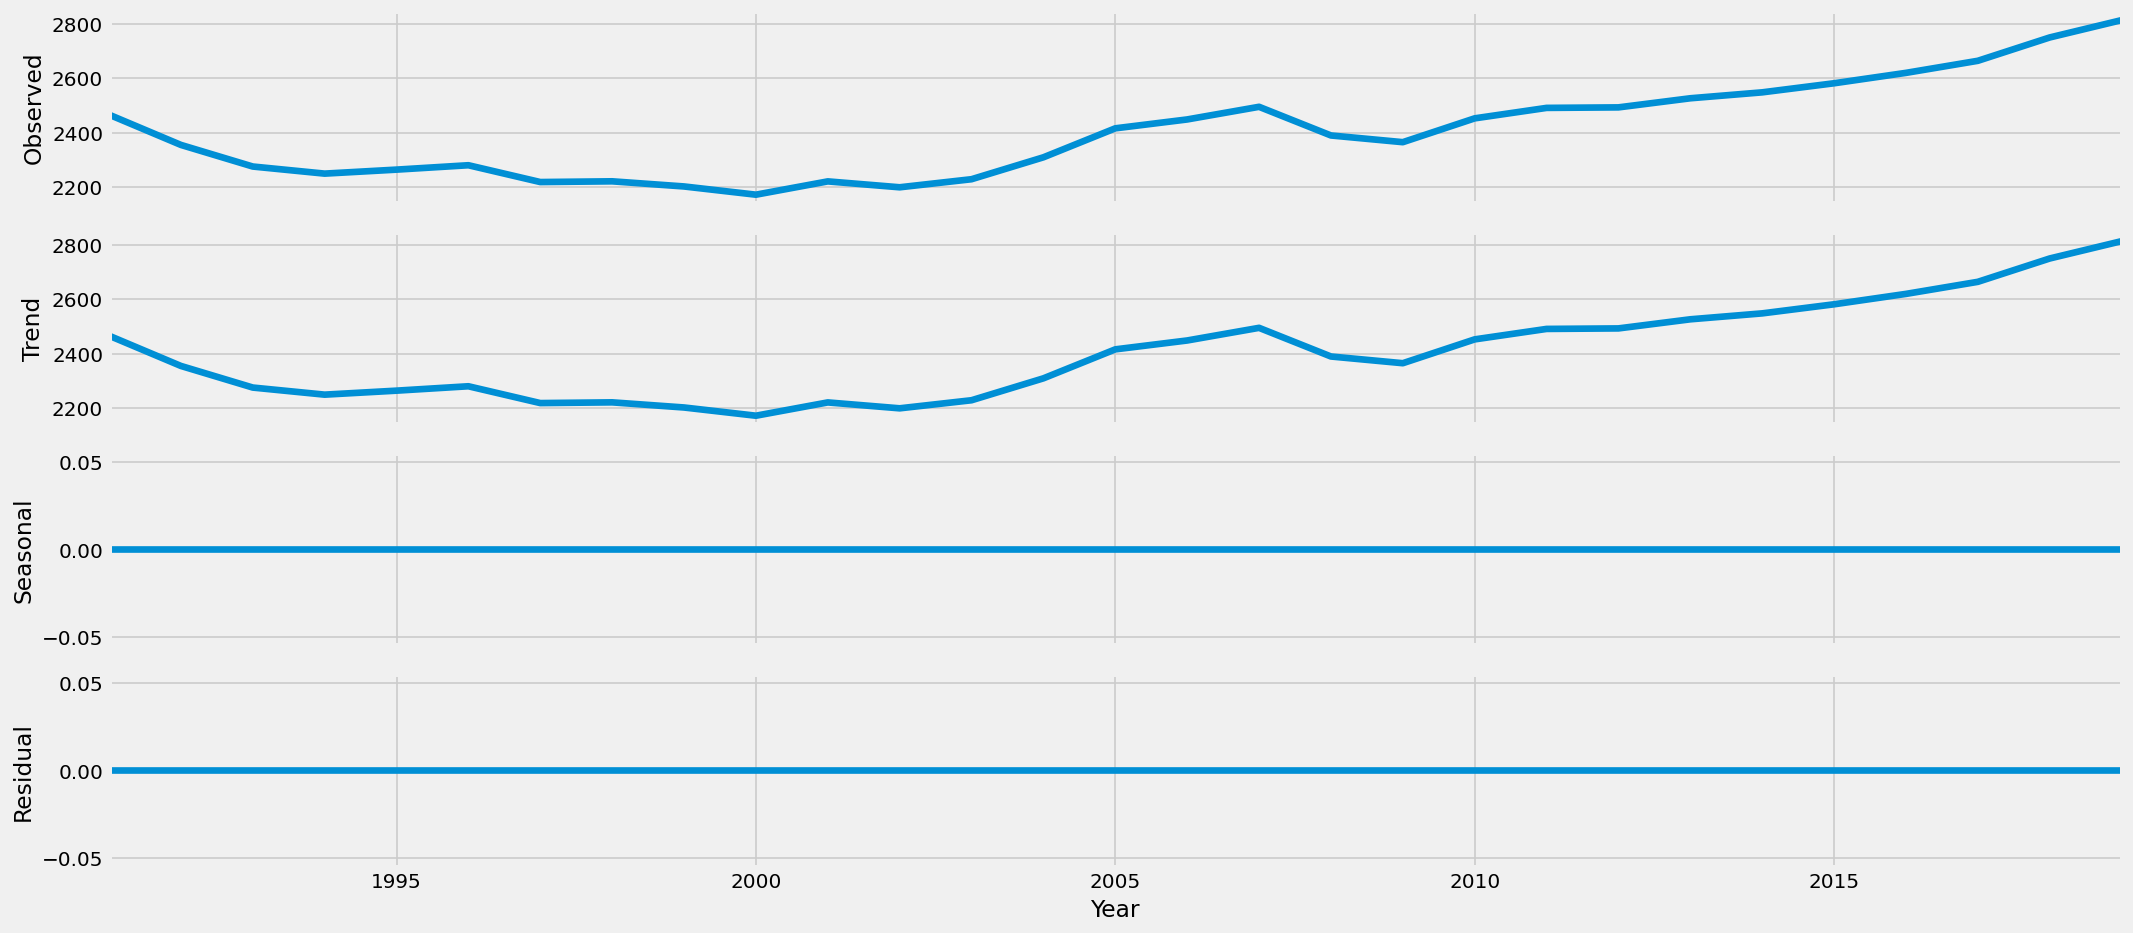

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(lbr, model='additive')
fig = decomposition.plot()
plt.savefig('Labor Trend.png', bbox_inches = 'tight')
plt.show()

### Female IMR

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
fem = pd.read_csv('fem_imr.csv', parse_dates=['Year'])

In [ ]:
fem = fem.drop(['Indicator'], axis = 1)
fem = fem.drop(['Unitofmeasure'], axis = 1)
fem = fem.drop(['Sex'], axis = 1)

In [ ]:
fm = fem.set_index(['Year'])
fm.head(5)

IMR
Year                  
1952-01-01  168.973466
1953-01-01  159.614436
1954-01-01  150.728491
1955-01-01  142.451016
1956-01-01  134.839606

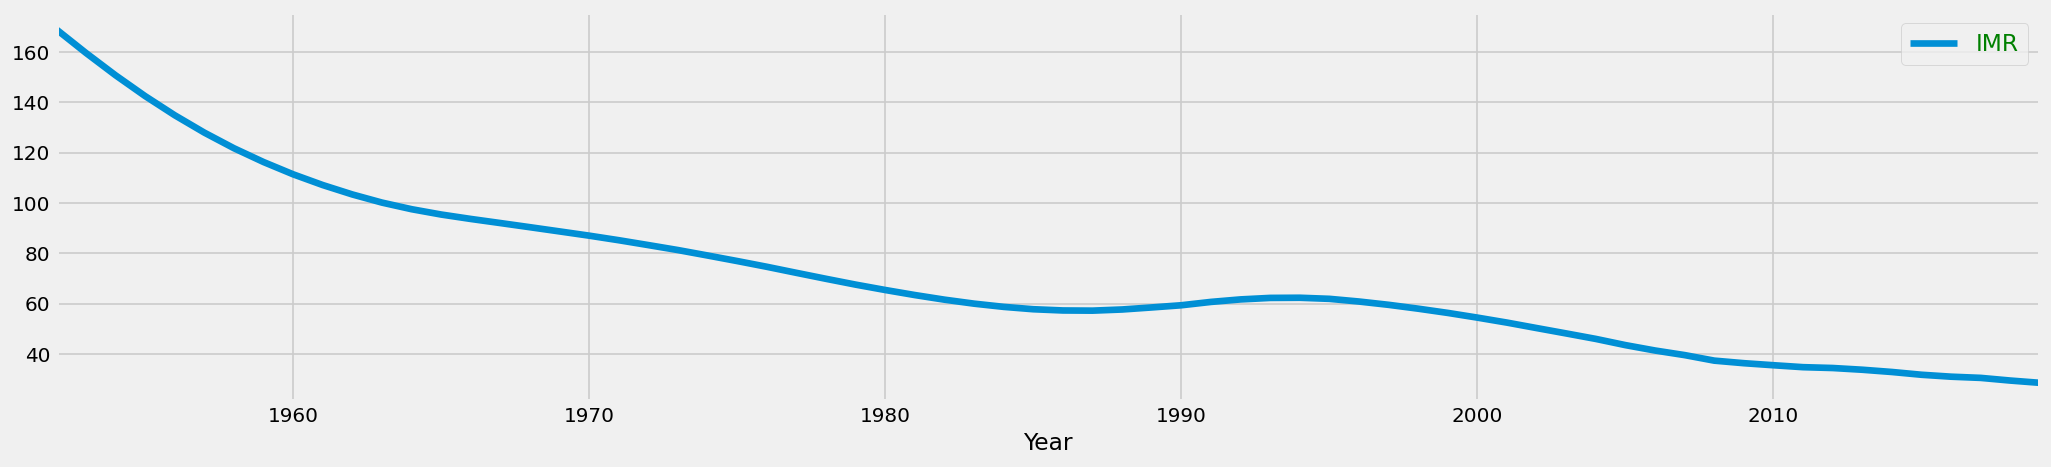

In [ ]:
fm.plot(figsize=(19, 4))
plt.savefig('fem imr.png', bbox_inches = 'tight')
plt.show()

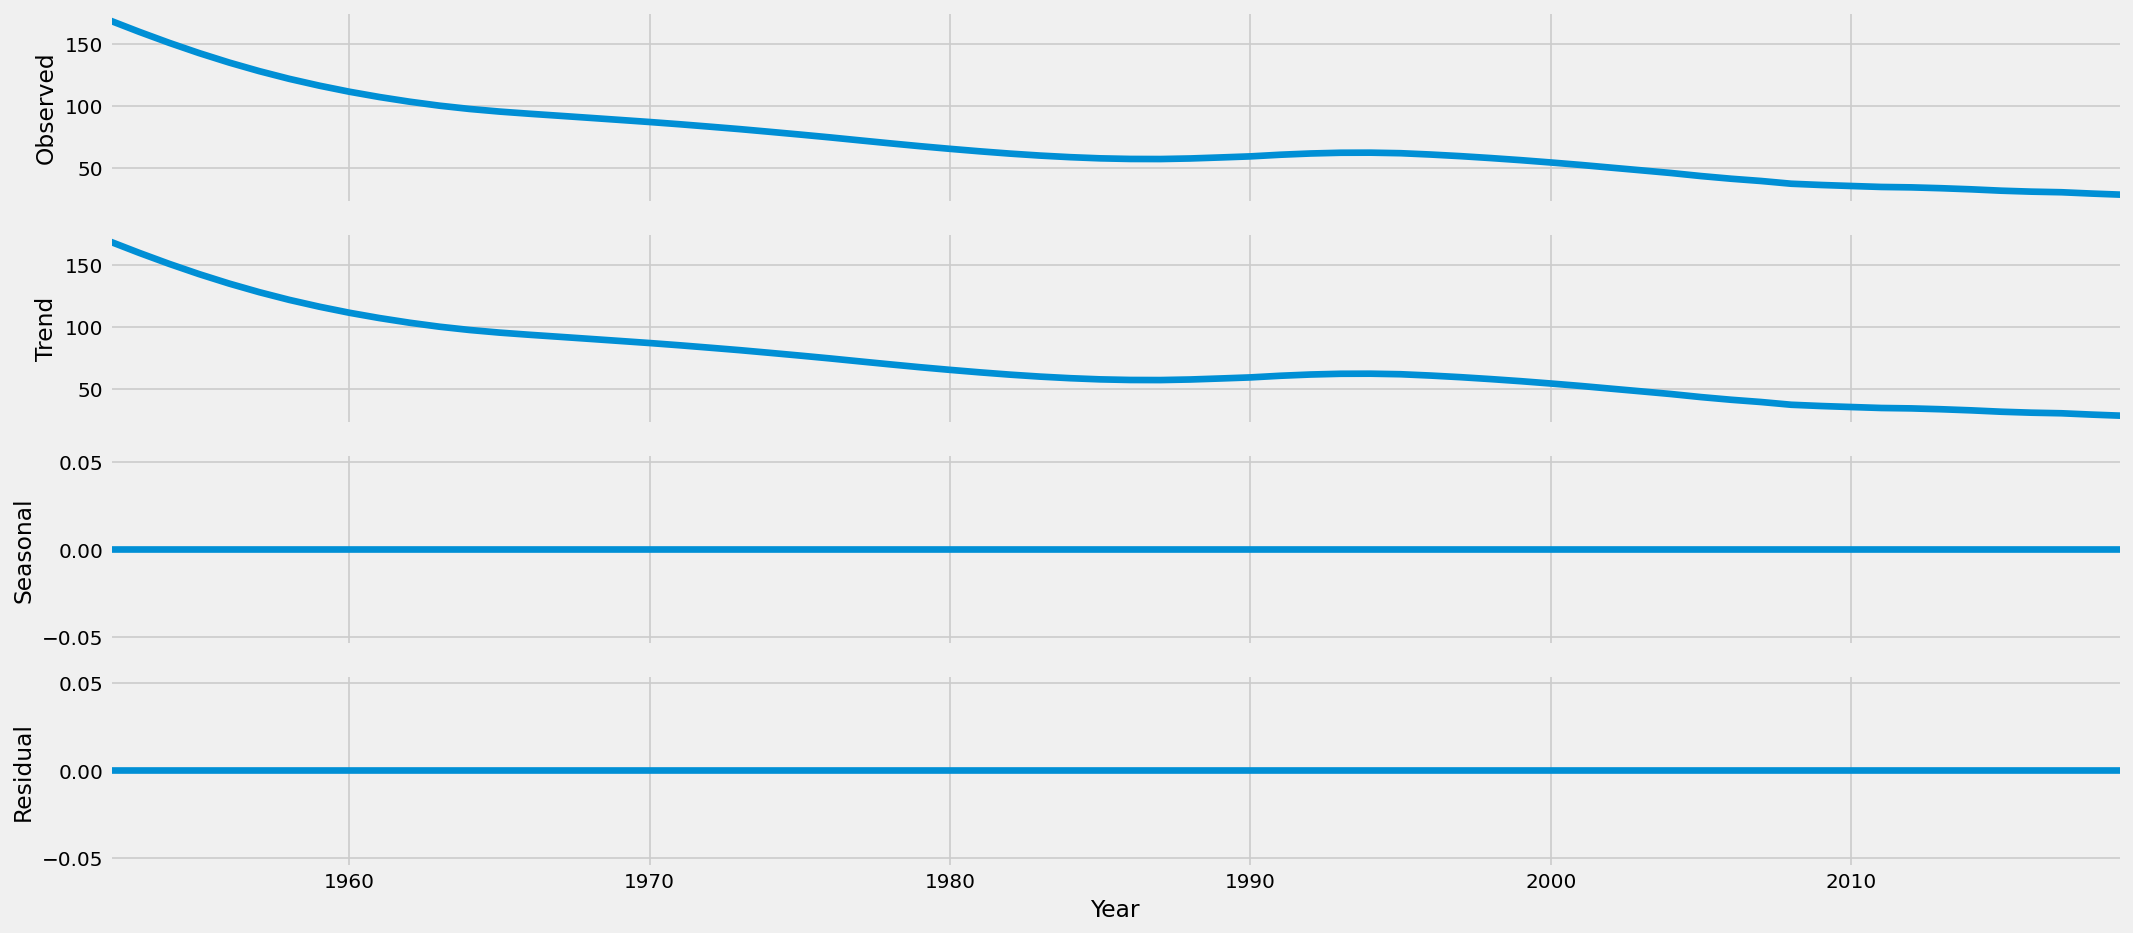

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fm, model='additive')
fig = decomposition.plot()
plt.savefig('fem imr Trend.png', bbox_inches = 'tight')
plt.show()

### Crops



1.   The dataset needs to be divided depending on the crop
2.   Further split the dataset by column.



In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
crop = pd.read_csv('/content/Annual Maize production 1961-2019.csv', parse_dates=['Year'])

In [ ]:
maize = crop.set_index(['Year'])
maize.head(5)

Area harvested  Yield  Production
Year                                         
1961-01-01          750000  12533      940000
1962-01-01          900000  12222     1100000
1963-01-01         1000000  12500     1250000
1964-01-01         1050000  11714     1230000
1965-01-01         1214000  10713     1300530

In [ ]:
maize.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1961-01-01 to 2019-01-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area harvested  59 non-null     int64
 1   Yield           59 non-null     int64
 2   Production      59 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [ ]:
#missing value treatment
cols = maize.columns
for j in cols:
    for i in range(0,len(maize)):
       if maize[j][i] == -200:
           maize[j][i] = maize[j][i-1]
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = maize
coint_johansen(johan_test_temp,-1,1).eig

array([0.21599076, 0.06091172, 0.01340006])

The time series is stationary. Evidenced by the the modulus eigen values being less than 1.

In [ ]:
#creating the train and validation set
train = maize[:int(0.8*(len(maize)))]
valid = maize[int(0.8*(len(maize))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#Facebook Prophet

##Reading the Datasets

---



In [ ]:
!pip install pystan

In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
IMR = pd.read_csv("/content/IMR.csv", parse_dates=['Year'])
cpi = pd.read_csv("cpi2.csv",parse_dates=['Year'])
crops = pd.read_csv("/content/Annual Maize production 1961-2019.csv", parse_dates=['Year'])
labor = pd.read_csv("/content/labor.csv", parse_dates=['Year'])
pop_growth = pd.read_csv("/content/pop_growth.csv", sep=',', encoding= 'unicode_escape', parse_dates=['Year'])
pple = pd.read_csv("/content/population.csv", parse_dates=['Year']) 


##IMR

In [ ]:
IMR.head()


Indicator  ...       Year
0  MRY0: Infant mortality rate  ... 1952-01-01
1  MRY0: Infant mortality rate  ... 1952-01-01
2  MRY0: Infant mortality rate  ... 1953-01-01
3  MRY0: Infant mortality rate  ... 1953-01-01
4  MRY0: Infant mortality rate  ... 1954-01-01

[5 rows x 5 columns]

In [ ]:
IMR.shape

(230, 5)

In [ ]:
IMR.dtypes


Indicator                object
Sex                      object
IMR                     float64
Unitofmeasure            object
Year             datetime64[ns]
dtype: object

In [ ]:
IMR.isnull().any()

Indicator        False
Sex              False
IMR              False
Unitofmeasure    False
Year             False
dtype: bool

In [ ]:
#IMR['Year'] = pd.to_datetime(IMR['Year'], format='%Y%')

In [ ]:
#IMR1= pd.DataFrame({'Year': [1952]})

#IMR1['new_date'] = pd.to_datetime(IMR['Year'].astype(str), format='%Y%')

In [ ]:
IMR.dtypes

Indicator                object
Sex                      object
IMR                     float64
Unitofmeasure            object
Year             datetime64[ns]
dtype: object

In [ ]:
print(IMR["Year"])

0     1952-01-01
1     1952-01-01
2     1953-01-01
3     1953-01-01
4     1954-01-01
         ...    
225   2017-01-01
226   2018-01-01
227   2018-01-01
228   2019-01-01
229   2019-01-01
Name: Year, Length: 230, dtype: datetime64[ns]


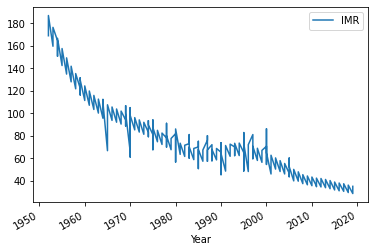

In [ ]:
# checking for the trend
IMR.plot(x='Year')
plt.show()

###Modelling

Facebook Prophet

In [ ]:
IMR['ds'] = IMR['Year']
IMR['y'] = IMR['IMR']

In [ ]:
IMR.set_index('Year')

Indicator Sex  ...         ds           y
Year                                         ...                       
1952-01-01  MRY0: Infant mortality rate   F  ... 1952-01-01  168.973466
1952-01-01  MRY0: Infant mortality rate   M  ... 1952-01-01  186.978254
1953-01-01  MRY0: Infant mortality rate   F  ... 1953-01-01  159.614436
1953-01-01  MRY0: Infant mortality rate   M  ... 1953-01-01  176.441928
1954-01-01  MRY0: Infant mortality rate   F  ... 1954-01-01  164.583600
...                                 ...  ..  ...        ...         ...
2017-01-01  MRY0: Infant mortality rate   M  ... 2017-01-01   37.224670
2018-01-01  MRY0: Infant mortality rate   F  ... 2018-01-01   29.401682
2018-01-01  MRY0: Infant mortality rate   M  ... 2018-01-01   36.004436
2019-01-01  MRY0: Infant mortality rate   F  ... 2019-01-01   28.500312
2019-01-01  MRY0: Infant mortality rate   M  ... 2019-01-01   34.915024

[230 rows x 6 columns]

In [ ]:
IMR1 = IMR[['ds', 'y']]
IMR1

ds           y
0   1952-01-01  168.973466
1   1952-01-01  186.978254
2   1953-01-01  159.614436
3   1953-01-01  176.441928
4   1954-01-01  164.583600
..         ...         ...
225 2017-01-01   37.224670
226 2018-01-01   29.401682
227 2018-01-01   36.004436
228 2019-01-01   28.500312
229 2019-01-01   34.915024

[230 rows x 2 columns]

In [ ]:
IMR1.to_csv('/home/ThisPC/Downloads/IMr.csv'= None, sep=',')

SyntaxError: ignored

In [ ]:

from pandas import to_datetime
from fbprophet import Prophet
# prepare expected column names
#IMR.columns = ['Unitofmeasure ', 'Sex','Indicator','IMR','Year']
#IMR['Year']= to_datetime(IMR['Year'])

In [ ]:
# prepare expected column names
IMR1.columns = ['ds', 'y']
IMR1['ds']= to_datetime(IMR1['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(IMR1)


2021-06-29 21:43:50.724 Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2021-06-29 21:43:50.726 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#model.fit.save("IMR1.pkl")

model_fit = model.fit(IMR1)
# save model
model_fit.save('IMR1.pkl')

In [ ]:
future = model.make_future_dataframe(periods= 731)

In [ ]:
future.head()

ds
0 1952-01-01
1 1953-01-01
2 1954-01-01
3 1955-01-01
4 1956-01-01

In [ ]:
future.tail()

ds
794 2020-12-28
795 2020-12-29
796 2020-12-30
797 2020-12-31
798 2021-01-01

**Making Predictions**

In [ ]:
pred = model.predict(future)
pred 

ds       trend  ...  multiplicative_terms_upper        yhat
0   1952-01-01  168.044185  ...                         0.0  162.923849
1   1953-01-01  163.246356  ...                         0.0  156.731902
2   1954-01-01  158.461636  ...                         0.0  152.406958
3   1955-01-01  153.676916  ...                         0.0  148.087132
4   1956-01-01  148.892195  ...                         0.0  143.771860
..         ...         ...  ...                         ...         ...
794 2020-12-28   32.779539  ...                         0.0   33.911999
795 2020-12-29   32.775485  ...                         0.0   31.989505
796 2020-12-30   32.771432  ...                         0.0   30.046472
797 2020-12-31   32.767379  ...                         0.0   28.120473
798 2021-01-01   32.763326  ...                         0.0   26.248872

[799 rows x 16 columns]

In [ ]:
import pickle
pkl_path = "path/to/save/Prophet.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)

# save the dataframe
forecast.to_pickle("path/to/data/forecast.pkl")
print("*** Data Saved ***")

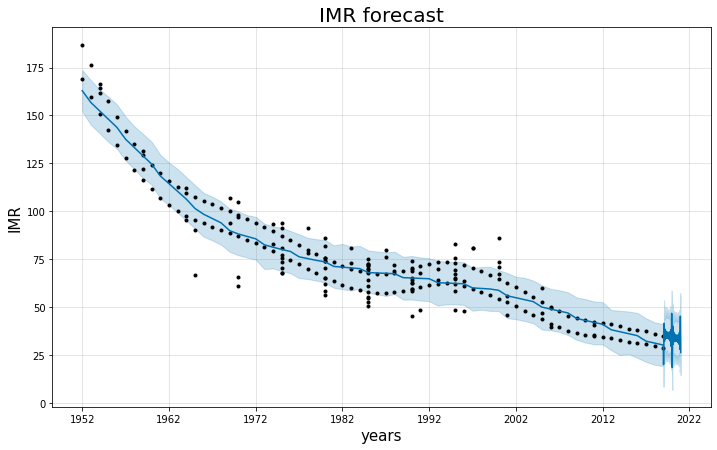

In [ ]:
# Add a title to a legend
fig = model.plot(pred)
plt.title("IMR forecast", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("IMR", fontsize=15)

plt.show()


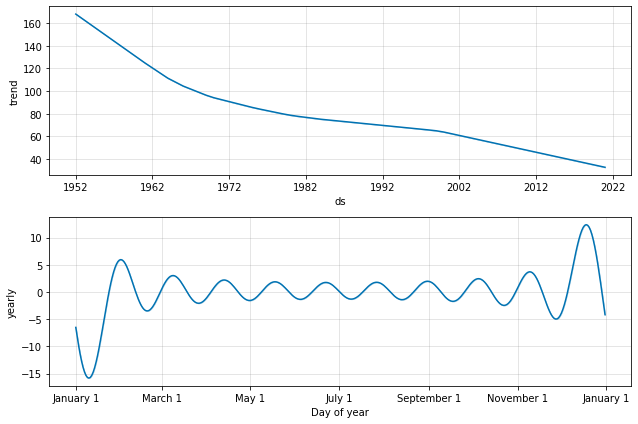

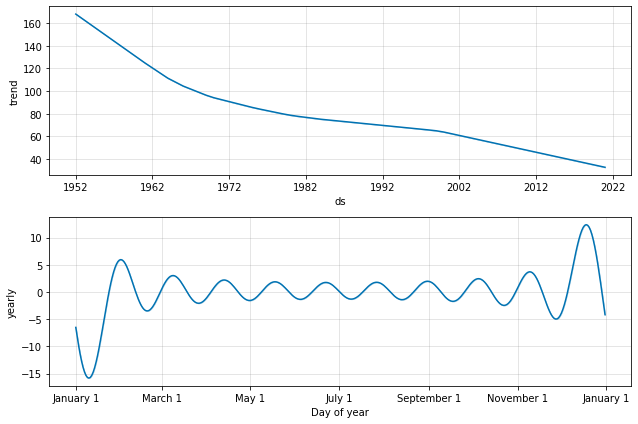

In [ ]:
model.plot_components(pred)

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("model1.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

**Checking for Accuracy**

In [ ]:
#cross-validation
from fbprophet.diagnostics import cross_validation
IMR_cv = cross_validation(model, initial='1080 days', period='180 days', horizon = '730 days')
IMR_cv.head()

INFO:fbprophet:Making 126 forecasts with cutoffs between 1955-05-27 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INF

ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 1956-01-01  141.080288  131.808615  150.102259  134.839606 1955-05-27
1 1956-01-01  141.080288  130.458672  150.665559  149.287447 1955-05-27
2 1957-01-01  131.983540  122.633296  141.933482  141.844810 1955-05-27
3 1957-01-01  131.983540  122.211894  141.894774  127.935656 1955-05-27
4 1956-01-01  141.080288  132.016169  150.960052  134.839606 1955-11-23

In [ ]:
from fbprophet.diagnostics import performance_metrics
IMR_p = performance_metrics(IMR_cv)
IMR_p.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0 71 days  83.814178  9.155008  7.742505  0.107563  0.095138  0.715517
1 75 days  89.987731  9.486186  7.965507  0.110040  0.101424  0.701149
2 76 days  91.515010  9.566348  8.019286  0.109556  0.101424  0.690374
3 80 days  90.558707  9.516234  7.964132  0.108797  0.101424  0.691810
4 81 days  94.701293  9.731459  8.083126  0.107654  0.101424  0.671695

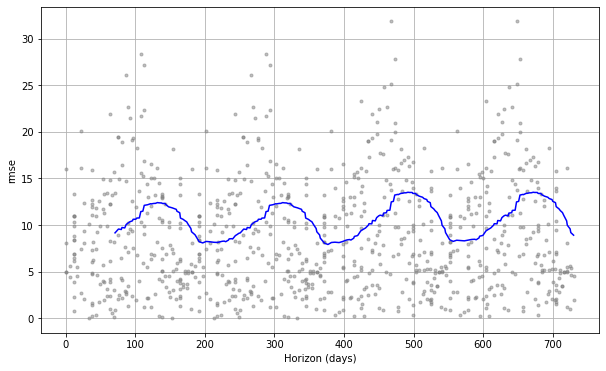

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(IMR_cv, metric='rmse')

##CPI

In [ ]:
cpi.tail()

Year  ...  Foodpriceinflation
235 2020-08-01  ...            5.310391
236 2020-09-01  ...            5.891924
237 2020-10-01  ...            6.587472
238 2020-11-01  ...            7.562035
239 2020-12-01  ...            8.611575

[5 rows x 4 columns]

In [ ]:
cpi.shape

(240, 4)

In [ ]:
cpi.dtypes

Year                                datetime64[ns]
ConsumerPricesFoodIndices2015              float64
ConsumerPricesGeneralIndices2015           float64
Foodpriceinflation                         float64
dtype: object

In [ ]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Year                              240 non-null    datetime64[ns]
 1   ConsumerPricesFoodIndices2015     240 non-null    float64       
 2   ConsumerPricesGeneralIndices2015  240 non-null    float64       
 3   Foodpriceinflation                240 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.6 KB


In [ ]:
cpi["Year"].value_counts()

2009-09-01    1
2006-07-01    1
2004-04-01    1
2012-10-01    1
2001-03-01    1
             ..
2002-03-01    1
2019-01-01    1
2009-05-01    1
2009-06-01    1
2009-08-01    1
Name: Year, Length: 240, dtype: int64

###Modelling

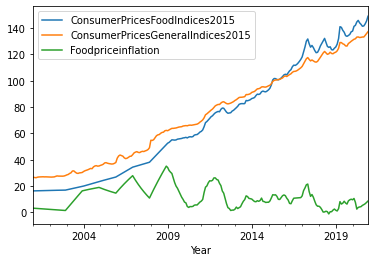

In [ ]:
cpi.plot(x= 'Year')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
cpi

Year  ...  Foodpriceinflation
0   2001-01-01  ...            3.193185
1   2001-02-01  ...            3.118768
2   2001-03-01  ...            3.044754
3   2001-04-01  ...            2.971138
4   2001-05-01  ...            2.897918
..         ...  ...                 ...
235 2020-08-01  ...            5.310391
236 2020-09-01  ...            5.891924
237 2020-10-01  ...            6.587472
238 2020-11-01  ...            7.562035
239 2020-12-01  ...            8.611575

[240 rows x 4 columns]

In [ ]:

cpi_df=cpi.reset_index()[['Year','ConsumerPricesFoodIndices2015','Foodpriceinflation']].rename({'Year':'ds','ConsumerPricesFoodIndices2015':'y','Foodpriceinflation':'infl'}, axis='columns')

In [ ]:
cpi_df

ds           y      infl
0   2001-01-01   16.328080  3.193185
1   2001-02-01   16.360620  3.118768
2   2001-03-01   16.393159  3.044754
3   2001-04-01   16.425699  2.971138
4   2001-05-01   16.458238  2.897918
..         ...         ...       ...
235 2020-08-01  141.387407  5.310391
236 2020-09-01  141.599488  5.891924
237 2020-10-01  143.213722  6.587472
238 2020-11-01  145.419214  7.562035
239 2020-12-01  148.981984  8.611575

[240 rows x 3 columns]

In [ ]:
cpi_df['month']=cpi_df['ds'].dt.month

In [ ]:
cpi_df.head()

ds          y      infl  month
0 2001-01-01  16.328080  3.193185      1
1 2001-02-01  16.360620  3.118768      2
2 2001-03-01  16.393159  3.044754      3
3 2001-04-01  16.425699  2.971138      4
4 2001-05-01  16.458238  2.897918      5

In [ ]:
cpi_df.tail()

ds           y      infl  month
235 2020-08-01  141.387407  5.310391      8
236 2020-09-01  141.599488  5.891924      9
237 2020-10-01  143.213722  6.587472     10
238 2020-11-01  145.419214  7.562035     11
239 2020-12-01  148.981984  8.611575     12

In [ ]:
import plotly.express as px
fig = px.line(cpi_df, x='ds', y='y', hover_data=['infl','month'], title='CPI food Prices')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
cpi_df[['y','infl']].corr()

y      infl
y     1.000000 -0.255406
infl -0.255406  1.000000

In [ ]:
# splitting into train and test
train=cpi_df[(cpi_df['ds'] >= '2005-01-01') & (cpi_df['ds'] <= '2020-01-01')]
test=cpi_df[(cpi_df['ds'] > '2020-01-01')]

In [ ]:
train.shape

(181, 4)

In [ ]:
#test.shape

In [ ]:
test

ds           y       infl  month
229 2020-02-01  141.298575  10.578822      2
230 2020-03-01  142.075718   7.635049      3
231 2020-04-01  144.590458   2.508132      4
232 2020-05-01  145.833936   3.773664      5
233 2020-06-01  143.981845   4.121686      6
234 2020-07-01  142.829990   4.374204      7
235 2020-08-01  141.387407   5.310391      8
236 2020-09-01  141.599488   5.891924      9
237 2020-10-01  143.213722   6.587472     10
238 2020-11-01  145.419214   7.562035     11
239 2020-12-01  148.981984   8.611575     12

In [ ]:

m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
#m.add_regressor('month',standardize=False,mode='multiplicative')

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:

m.params

{'beta': array([[ 0.00681687, -0.0064872 ,  0.02072096, -0.03870986, -0.00385938,
         -0.02589486, -0.0094276 , -0.00333889,  0.00337027,  0.00269674,
          0.00659261,  0.0022846 ,  0.00514809,  0.00106092, -0.006576  ,
          0.00289987, -0.00428948,  0.02343831,  0.01740697,  0.03892531]]),
 'delta': array([[ 3.28951573e-07,  2.74231848e-05,  2.38920089e-03,
          1.10465517e-02,  7.11828890e-02,  4.66470522e-02,
          8.34278580e-09, -6.96906046e-09, -2.21608230e-08,
         -1.27234794e-09,  4.02618528e-09,  2.23558920e-08,
         -7.47194831e-09, -2.94426823e-02, -3.67991412e-02,
         -1.18550005e-09, -1.90477590e-09,  6.09921589e-09,
          1.34820142e-01,  1.75136659e-01,  8.92727911e-02,
          1.58114430e-02, -2.56981583e-10,  7.20734170e-10,
         -4.28547846e-01]]),
 'k': array([[0.69163582]]),
 'm': array([[0.15159337]]),
 'sigma_obs': array([[0.01826212]]),
 'trend': array([[0.15159337, 0.15550734, 0.15904253, 0.1629565 , 0.16674421,
  

In [ ]:
# fore
future = m.make_future_dataframe(periods=1460)
future.tail()

ds
1636 2023-12-27
1637 2023-12-28
1638 2023-12-29
1639 2023-12-30
1640 2023-12-31

In [ ]:
#future['month'] = cpi_df['month']

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1636 2023-12-27  160.356554  151.621931  168.319389
1637 2023-12-28  161.736194  153.892665  170.229658
1638 2023-12-29  162.984391  154.591426  171.696456
1639 2023-12-30  164.067918  156.262048  171.887706
1640 2023-12-31  164.958305  156.988368  172.829515

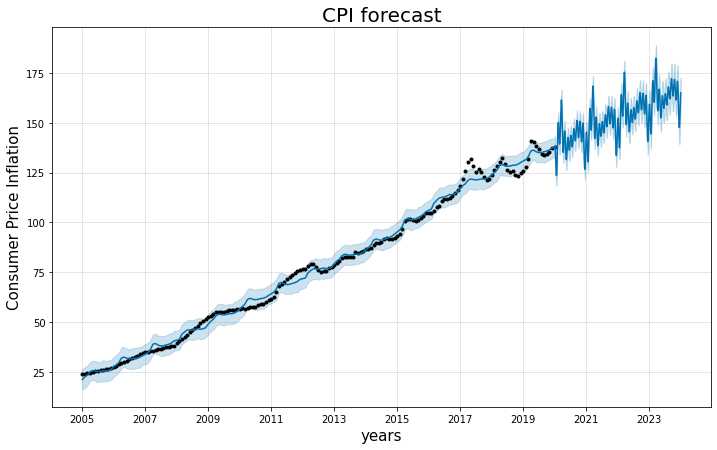

In [ ]:
# Add a title to a legend
fig1 = m.plot(forecast)
plt.title("CPI forecast", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("Consumer Price Inflation", fontsize=15)

plt.show()

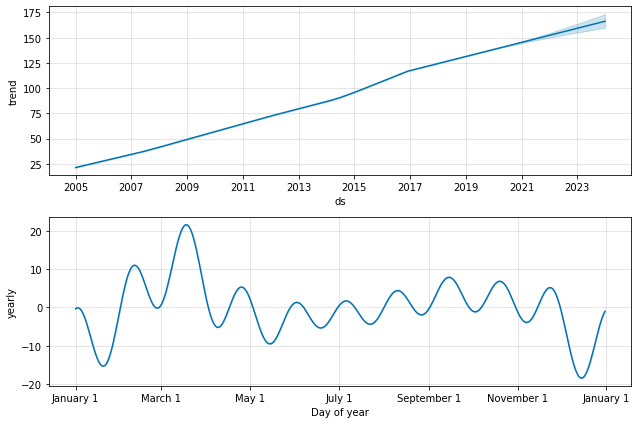

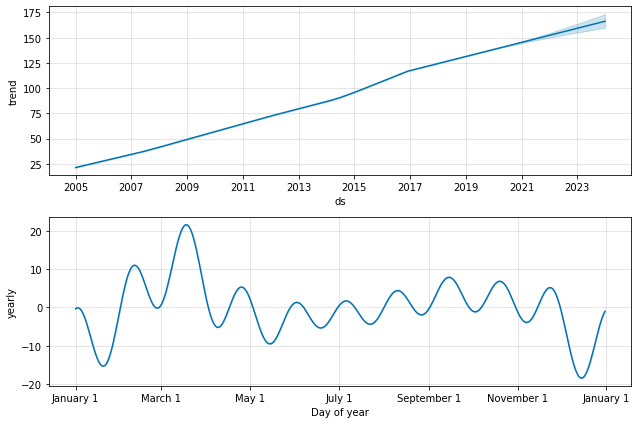

In [ ]:
m.plot_components(forecast)

**Cross-Validation**

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 25 forecasts with cutoffs between 2007-01-04 00:00:00 and 2019-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


horizon        mse      rmse  ...      mape     mdape  coverage
0   57 days 00:00:00  10.064861  3.172517  ...  0.027852  0.023969  0.366667
1   57 days 12:00:00  10.066318  3.172746  ...  0.027945  0.023969  0.366667
2   58 days 00:00:00   9.691209  3.113071  ...  0.027068  0.023982  0.433333
3   58 days 12:00:00   9.232839  3.038559  ...  0.027138  0.026354  0.383333
4   59 days 00:00:00  10.714474  3.273297  ...  0.026966  0.026354  0.433333
..               ...        ...       ...  ...       ...       ...       ...
77 362 days 12:00:00  50.693049  7.119905  ...  0.073485  0.057144  0.375000
78 363 days 00:00:00  52.700903  7.259539  ...  0.075171  0.057144  0.375000
79 363 days 12:00:00  55.014566  7.417180  ...  0.073930  0.054100  0.316667
80 364 days 00:00:00  55.988710  7.482560  ...  0.074433  0.052102  0.316667
81 365 days 00:00:00  58.123926  7.623905  ...  0.074199  0.048247  0.341667

[82 rows x 7 columns]

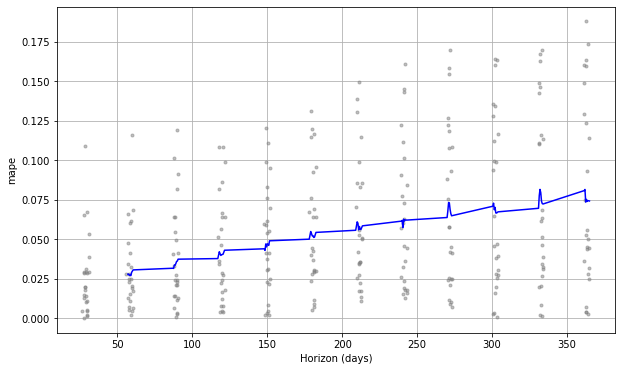

In [ ]:

from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

##Crops

In [ ]:
crops = pd.read_csv('/content/Annual Maize production 1961-2019.csv', parse_dates=['ds'])

In [ ]:
crops.head()

ds        y
0 1961-01-01   940000
1 1962-01-01  1100000
2 1963-01-01  1250000
3 1964-01-01  1230000
4 1965-01-01  1300530

In [ ]:
crops.set_index('ds')

y
ds                 
1961-01-01   940000
1962-01-01  1100000
1963-01-01  1250000
1964-01-01  1230000
1965-01-01  1300530
1966-01-01  1090000
1967-01-01  1440000
1968-01-01  1730000
1969-01-01  1720000
1970-01-01  1470000
1971-01-01  1400000
1972-01-01  1630000
1973-01-01  1870000
1974-01-01  1950000
1975-01-01  2050000
1976-01-01  2600000
1977-01-01  2553000
1978-01-01  2169000
1979-01-01  1755000
1980-01-01  1620000
1981-01-01  1768000
1982-01-01  2502000
1983-01-01  2300000
1984-01-01  1422000
1985-01-01  2430000
1986-01-01  2898000
1987-01-01  2415600
1988-01-01  2761200
1989-01-01  2630700
1990-01-01  2289600
1991-01-01  2400000
1992-01-01  2430000
1993-01-01  2089000
1994-01-01  3060000
1995-01-01  2698863
1996-01-01  2160000
1997-01-01  2214000
1998-01-01  2464101
1999-01-01  2322140
2000-01-01  2160000
2001-01-01  2790000
2002-01-01  2408596
2003-01-01  2710848
2004-01-01  2607139
2005-01-01  2905559
2006-01-01  3247200
2007-01-01  2928793
2008-01-01  2367237
2009-01-01  2439000
2010-01-01  3464541
2011-01-01  3376862
2012-01-01  3749880
2013-01-01  3592688
2014-01-01  3513171
2015-01-01  3825000
2016-01-01  3339000
2017-01-01  3186000
2018-01-01  4013777
2019-01-01  3897000

In [ ]:
crops.to_csv('maize_production.csv', sep=',')

In [ ]:
crops.tail()

Year  Area harvested  Yield  Production
54 2015-01-01         2098240  18230     3825000
55 2016-01-01         2337586  14284     3339000
56 2017-01-01         2086178  15272     3186000
57 2018-01-01         2273283  17656     4013777
58 2019-01-01         2196136  17745     3897000

In [ ]:
crops.shape

(59, 4)

In [ ]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            59 non-null     datetime64[ns]
 1   Area harvested  59 non-null     int64         
 2   Yield           59 non-null     int64         
 3   Production      59 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.0 KB


In [ ]:
crops.isnull().any()

Year              False
Area harvested    False
Yield             False
Production        False
dtype: bool

In [ ]:
crops.nunique()

Year              59
Area harvested    51
Yield             58
Production        57
dtype: int64

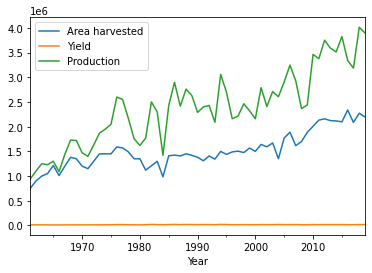

In [ ]:
crops.plot(x='Year')
plt.show()

###Modelling

In [ ]:
from fbprophet import Prophet

In [ ]:

crops_df=crops.reset_index()[['Year','Area harvested','Production','Yield']].rename({'Year':'ds','Production':'y','Yield':'Yield','Area harvested':'A.harv'}, axis='columns')

In [ ]:
crops_df

ds   A.harv        y  Yield
0  1961-01-01   750000   940000  12533
1  1962-01-01   900000  1100000  12222
2  1963-01-01  1000000  1250000  12500
3  1964-01-01  1050000  1230000  11714
4  1965-01-01  1214000  1300530  10713
5  1966-01-01  1010000  1090000  10792
6  1967-01-01  1200000  1440000  12000
7  1968-01-01  1380000  1730000  12536
8  1969-01-01  1350000  1720000  12741
9  1970-01-01  1200000  1470000  12250
10 1971-01-01  1150000  1400000  12174
11 1972-01-01  1300000  1630000  12538
12 1973-01-01  1450000  1870000  12897
13 1974-01-01  1450000  1950000  13448
14 1975-01-01  1450000  2050000  14138
15 1976-01-01  1590000  2600000  16352
16 1977-01-01  1570000  2553000  16261
17 1978-01-01  1490000  2169000  14557
18 1979-01-01  1350000  1755000  13000
19 1980-01-01  1350000  1620000  12000
20 1981-01-01  1120000  1768000  15786
21 1982-01-01  1208000  2502000  20712
22 1983-01-01  1300000  2300000  17692
23 1984-01-01   985000  1422000  14437
24 1985-01-01  1411000  2430000  17222
25 1986-01-01  1424600  2898000  20343
26 1987-01-01  1406956  2415600  17169
27 1988-01-01  1450939  2761200  19030
28 1989-01-01  1420000  2630700  18526
29 1990-01-01  1380000  2289600  16591
30 1991-01-01  1310000  2400000  18321
31 1992-01-01  1407000  2430000  17271
32 1993-01-01  1343500  2089000  15549
33 1994-01-01  1500000  3060000  20400
34 1995-01-01  1438740  2698863  18759
35 1996-01-01  1489000  2160000  14506
36 1997-01-01  1504820  2214000  14713
37 1998-01-01  1475740  2464101  16697
38 1999-01-01  1567240  2322140  14817
39 2000-01-01  1500000  2160000  14400
40 2001-01-01  1640000  2790000  17012
41 2002-01-01  1592315  2408596  15126
42 2003-01-01  1670914  2710848  16224
43 2004-01-01  1351327  2607139  19293
44 2005-01-01  1771123  2905559  16405
45 2006-01-01  1888185  3247200  17197
46 2007-01-01  1615304  2928793  18132
47 2008-01-01  1700000  2367237  13925
48 2009-01-01  1884368  2439000  12943
49 2010-01-01  2008346  3464541  17251
50 2011-01-01  2131887  3376862  15840
51 2012-01-01  2159322  3749880  17366
52 2013-01-01  2123138  3592688  16922
53 2014-01-01  2116141  3513171  16602
54 2015-01-01  2098240  3825000  18230
55 2016-01-01  2337586  3339000  14284
56 2017-01-01  2086178  3186000  15272
57 2018-01-01  2273283  4013777  17656
58 2019-01-01  2196136  3897000  17745

In [ ]:
import plotly.express as px
fig = px.line(crops_df, x='ds', y='y', hover_data=['Yield','A.harv'], title='Maize Production')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#Y (Area Harvested) against ds(Years)

In [ ]:
# splitting into train and test
train=crops_df[(crops_df['ds'] >= '2000-01-01') & (crops_df['ds'] <= '2019-01-01')]
test=crops_df[(crops_df['ds'] > '2019-01-01')]


In [ ]:
train.shape

(20, 4)

In [ ]:
#test.shape

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.add_regressor('Yield',standardize=False)
m.add_regressor('A.harv',standardize=False,mode='multiplicative')


In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
m.params

{'beta': array([[-5.31429387e+00, -1.99412543e-01, -4.89802572e+00,
         -1.54512510e+00, -2.85862598e-02, -4.35284515e-01,
          4.34747704e+00,  1.46430297e+00,  7.01531311e+00,
         -7.36974993e-01,  4.85159266e+00,  6.04870424e-01,
          4.57059153e+00, -6.88168751e-01, -4.93018395e+00,
          4.24907172e-01,  2.15945241e+00, -1.36082801e-01,
         -7.76762761e+00,  2.20763339e-01,  5.48957151e-05,
          3.45878784e-06]]),
 'delta': array([[ 0.25366767, -0.13188106, -0.15077393,  0.36080141, -0.17713722,
         -0.03625997,  0.21424341, -0.21401671, -0.02814683,  0.09188877,
         -0.01443618, -0.02661436,  0.03042393, -0.01041523,  0.00486316]]),
 'k': array([[-0.16382581]]),
 'm': array([[0.12622539]]),
 'sigma_obs': array([[9.55322995e-12]]),
 'trend': array([[0.12622539, 0.11758558, 0.1223107 , 0.1200997 , 0.10995895,
         0.11881828, 0.1183371 , 0.11594888, 0.1248285 , 0.1224457 ,
         0.11858905, 0.11956518, 0.11978205, 0.11859594, 0.119

In [ ]:
future_crp = m.make_future_dataframe(periods=1095)
future_crp.tail()

ds
1110 2021-12-27
1111 2021-12-28
1112 2021-12-29
1113 2021-12-30
1114 2021-12-31

In [ ]:
future_crp['Yield'] = crops_df['Yield']

future_crp['A.harv'] = crops_df['A.harv']

In [ ]:
future_crp

ds    Yield     A.harv
0    2000-01-01  12533.0   750000.0
1    2001-01-01  12222.0   900000.0
2    2002-01-01  12500.0  1000000.0
3    2003-01-01  11714.0  1050000.0
4    2004-01-01  10713.0  1214000.0
...         ...      ...        ...
1110 2021-12-27      NaN        NaN
1111 2021-12-28      NaN        NaN
1112 2021-12-29      NaN        NaN
1113 2021-12-30      NaN        NaN
1114 2021-12-31      NaN        NaN

[1115 rows x 3 columns]

In [ ]:
future_crp[['ds','Yield','A.harv']]=future_crp[['ds','Yield','A.harv']].fillna(method='ffill')

In [ ]:

forecast = m.predict(future_crp)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1110 2021-12-27  1.369007e+06 -3.520280e+05  3.152198e+06
1111 2021-12-28  2.485992e+06  7.631969e+05  4.270709e+06
1112 2021-12-29  3.218950e+06  1.494394e+06  5.005193e+06
1113 2021-12-30  3.643096e+06  1.916352e+06  5.430865e+06
1114 2021-12-31  3.845790e+06  2.116139e+06  5.635085e+06

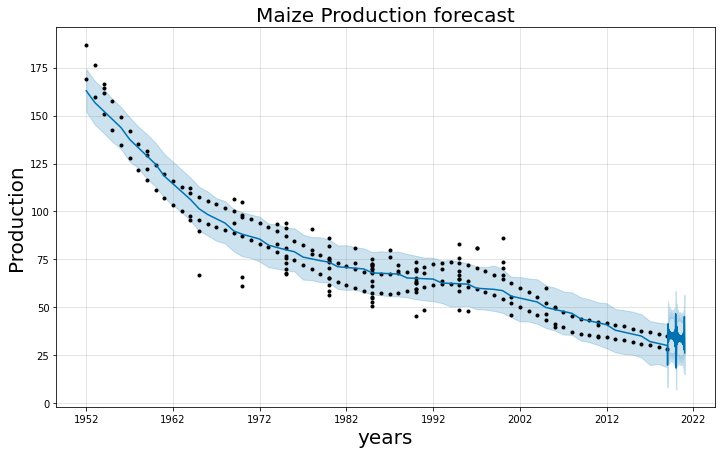

In [ ]:
# Add a title to a legend
fig1 = model.plot(pred)
plt.title("Maize Production forecast", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("Production", fontsize=15)

plt.show()

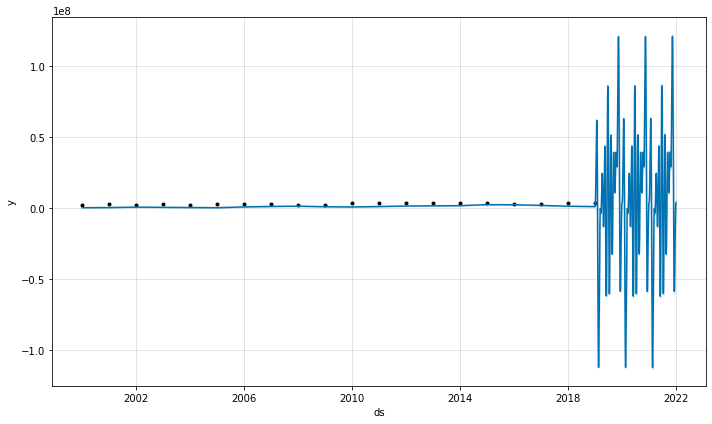

In [ ]:
fig2 = m.plot(forecast)

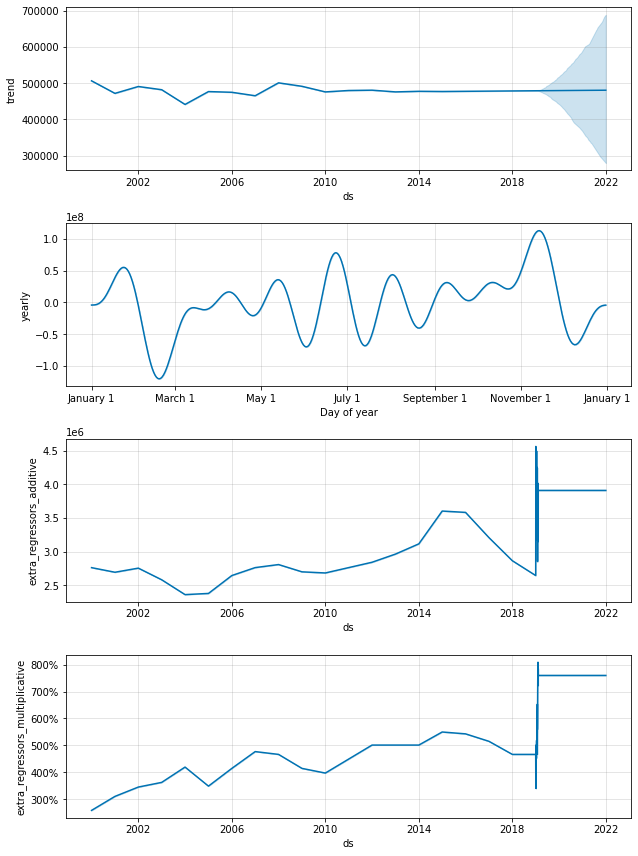

In [ ]:
fig3 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '731 days')
df_crp = performance_metrics(cv_results)
df_crp

INFO:fbprophet:Making 15 forecasts with cutoffs between 2002-12-28 00:00:00 and 2016-12-31 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbpro

horizon           mse           rmse  ...      mape     mdape  coverage
0    1 days 00:00:00  8.028855e+09   89603.877199  ...  0.025364  0.030444  1.000000
1    1 days 12:00:00  5.904547e+09   76841.049616  ...  0.020972  0.015537  0.666667
2    2 days 00:00:00  6.043541e+09   77740.213001  ...  0.021942  0.023322  0.166667
3    2 days 12:00:00  2.203868e+10  148454.290674  ...  0.040825  0.032644  0.000000
4    3 days 00:00:00  1.711768e+10  130834.544958  ...  0.039230  0.032644  0.333333
5    3 days 12:00:00  4.095681e+11  639975.041881  ...  0.155664  0.009918  0.166667
6    4 days 00:00:00  2.347850e+11  484546.152119  ...  0.112970  0.113524  0.000000
7  366 days 00:00:00  4.470855e+10  211443.965174  ...  0.049963  0.088049  0.666667
8  366 days 12:00:00  2.096433e+10  144790.650308  ...  0.028635  0.005140  1.000000
9  367 days 00:00:00  4.999982e+09   70710.552418  ...  0.013746  0.005140  0.666667
10 367 days 12:00:00  1.909235e+10  138175.065960  ...  0.031314  0.016805  0.166667
11 368 days 00:00:00  1.282251e+10  113236.522577  ...  0.029889  0.016805  0.666667
12 368 days 12:00:00  1.508785e+10  122832.595923  ...  0.038077  0.044238  0.666667
13 369 days 00:00:00  1.780922e+11  422009.672416  ...  0.110968  0.013125  0.166667
14 369 days 12:00:00  1.806810e+11  425065.900480  ...  0.114980  0.057196  0.000000
15 731 days 00:00:00  9.570159e+10  309356.743586  ...  0.071102  0.057196  0.333333

[16 rows x 7 columns]

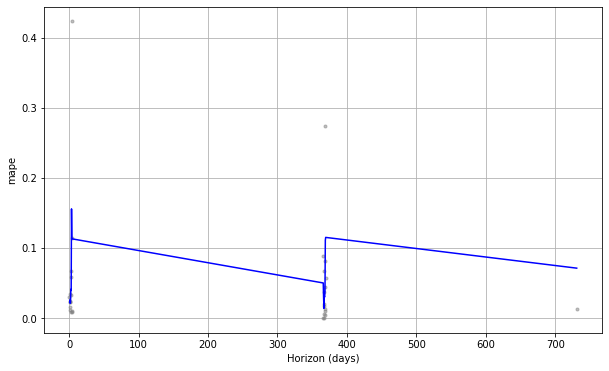

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig4 = plot_cross_validation_metric(cv_results, metric='mape')

##Labor

In [ ]:
labor.head()

Year  labour_income_share_in_GDP
0 1991-01-01                     2465.88
1 1992-01-01                     2354.25
2 1993-01-01                     2274.52
3 1994-01-01                     2248.34
4 1995-01-01                     2263.08

In [ ]:
labor.tail()

Year  labour_income_share_in_GDP
24 2015-01-01                     2581.61
25 2016-01-01                     2619.96
26 2017-01-01                     2664.47
27 2018-01-01                     2750.56
28 2019-01-01                     2814.49

In [ ]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Year                        29 non-null     datetime64[ns]
 1   labour_income_share_in_GDP  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 592.0 bytes


In [ ]:
labor.nunique()

Year                          29
labour_income_share_in_GDP    29
dtype: int64

###Modelling

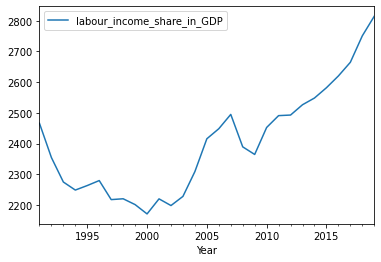

In [ ]:
labor.plot(x='Year')
plt.show()

In [ ]:
labor['ds'] = labor['Year']
labor['y'] = labor['labour_income_share_in_GDP']

In [ ]:
labor.set_index('Year')

labour_income_share_in_GDP         ds        y
Year                                                      
1991-01-01                     2465.88 1991-01-01  2465.88
1992-01-01                     2354.25 1992-01-01  2354.25
1993-01-01                     2274.52 1993-01-01  2274.52
1994-01-01                     2248.34 1994-01-01  2248.34
1995-01-01                     2263.08 1995-01-01  2263.08
1996-01-01                     2279.27 1996-01-01  2279.27
1997-01-01                     2217.25 1997-01-01  2217.25
1998-01-01                     2219.97 1998-01-01  2219.97
1999-01-01                     2200.99 1999-01-01  2200.99
2000-01-01                     2170.65 2000-01-01  2170.65
2001-01-01                     2219.69 2001-01-01  2219.69
2002-01-01                     2197.92 2002-01-01  2197.92
2003-01-01                     2227.70 2003-01-01  2227.70
2004-01-01                     2308.53 2004-01-01  2308.53
2005-01-01                     2415.39 2005-01-01  2415.39
2006-01-01                     2448.14 2006-01-01  2448.14
2007-01-01                     2494.76 2007-01-01  2494.76
2008-01-01                     2389.10 2008-01-01  2389.10
2009-01-01                     2364.32 2009-01-01  2364.32
2010-01-01                     2452.20 2010-01-01  2452.20
2011-01-01                     2490.78 2011-01-01  2490.78
2012-01-01                     2492.66 2012-01-01  2492.66
2013-01-01                     2526.25 2013-01-01  2526.25
2014-01-01                     2548.12 2014-01-01  2548.12
2015-01-01                     2581.61 2015-01-01  2581.61
2016-01-01                     2619.96 2016-01-01  2619.96
2017-01-01                     2664.47 2017-01-01  2664.47
2018-01-01                     2750.56 2018-01-01  2750.56
2019-01-01                     2814.49 2019-01-01  2814.49

In [ ]:
labor1 = labor[['ds','y']]
labor1


ds        y
0  1991-01-01  2465.88
1  1992-01-01  2354.25
2  1993-01-01  2274.52
3  1994-01-01  2248.34
4  1995-01-01  2263.08
5  1996-01-01  2279.27
6  1997-01-01  2217.25
7  1998-01-01  2219.97
8  1999-01-01  2200.99
9  2000-01-01  2170.65
10 2001-01-01  2219.69
11 2002-01-01  2197.92
12 2003-01-01  2227.70
13 2004-01-01  2308.53
14 2005-01-01  2415.39
15 2006-01-01  2448.14
16 2007-01-01  2494.76
17 2008-01-01  2389.10
18 2009-01-01  2364.32
19 2010-01-01  2452.20
20 2011-01-01  2490.78
21 2012-01-01  2492.66
22 2013-01-01  2526.25
23 2014-01-01  2548.12
24 2015-01-01  2581.61
25 2016-01-01  2619.96
26 2017-01-01  2664.47
27 2018-01-01  2750.56
28 2019-01-01  2814.49

In [ ]:
labor1.to_csv('labor1.csv')

In [ ]:
# prepare expected column names
labor1.columns = ['ds', 'y']
labor1['ds']= to_datetime(labor1['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(labor1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [ ]:
future_labor = model.make_future_dataframe(periods= 730)
future_labor

ds
0   1991-01-01
1   1992-01-01
2   1993-01-01
3   1994-01-01
4   1995-01-01
..         ...
754 2020-12-27
755 2020-12-28
756 2020-12-29
757 2020-12-30
758 2020-12-31

[759 rows x 1 columns]

In [ ]:
pred_labor = model.predict(future_labor)
pred_labor


ds       trend  ...  multiplicative_terms_upper         yhat
0   1991-01-01 -866.200204  ...                         0.0  2365.607866
1   1992-01-01 -884.640641  ...                         0.0  2330.161519
2   1993-01-01 -903.131600  ...                         0.0  2298.416137
3   1994-01-01 -921.572035  ...                         0.0  2305.809687
4   1995-01-01 -940.003447  ...                         0.0  2291.804624
..         ...         ...  ...                         ...          ...
754 2020-12-27 -434.092142  ...                         0.0  -636.720853
755 2020-12-28 -434.013469  ...                         0.0   664.194579
756 2020-12-29 -433.934796  ...                         0.0  1677.336394
757 2020-12-30 -433.856123  ...                         0.0  2376.128306
758 2020-12-31 -433.777450  ...                         0.0  2742.598490

[759 rows x 16 columns]

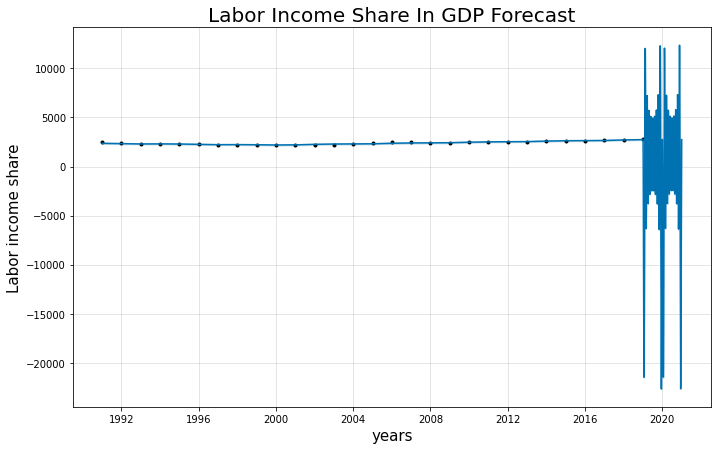

In [ ]:
# Adding a title
fig1 = model.plot(pred_labor)
plt.title("Labor Income Share In GDP Forecast", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("Labor income share", fontsize=15)

plt.show()

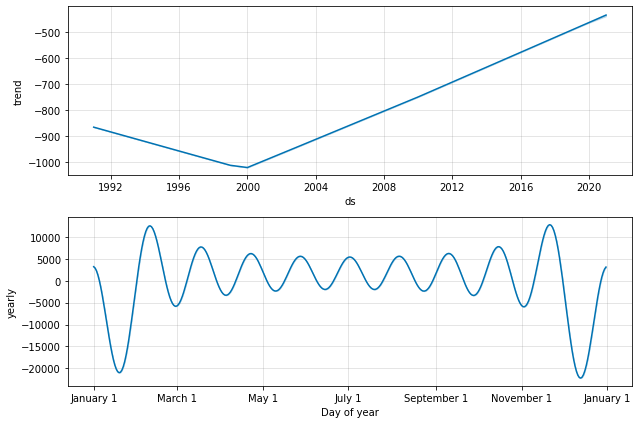

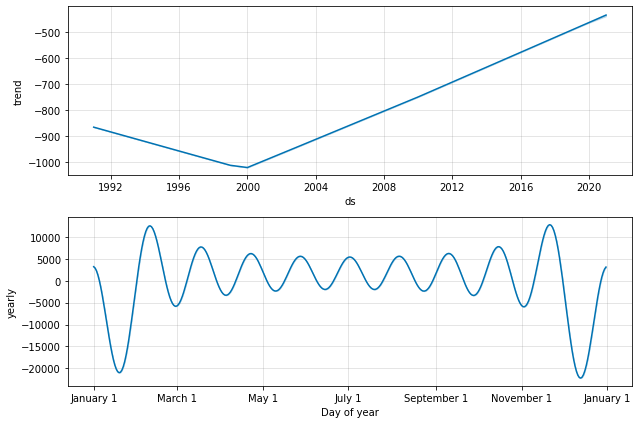

In [ ]:
model.plot_components(pred_labor)

**Cross Validation**

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '1041 days', horizon = '731 days')
df_labor= performance_metrics(cv_results)
df_labor

INFO:fbprophet:Making 15 forecasts with cutoffs between 2002-12-28 00:00:00 and 2016-12-31 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbpro

horizon           mse           rmse  ...      mape     mdape  coverage
0    1 days 00:00:00  8.028855e+09   89603.877199  ...  0.025364  0.030444  1.000000
1    1 days 12:00:00  5.904547e+09   76841.049616  ...  0.020972  0.015537  0.666667
2    2 days 00:00:00  6.043541e+09   77740.213001  ...  0.021942  0.023322  0.166667
3    2 days 12:00:00  2.203868e+10  148454.290674  ...  0.040825  0.032644  0.000000
4    3 days 00:00:00  1.711768e+10  130834.544958  ...  0.039230  0.032644  0.333333
5    3 days 12:00:00  4.095681e+11  639975.041881  ...  0.155664  0.009918  0.500000
6    4 days 00:00:00  2.347850e+11  484546.152119  ...  0.112970  0.113524  0.166667
7  366 days 00:00:00  4.470855e+10  211443.965174  ...  0.049963  0.088049  0.666667
8  366 days 12:00:00  2.096433e+10  144790.650308  ...  0.028635  0.005140  1.000000
9  367 days 00:00:00  4.999982e+09   70710.552418  ...  0.013746  0.005140  0.666667
10 367 days 12:00:00  1.909235e+10  138175.065960  ...  0.031314  0.016805  0.166667
11 368 days 00:00:00  1.282251e+10  113236.522577  ...  0.029889  0.016805  0.666667
12 368 days 12:00:00  1.508785e+10  122832.595923  ...  0.038077  0.044238  0.666667
13 369 days 00:00:00  1.780922e+11  422009.672416  ...  0.110968  0.013125  0.166667
14 369 days 12:00:00  1.806810e+11  425065.900480  ...  0.114980  0.057196  0.000000
15 731 days 00:00:00  9.570159e+10  309356.743586  ...  0.071102  0.057196  0.333333

[16 rows x 7 columns]

##Population

In [ ]:
pple.head()

Variant       Year  ...  population_total  population_growth_rate
0  Medium 1951-01-01  ...           6242107                0.027210
1  Medium 1952-01-01  ...           6415955                0.027851
2  Medium 1953-01-01  ...           6598172                0.028401
3  Medium 1954-01-01  ...           6788705                0.028877
4  Medium 1955-01-01  ...           6987658                0.029306

[5 rows x 8 columns]

In [ ]:
pple.tail()

Variant       Year  ...  population_total  population_growth_rate
64  Medium 2015-01-01  ...          47878339                0.025231
65  Medium 2016-01-01  ...          49051531                0.024504
66  Medium 2017-01-01  ...          50221146                0.023845
67  Medium 2018-01-01  ...          51392570                0.023325
68  Medium 2019-01-01  ...          52573967                0.022988

[5 rows x 8 columns]

In [ ]:
pple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Variant                 69 non-null     object        
 1   Year                    69 non-null     datetime64[ns]
 2   PopMale                 69 non-null     float64       
 3   PopFemale               69 non-null     float64       
 4   PopTotal                69 non-null     float64       
 5   PopDensity              69 non-null     float64       
 6   population_total        69 non-null     int64         
 7   population_growth_rate  69 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
pple.nunique()

Variant                    1
Year                      69
PopMale                   69
PopFemale                 69
PopTotal                  69
PopDensity                69
population_total          69
population_growth_rate    69
dtype: int64

In [ ]:
pple.isnull().any()

Variant                   False
Year                      False
PopMale                   False
PopFemale                 False
PopTotal                  False
PopDensity                False
population_total          False
population_growth_rate    False
dtype: bool

###Modelling

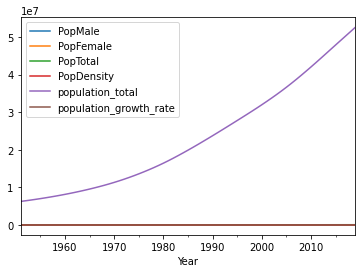

In [ ]:
pple.plot(x='Year')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
pple

Variant       Year  ...  population_total  population_growth_rate
0   Medium 1951-01-01  ...           6242107                0.027210
1   Medium 1952-01-01  ...           6415955                0.027851
2   Medium 1953-01-01  ...           6598172                0.028401
3   Medium 1954-01-01  ...           6788705                0.028877
4   Medium 1955-01-01  ...           6987658                0.029306
..     ...        ...  ...               ...                     ...
64  Medium 2015-01-01  ...          47878339                0.025231
65  Medium 2016-01-01  ...          49051531                0.024504
66  Medium 2017-01-01  ...          50221146                0.023845
67  Medium 2018-01-01  ...          51392570                0.023325
68  Medium 2019-01-01  ...          52573967                0.022988

[69 rows x 8 columns]

In [ ]:
pple_df=pple.reset_index()[['Year','PopMale','PopFemale','PopDensity','population_growth_rate','population_total']].rename({'Year':'ds','population_growth_rate':'y','PopDensity':'pdens','PopMale':'pm','PopFemale':'pfm','population_total':'Ptot'},
                                                                                                                           axis='columns')

In [ ]:
pple_df

ds         pm        pfm   pdens         y      Ptot
0  1951-01-01   3145.953   3096.154  10.968  0.027210   6242107
1  1952-01-01   3231.711   3184.244  11.273  0.027851   6415955
2  1953-01-01   3321.759   3276.413  11.593  0.028401   6598172
3  1954-01-01   3416.069   3372.636  11.928  0.028877   6788705
4  1955-01-01   3514.674   3472.984  12.278  0.029306   6987658
..        ...        ...        ...     ...       ...       ...
64 2015-01-01  23782.609  24095.730  84.124  0.025231  47878339
65 2016-01-01  24367.251  24684.280  86.185  0.024504  49051531
66 2017-01-01  24950.142  25271.004  88.240  0.023845  50221146
67 2018-01-01  25533.874  25858.696  90.299  0.023325  51392570
68 2019-01-01  26122.382  26451.585  92.374  0.022988  52573967

[69 rows x 6 columns]

In [ ]:
import plotly.express as px
fig = px.line(pple_df, x='ds', y='y', hover_data=['pm','pfm','pdens','Ptot'], title='Population')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
# splitting into train and test
train=pple_df[(pple_df['ds'] >= '2000-01-01') & (pple_df['ds'] <= '2019-01-01')]
test=pple_df[(pple_df['ds'] > '2019-01-01')]

In [ ]:
train.shape

(20, 6)

In [ ]:
test.shape

(0, 6)

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.add_regressor('pm',standardize=False)
m.add_regressor('pdens',standardize=False,mode='additive')
m.add_regressor('pfm',standardize=False)
m.add_regressor('Ptot',standardize=False,mode='multiplicative')

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
m.params

{'beta': array([[-1.80534196e-01,  1.45815288e+00, -6.02834854e-01,
          2.03314728e-01, -7.48864464e-01,  8.55312343e+00,
         -9.83006505e-01, -7.98888906e+00, -8.39970699e-01,
         -4.22670159e+00, -7.52154288e-01, -3.03988115e+00,
         -3.99814049e-01,  2.37554875e+00, -2.91016445e-01,
         -3.30763225e+00,  5.94152962e-01,  4.37726878e+00,
          1.51505522e+00,  3.46671105e+00,  1.05398990e-02,
         -7.22001290e+00,  1.48290274e-02, -8.68826327e-08]]),
 'delta': array([[ 0.03171558, -0.14450919, -0.07906195, -0.06062304,  0.04199681,
         -0.00696283,  0.00297393,  0.07537309,  0.15498294, -0.07536581,
          0.03691304,  0.06859347,  0.07172484,  0.02133691, -0.02267022]]),
 'k': array([[-0.24035209]]),
 'm': array([[0.74585629]]),
 'sigma_obs': array([[1.26362001e-09]]),
 'trend': array([[0.74585629, 0.73318067, 0.72220771, 0.70363448, 0.6809031 ,
         0.65491232, 0.63120131, 0.60712411, 0.58320331, 0.56319199,
         0.55138646, 0.53561

In [ ]:
future_pple = m.make_future_dataframe(periods=1096)
future_pple.tail()

ds
1111 2021-12-28
1112 2021-12-29
1113 2021-12-30
1114 2021-12-31
1115 2022-01-01

In [ ]:
future_pple['Ptot'] = pple_df['Ptot']
future_pple['pm'] = pple_df['pm']
future_pple['pfm'] = pple_df['pfm']
future_pple['pdens'] = pple_df['pdens']


In [ ]:
future_pple

ds       Ptot        pm       pfm   pdens
0    2000-01-01  6242107.0  3145.953  3096.154  10.968
1    2001-01-01  6415955.0  3231.711  3184.244  11.273
2    2002-01-01  6598172.0  3321.759  3276.413  11.593
3    2003-01-01  6788705.0  3416.069  3372.636  11.928
4    2004-01-01  6987658.0  3514.674  3472.984  12.278
...         ...        ...       ...       ...     ...
1111 2021-12-28        NaN       NaN       NaN     NaN
1112 2021-12-29        NaN       NaN       NaN     NaN
1113 2021-12-30        NaN       NaN       NaN     NaN
1114 2021-12-31        NaN       NaN       NaN     NaN
1115 2022-01-01        NaN       NaN       NaN     NaN

[1116 rows x 5 columns]

In [ ]:
future_pple[['pm','pdens','pfm','Ptot']]=future_pple[['pm','pdens','pfm','Ptot']].fillna(method='ffill')

In [ ]:
forecast = m.predict(future_pple)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
1111 2021-12-28  0.007087    0.004578    0.009713
1112 2021-12-29  0.014658    0.012147    0.017290
1113 2021-12-30  0.020437    0.017924    0.023074
1114 2021-12-31  0.023977    0.021462    0.026620
1115 2022-01-01  0.024927    0.022409    0.027575

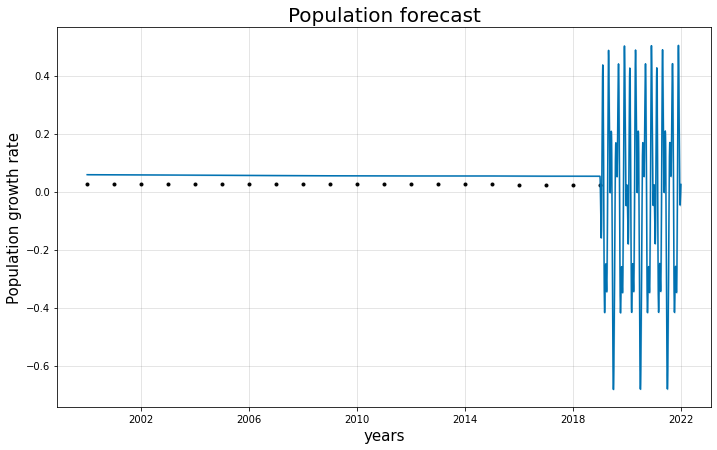

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
#fig1 = m.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), m, forecast)

fig1 = m.plot(forecast)
plt.title("Population forecast", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("Population growth rate", fontsize=15)

plt.show()
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

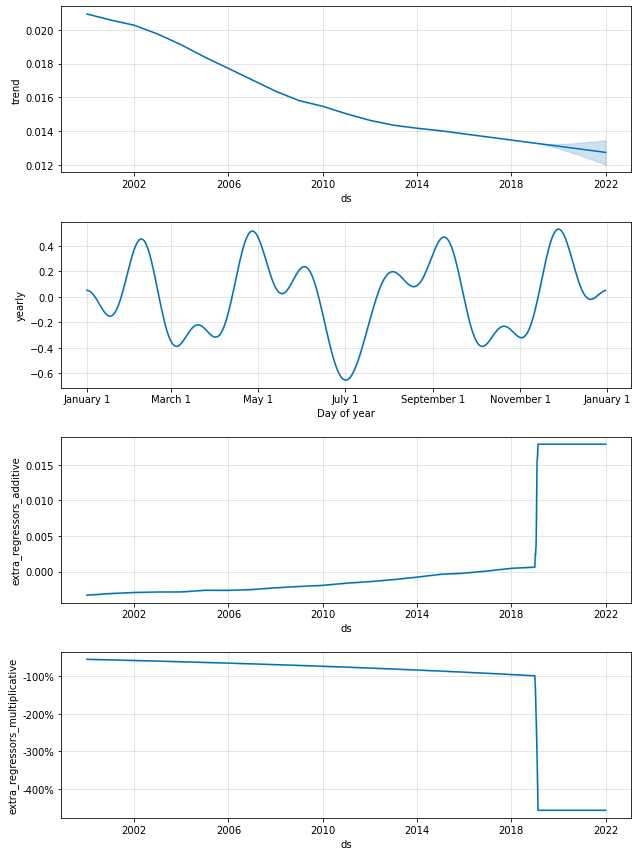

In [ ]:
fig2 = m.plot_components(forecast)

**Cross Validation**

In [ ]:
# cross validation
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '1825 days', horizon = '731 days')
df_pple = performance_metrics(cv_results)
df_pple

INFO:fbprophet:Making 12 forecasts with cutoffs between 2005-12-28 12:00:00 and 2016-12-31 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


horizon           mse      rmse  ...      mape     mdape  coverage
0    1 days 00:00:00  4.277397e-08  0.000207  ...  0.008043  0.008043      0.50
1    1 days 12:00:00  4.346919e-09  0.000066  ...  0.002353  0.002353      1.00
2    2 days 00:00:00  1.079016e-07  0.000328  ...  0.010145  0.010145      0.50
3    2 days 12:00:00  3.833686e-08  0.000196  ...  0.007035  0.007035      1.00
4    3 days 00:00:00  4.818136e-08  0.000220  ...  0.007819  0.007819      0.00
5    3 days 12:00:00  2.473290e-08  0.000157  ...  0.004550  0.004893      0.00
6  366 days 00:00:00  2.233732e-07  0.000473  ...  0.013838  0.013838      0.50
7  366 days 12:00:00  2.885577e-08  0.000170  ...  0.006851  0.006851      1.00
8  367 days 00:00:00  4.903644e-07  0.000700  ...  0.021932  0.021932      0.50
9  367 days 12:00:00  1.495550e-07  0.000387  ...  0.012612  0.012612      1.00
10 368 days 00:00:00  4.110224e-07  0.000641  ...  0.022804  0.022804      0.00
11 368 days 12:00:00  4.789279e-08  0.000219  ...  0.006924  0.006924      0.50
12 731 days 00:00:00  1.622214e-07  0.000403  ...  0.014900  0.016696      0.75

[13 rows x 7 columns]

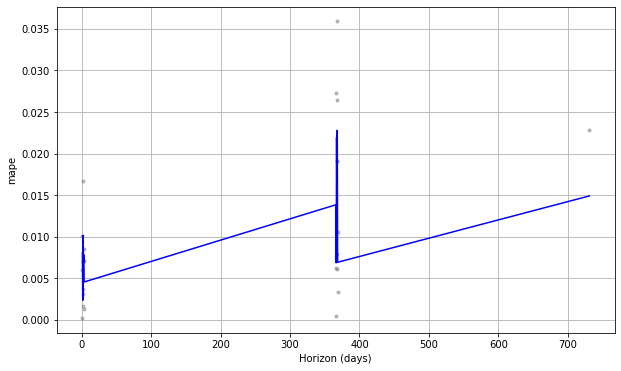

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

##Pop_Growth

In [ ]:
pop_growth.head()

Year  Total_Fertility_Rate  ...  GrowthRate  Rate_of_natural_increase
0 1953-01-01                 7.481  ...       2.793                    27.889
1 1958-01-01                 7.785  ...       3.004                    29.983
2 1963-01-01                 8.065  ...       3.202                    32.410
3 1968-01-01                 8.110  ...       3.409                    34.386
4 1973-01-01                 7.990  ...       3.667                    36.859

[5 rows x 17 columns]

In [ ]:
pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             14 non-null     datetime64[ns]
 1   Total_Fertility_Rate             14 non-null     float64       
 2   Net_Reproduction_Rate            14 non-null     float64       
 3   Crude_birth_Rate                 14 non-null     float64       
 4   Births                           14 non-null     float64       
 5   Life_expectancy_at_birth         14 non-null     float64       
 6   Male_life_expectancy_at_birth    14 non-null     float64       
 7   Female_life_expectancy_at-birth  14 non-null     float64       
 8   IMR                              14 non-null     float64       
 9   Under_five_mortality             14 non-null     float64       
 10  Crude_Death_Rate                 14 non-null     float64       


In [ ]:
pop_growth.shape

(14, 17)

###Modelling

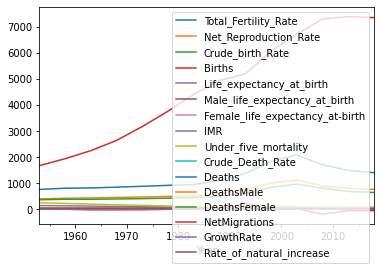

In [ ]:
pop_growth.plot(x='Year')
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
pop_growth

Year  Total_Fertility_Rate  ...  GrowthRate  Rate_of_natural_increase
0  1953-01-01                 7.481  ...       2.793                    27.889
1  1958-01-01                 7.785  ...       3.004                    29.983
2  1963-01-01                 8.065  ...       3.202                    32.410
3  1968-01-01                 8.110  ...       3.409                    34.386
4  1973-01-01                 7.990  ...       3.667                    36.859
5  1978-01-01                 7.640  ...       3.801                    37.931
6  1983-01-01                 7.216  ...       3.825                    38.089
7  1988-01-01                 6.538  ...       3.539                    35.251
8  1993-01-01                 5.650  ...       3.148                    29.691
9  1998-01-01                 5.350  ...       2.815                    28.243
10 2003-01-01                 5.000  ...       2.722                    27.032
11 2008-01-01                 4.650  ...       2.753                    28.454
12 2013-01-01                 4.060  ...       2.605                    26.238
13 2018-01-01                 3.520  ...       2.322                    23.387

[14 rows x 17 columns]

In [ ]:
pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             14 non-null     datetime64[ns]
 1   Total_Fertility_Rate             14 non-null     float64       
 2   Net_Reproduction_Rate            14 non-null     float64       
 3   Crude_birth_Rate                 14 non-null     float64       
 4   Births                           14 non-null     float64       
 5   Life_expectancy_at_birth         14 non-null     float64       
 6   Male_life_expectancy_at_birth    14 non-null     float64       
 7   Female_life_expectancy_at-birth  14 non-null     float64       
 8   IMR                              14 non-null     float64       
 9   Under_five_mortality             14 non-null     float64       
 10  Crude_Death_Rate                 14 non-null     float64       


In [ ]:
pop_df=pop_growth.reset_index()[['Year','GrowthRate','Total_Fertility_Rate','Crude_birth_Rate','Net_Reproduction_Rate','Life_expectancy_at_birth','Crude_Death_Rate','NetMigrations']].rename({'Year':'ds','GrowthRate':'y','Crude_birth_Rate':'Birth','NetMigrations':'Nmig','Net_Reproduction_Rate':'NRR','Crude_Death_Rate':'CDR','Total_Fertility_Rate':'TFR','Life_expectancy_at_birth':'LExB'},
                                                                                                                           axis='columns')

In [ ]:
pop_df

ds      y    TFR   Birth    NRR   LExB     CDR     Nmig
0  1953-01-01  2.793  7.481  51.182  2.373  42.57  23.293    0.000
1  1958-01-01  3.004  7.785  51.326  2.596  45.10  21.343    0.000
2  1963-01-01  3.202  8.065  50.925  2.877  48.44  18.515  -20.000
3  1968-01-01  3.409  8.110  50.673  3.026  51.12  16.287  -19.535
4  1973-01-01  3.667  7.990  51.006  3.111  53.96  14.147  -17.915
5  1978-01-01  3.801  7.640  50.157  3.075  56.49  12.226   -2.930
6  1983-01-01  3.825  7.216  48.577  2.991  58.83  10.488    3.805
7  1988-01-01  3.539  6.538  45.281  2.723  58.60  10.030    5.023
8  1993-01-01  3.148  5.650  40.356  2.312  55.66  10.665  221.569
9  1998-01-01  2.815  5.350  40.564  2.138  51.77  12.321  -21.386
10 2003-01-01  2.722  5.000  39.179  2.007  51.69  12.147   25.144
11 2008-01-01  2.753  4.650  37.106  1.984  58.49   8.652 -189.330
12 2013-01-01  2.605  4.060  32.870  1.814  62.92   6.632  -50.000
13 2018-01-01  2.322  3.520  28.905  1.604  66.18   5.518  -50.000

In [ ]:
import plotly.express as px
fig = px.line(pop_df, x='ds', y='y', hover_data=['Birth','NRR','CDR','LExB','TFR','Nmig'], title='Growth Rate')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
# splitting into train and test
train=pop_df[(pop_df['ds'] >= '2000-01-01') & (pop_df['ds'] <= '2018-01-01')]
test=pop_df[(pop_df['ds'] > '2018-01-01')]

In [ ]:
train.shape

(4, 8)

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.add_regressor('TFR',standardize=False)
m.add_regressor('Nmig',standardize=False,mode='additive')
m.add_regressor('NRR',standardize=False)
m.add_regressor('CDR',standardize=False,mode='multiplicative')
m.add_regressor('Birth',standardize=False)
m.add_regressor('LExB',standardize=False)

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


In [ ]:
m.params


{'beta': array([[-6.49444118e-02, -1.37620698e-01, -4.35013546e-02,
         -2.29160988e-01,  2.01608357e+00,  2.83609482e-01,
          1.33617574e+00,  1.12788070e-01,  2.58885605e+00,
         -2.64801690e-01, -9.01224981e-01,  2.50832525e-01,
          1.42318694e+00,  8.78365903e-01, -9.84280688e-01,
         -2.60292682e-01,  7.15827519e-01, -2.22820428e-02,
         -1.88885875e+00,  2.71976094e-03,  1.65719292e-02,
         -5.30727412e-04,  1.16867134e-02, -3.12837842e-02,
          2.70412748e-02, -1.97757180e-02]]),
 'delta': array([[ 5.91551944e-06, -4.47624373e-08]]),
 'k': array([[0.33596688]]),
 'm': array([[0.45302927]]),
 'sigma_obs': array([[1.55168611e-11]]),
 'trend': array([[0.45302927, 0.56499779, 0.67702961, 0.78900008]])}

In [ ]:
future_pop = m.make_future_dataframe(periods=1461)
future_pop.tail()

ds
1460 2021-12-28
1461 2021-12-29
1462 2021-12-30
1463 2021-12-31
1464 2022-01-01

In [ ]:
future_pop['LExB'] = pop_df['LExB']
future_pop['NRR'] = pop_df['NRR']
future_pop['CDR'] = pop_df['CDR']
future_pop['Birth'] = pop_df['Birth']
future_pop['TFR'] = pop_df['TFR']
future_pop['Nmig'] = pop_df['Nmig']

In [ ]:
future_pop

ds   LExB    NRR     CDR   Birth    TFR    Nmig
0    2003-01-01  42.57  2.373  23.293  51.182  7.481   0.000
1    2008-01-01  45.10  2.596  21.343  51.326  7.785   0.000
2    2013-01-01  48.44  2.877  18.515  50.925  8.065 -20.000
3    2018-01-01  51.12  3.026  16.287  50.673  8.110 -19.535
4    2018-01-02  53.96  3.111  14.147  51.006  7.990 -17.915
...         ...    ...    ...     ...     ...    ...     ...
1460 2021-12-28    NaN    NaN     NaN     NaN    NaN     NaN
1461 2021-12-29    NaN    NaN     NaN     NaN    NaN     NaN
1462 2021-12-30    NaN    NaN     NaN     NaN    NaN     NaN
1463 2021-12-31    NaN    NaN     NaN     NaN    NaN     NaN
1464 2022-01-01    NaN    NaN     NaN     NaN    NaN     NaN

[1465 rows x 7 columns]

In [ ]:
# removing nan values
future_pop[['Birth','NRR','CDR','LExB','TFR','Nmig']]=future_pop[['Birth','NRR','CDR','LExB','TFR','Nmig']].fillna(method='ffill')

In [ ]:
forecast = m.predict(future_pop)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1460 2021-12-28  0.572955    0.572952    0.572957
1461 2021-12-29  1.149265    1.149262    1.149267
1462 2021-12-30  1.658015    1.658012    1.658017
1463 2021-12-31  2.112137    2.112135    2.112140
1464 2022-01-01  2.526062    2.526060    2.526065

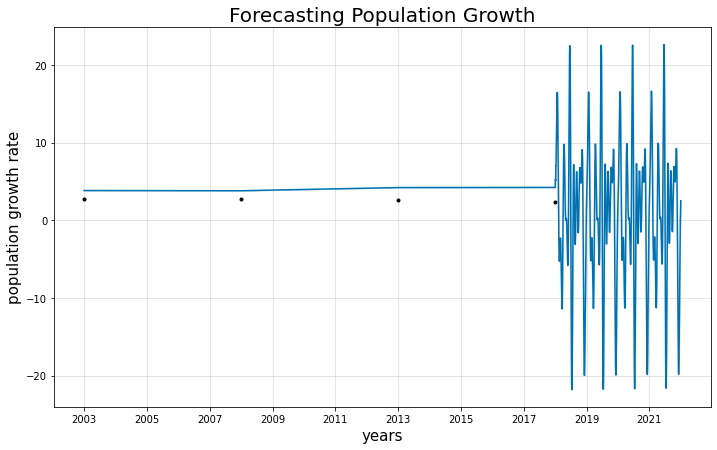

In [ ]:
#If the trend changes are being overfit (too much flexibility)
# or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument

from fbprophet.plot import add_changepoints_to_plot
#fig1 = m.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), m, forecast)

fig1 = m.plot(forecast)
plt.title("Forecasting Population Growth", fontsize=20)
plt.xlabel("years", fontsize=15)
plt.ylabel("population growth rate", fontsize=15)

plt.show()

a = add_changepoints_to_plot(fig1.gca(), m, forecast)

In [ ]:
m.changepoints

1   2008-01-01
2   2013-01-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


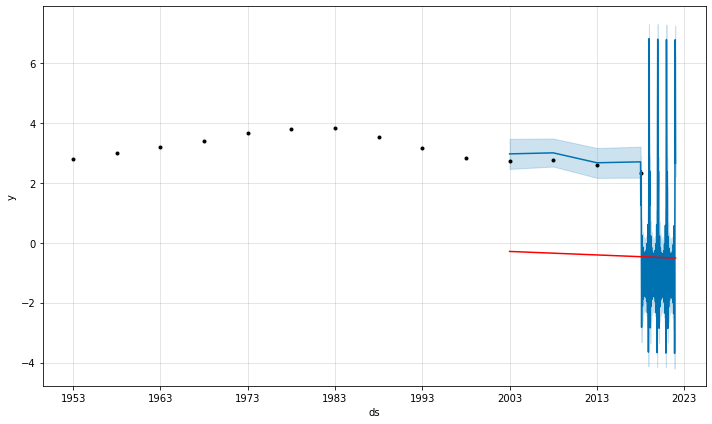

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
fst = pro_change.fit(pop_df).predict(future_pop)
fig2= pro_change.plot(fst);
a = add_changepoints_to_plot(fig2.gca(), pro_change, fst)

In [ ]:
pro_change.changepoints

1    1958-01-01
2    1963-01-01
3    1968-01-01
4    1973-01-01
5    1978-01-01
6    1983-01-01
7    1988-01-01
8    1993-01-01
9    1998-01-01
10   2003-01-01
11   2008-01-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


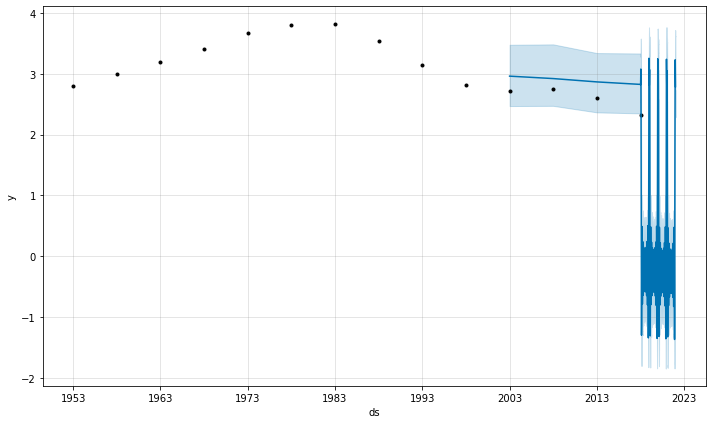

In [ ]:
# adjusting the trend flexibility
#If the trend changes are being overfit (too much flexibility)
# or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the changepoint argument
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(pop_df).predict(future_pop)
fig = m.plot(forecast)

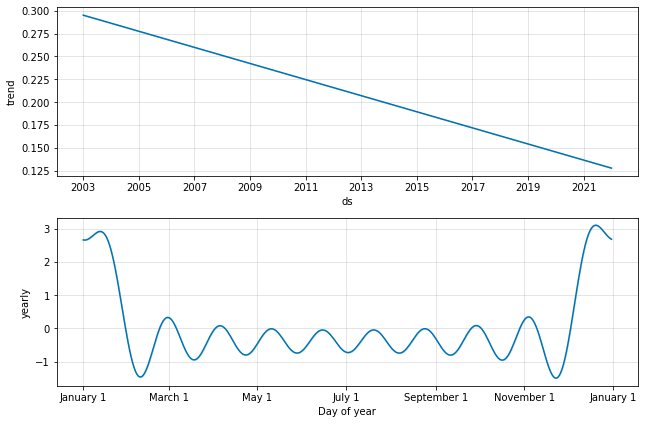

In [ ]:
fig3 = m.plot_components(forecast)

In [ ]:
# cross validation
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '1825 days', horizon = '1041 days')
df_crp = performance_metrics(cv_results)
df_crp

INFO:fbprophet:Making 12 forecasts with cutoffs between 1960-02-25 00:00:00 and 2015-02-25 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


horizon       mse      rmse       mae      mape    mdape  coverage
0 1041 days  3.045421  1.745114  0.893183  0.273629  0.18697  0.083333

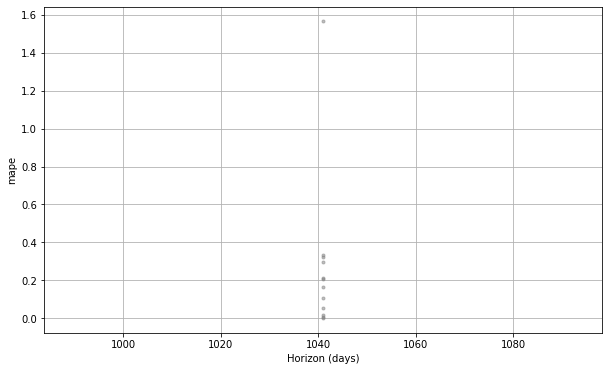

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig4 = plot_cross_validation_metric(cv_results, metric='mape')

#Deployment

In [ ]:
!pip install pystan


In [ ]:
!curl -LkO https://raw.githubusercontent.com/remoteit/installer/master/scripts/auto-install.sh
! chmod +x ./auto-install.sh
! sudo ./auto-install.sh


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11536  100 11536    0     0  28205      0 --:--:-- --:--:-- --:--:-- 28136

 curl found 
********************************************************
remote.it platform and binary tester version 2.6.39 
Current directory /content
Wed Jun 30 16:58:03 UTC 2021
********************************************************
Linux cc6040f59edc 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux
Detected architecture is x86_64
/usr/bin/dpkg
Debian OS detected.
amd64 architecture detected.

Looks compatible.
connectd.x86_64-ubuntu16.04 is compatible!
filename connectd_2.6.39_amd64.deb
filepath https://github.com/remoteit/installer/releases/download/v2.6.39/connectd_2.6.39_amd64.deb
Selecting previously unselected package connectd.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpac

In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 5.8MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 174kB 44.4MB/s 
     |████████████████████████████████| 4.2MB 37.4MB/s 
     |████████████████████████████████| 112kB 54.3MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 122kB 54.9MB/s 
     |████████████████████████████████| 788kB 45.3MB/s 
     |████████████████████████████████| 368kB 45.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=41de7de4e056e2504fe075192d56dfc07a7457dfbfd0fc41be57259e963386ef
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipyke

In [ ]:
!sudo connectd_installer

/usr/bin/connectd_installer: 67: /usr/bin/connectd_options: ip: not found

remote.it connection installer Version: 2.6.39 lib_v2.6.29 
Modified: June 10, 2020 (library) April 24, 2021 
Build date: Fri Apr 30 15:44:51 UTC 2021
curl with SSL support installed.

Checking the daemon for compatibility... 

Using architecture x86_64-ubuntu16.04...

Checking your network for compatibility... 

Network connection OK...
Your network is compatible with remote.it services.

********************* Sign In Menu *********************
                                                      
     1) Sign in to your remote.it account with username and password   
     2) Sign in to your remote.it account with access key and secret   
     3) Exit                                          
                                                      
********************************************************
*  To create a remote.it account, please visit         *
*  https://remote.it                                

###**1st data.py**

In [ ]:
%%writefile data.py 

import pandas as pd

import streamlit as st  # pylint: disable=import-error


@st.cache
def load_data(path):
    """Loads the dataset from a filepath."""
    return (pd.read_csv(path)).assign(Year=lambda df: pd.to_datetime(df["Year"])).set_index("Year")


import pandas as pd
from dateutil.parser import parse
import streamlit as st  # pylint: disable=import-error
    
import os

from matplotlib import pyplot as plt
import fbprophet 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly


import streamlit as st  
FILEPATH = os.path.join(os.getcwd(), "labor.csv")
st.title("Population Time Series Forecasting")

ALL = 'labour_income_share_in_GDP'

@st.cache(allow_output_mutation=True)
def make_forecast(selection):
    """Takes a name from the selection and makes a forecast plot."""

    if selection == ALL:

        cumulative_series_name = "labour_income_share_in_GDP"
        title = "Labor Share of Income"
        x_label = "Labor share of income"

    prophet_df = (
        df[cumulative_series_name]
        .diff()
        .dropna()
        .to_frame()
        .reset_index()
        .rename(columns={"Year": "ds", cumulative_series_name: "y"})
    )
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=90)
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    fig.update_layout(
        title=title, yaxis_title=x_label, xaxis_title="Date",
    )

    return fig

df = load_data(FILEPATH)
st.write("# Population Forecast")

selected_series = st.selectbox("Select a data set:", (ALL))

if selected_series == ALL:
    plotly_fig = make_forecast(selected_series)
    st.plotly_chart(plotly_fig)


Overwriting data.py


In [ ]:
!streamlit run --server.port 80 data.py --&>/dev/null&

###**Policy**

In [ ]:
%%writefile Policy.py 
import pandas as pd

import streamlit as st  # pylint: disable=import-error
    
import os

from matplotlib import pyplot as plt
import fbprophet 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import streamlit as st  # pylint: disable=import-error
#from load_data import load_data
data_path = ("/content/labor (1).csv")

@st.cache(persist=True)
def load_data():
    data = pd.read_csv(data_path)
    data['Year'] = pd.to_datetime(data['Year'])
    return data


data = load_data()


@st.cache(allow_output_mutation=True)
def make_forecast(selection):
    """Takes a name from the selection and makes a forecast plot."""

    if selection == LABOR:

        labor_series_name = "labor_income_share_in_GDP"
        title = "LABOR SHARE OF INCOME"
        x_label = "labor share of income"


    prophet_df = (
        df[labor_series_name]
        .diff()
        .dropna()
        .to_frame()
        .reset_index()
        .rename(columns={"Year": "ds", labor_series_name: "y"})
    )

    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=1095)
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    fig.update_layout(
        title=title, yaxis_title=x_label, xaxis_title="Years",
    )

    return fig


df = load_data(FILEPATH)
st.write("# LABOR Forecast")

selected_series = st.selectbox("Select a data set:", (LABOR))

Overwriting Policy.py


###**Labor**

In [ ]:
%%writefile Labory.py 
import numpy as np
import pickle
import pandas as pd
import streamlit as st 
from PIL import Image



pickle_in = open("model1.pkl","rb")
model=pickle.load(pickle_in)

#@app.route('/')
def welcome():
    return "Welcome All"

#@app.route('/predict',methods=["Get"])
def predict_imr(Year, IMR):
    
    """Let's predict the Infant Mortality Rate 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: variance
        in: query
        type: number
        required: true
      - name: skewness
        in: query
        type: number
        required: true
      - name: curtosis
        in: query
        type: number
        required: true
      - name: entropy
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
   
    prediction1=model.predict([[Year, IMR]])
    print(prediction1)
    return prediction1



def main():
    st.title("PMDA")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Bank Authenticator ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    Year = st.text_input("Year","Type Here")
    IMR = st.text_input("Infant Mortality Rate","Type Here")
    result=""
    if st.button("Predict"):
        result=predict_imr(Year, IMR)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")

if __name__=='__main__':
    main()


Writing Labory.py


###**2nd data.py**

In [ ]:
%%writefile data.py 

import pandas as pd

import streamlit as st  # pylint: disable=import-error


@st.cache
def load_data(path):
    """Loads the dataset from a filepath."""
    return (pd.read_csv(path)).assign(Year=lambda df: pd.to_datetime(df["Year"])).set_index("Year")


import pandas as pd
from dateutil.parser import parse
import streamlit as st  # pylint: disable=import-error
    
import os

from matplotlib import pyplot as plt
import fbprophet 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly


import streamlit as st  
FILEPATH = os.path.join(os.getcwd(), "labor.csv")
st.title("Population Time Series Forecasting")

ALL = 'labour_income_share_in_GDP'

@st.cache(allow_output_mutation=True)
def make_forecast(selection):
    """Takes a name from the selection and makes a forecast plot."""

    if selection == ALL:

        cumulative_series_name = "labour_income_share_in_GDP"
        title = "Labor Share of Income"
        x_label = "Labor share of income"

    prophet_df = (
        df[cumulative_series_name]
        .diff()
        .dropna()
        .to_frame()
        .reset_index()
        .rename(columns={"Year": "ds", cumulative_series_name: "y"})
    )
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=90)
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    fig.update_layout(
        title=title, yaxis_title=x_label, xaxis_title="Date",
    )

    return fig

df = load_data(FILEPATH)
st.write("# Population Forecast")

selected_series = st.selectbox("Select a data set:", (ALL))

if selected_series == ALL:
    plotly_fig = make_forecast(selected_series)
    st.plotly_chart(plotly_fig)


Overwriting data.py


In [ ]:
!streamlit run --server.port 80 Labory.py --&>/dev/null&

###**Start1.py**

In [ ]:
import pandas as pd
from dateutil.parser import parse
import streamlit as st  # pylint: disable=import-error
    
import os

from matplotlib import pyplot as plt
import fbprophet 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import streamlit as st  

st.title("Population Time Series Forecasting")
st.sidebar.title("Kenya")

#st.markdown("## We the people")


data_path_1 = ("C:\\Users\\LENOVO\\labor.csv")

@st.cache(persist=True)
def load_data():
    data_1 = pd.read_csv(data_path_1, parse_dates=['Year'])
    
    return data_1

data_path_2 = ("C:\\Users\\LENOVO\\IMR.csv")

@st.cache(persist=True)
def load_data():
    data_2 = pd.read_csv(data_path_2, parse_dates=['Year'])
    
    return data_2

data_path_3 = ("C:\\Users\\LENOVO\\cpi2.csv")

@st.cache(persist=True)
def load_data():
    data_3 = pd.read_csv(data_path_3, parse_dates=['Year'])
    
    return data_3

data_path_4 = ("C:\\Users\\LENOVO\\population.csv")

@st.cache(persist=True)
def load_data():
    data_4 = pd.read_csv(data_path_4, parse_dates=['Year'])
    
    return data_4

data_path_5 = ("C:\\Users\\LENOVO\\Annual_maize_prod.csv")

@st.cache(persist=True)
def load_data():
    data_5 = pd.read_csv(data_path_5, parse_dates=['Year'])  

    return data_5 

data_1 = load_data()
data_2 = load_data()
data_3 = load_data()
data_4 = load_data()
data_5 = load_data()

#st.markdown("## We not the people")

@st.cache(allow_output_mutation=True)
def make_forecast(selection):
    """Takes a name from the selection and makes a forecast plot."""

    if selection == data_1:

        cumulative_series_name = "labour_income_share_in_GDP"
        title = "Labor Share of Income"
        x_label = "Labor share of income"

    if selection == data_2:

        cumulative_series_name = "IMR"
        title = "Infant Mortality Rate"
        x_label = "imr"

    if selection == data_3:

        cumulative_series_name = "Foodpriceinflation"
        title = "Food Price Inflation"
        x_label = "Recoveries"

    if selection == data_4:

        cumulative_series_name = "population_growth_rate"
        title = "Population Growth Rate"
        x_label = "pop_growth"
    
    if selection == data_5:

        cumulative_series_name = "Production"
        title = "Maize Production"
        x_label = "production"

    prophet_df = (
        data[cumulative_series_name]
        .rename(columns={"Year": "ds", cumulative_series_name: "y"})
    )
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=1460)
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    fig.update_layout(
        title=title, yaxis_title=x_label, xaxis_title="Date",
    )

    return fig

data = load_data()
st.write("# Labor Forecast")

selected_series = st.selectbox("Select a data set:", (data_path_1, data_path_2, data_path_3, data_path_4, data_path_5))

plotly_fig = make_forecast(selected_series)
st.plotly_chart(plotly_fig)

###Attach

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
import base64

st.title('📈 Automated Time Series Forecasting')

"""
This data app uses Facebook's open-source Prophet library to automatically generate future forecast values from an imported dataset.
You'll be able to import your data from a CSV file, visualize trends and features, analyze forecast performance, and finally download the created forecast.
*
"""

"""
### Step 1: Import Data
"""
df = st.file_uploader('Import the time series csv file here. Columns must be labeled ds and y. The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.', type='csv')

if df is not None:
    data = pd.read_csv(df)
    data['ds'] = pd.to_datetime(data['ds'],errors='coerce') 
    
    st.write(data)
    
    max_date = data['ds'].max()
    #st.write(max_date)

"""
### Step 2: Select Forecast Horizon
Keep in mind that forecasts become less accurate with larger forecast horizons.
"""

periods_input = st.number_input('How many periods would you like to forecast into the future?',
min_value = 1, max_value = 365)

if df is not None:
    m = Prophet()
    m.fit(data)

"""
### Step 3: Visualize Forecast Data
The below visual shows future predicted values. "yhat" is the predicted value, and the upper and lower limits are (by default) 80% confidence intervals.
"""
if df is not None:
    future = m.make_future_dataframe(periods=periods_input)
    
    forecast = m.predict(future)
    fcst = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    fcst_filtered =  fcst[fcst['ds'] > max_date]    
    st.write(fcst_filtered)
    
    """
    The next visual shows the actual (black dots) and predicted (blue line) values over time.
    """
    fig1 = m.plot(forecast)
    st.write(fig1)

    """
    The next few visuals show a high level trend of predicted values, day of week trends, and yearly trends (if dataset covers multiple years). The blue shaded area represents upper and lower confidence intervals.
    """
    fig2 = m.plot_components(forecast)
    st.write(fig2)


"""
### Step 4: Download the Forecast Data
The below link allows you to download the newly created forecast to your computer for further analysis and use.
"""
if df is not None:
    csv_exp = fcst_filtered.to_csv(index=False)
    # When no file name is given, pandas returns the CSV as a string, nice.
    b64 = base64.b64encode(csv_exp.encode()).decode()  # some strings <-> bytes conversions necessary here
    href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a> (right-click and save as ** &lt;forecast_name&gt;.csv**)'
    st.markdown(href, unsafe_allow_html=True)

In [ ]:
!streamlit run --server.port 80 Attach.py --&>/dev/null&